In [810]:
import glob
import os
from readfiles import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
from lomapost import * #All functions defined within module lomapost
%matplotlib inline
from writefiles import *
import compact

In [811]:
def create_mesh1D_ML(ylim,Dymid,delta,Nmax,filename='mesh.txt'):
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy.integrate import cumtrapz
        y = 0.0
        Nmid = int(ylim/Dymid)
        Nmax = Nmax/2
        Nmid = Nmid/2
        if Nmax <= Nmid:
            print "Need more points!"
            return 0.0
        for i in range(1,Nmid):
            y = r_[y, i*Dymid]
        ylastmid = y[-1]
        for i in range(1,Nmax - Nmid+1):
            y = r_[y, y[-1]+ delta*(y[-1]-y[-2])]
        print "Ly = %s" %(2*y[-1])
        ymirror = np.sort(-y)
        y = r_[ymirror[:-1],y]
        print "my = %s" %(len(y))
        return y,2*y[-1],len(y)
            

In [812]:
set_fig_props()

In [618]:
l_path_cases=['/share/drive/toni/Re460s20/boxy2/h5.stats','/share/drive/toni/Re460s20/boxy2/CFL02/h5.stats','/share/drive/toni/Re460s20/boxy2/CFL01/h5.stats']

# Box y2

In [619]:
Ly2 = 30*3.0;#dm0;
Lx = 20.0;Lz=20.0;
mgalx = 384;mgalz=384;
alp0 = 2.0*np.pi/Lx; bet0=2.0*np.pi/Lz;
print alp0,bet0
my2 =651
y2 = create_mesh1D(Ly2/2.0,my2,'test',0.91,'/home/toni/testmesh3.txt',0.55)
#y2 = create_mesh1D(Ly2/2.0,my2,'line',0.95,'/home/toni/testmesh2.txt')
Re=460;

s=2.0;rho0=1.0
#y = np.linspace(-Ly/2,Ly/2,my)
u2 = 0.5*np.tanh(-y2/2.0);
rho2 = rho0*(1.0+(s-1.0)/(s+1.0)*np.tanh(-y2/2.0))
Rey2 = Re*rho2*5
dw0 = calcdw(y2,u2);
print Rey.max(),Rey.min()
print Lx/(mgalx*2/3+1)
print np.min(np.diff(y2))

0.314159265359 0.314159265359


NameError: name 'Rey' is not defined

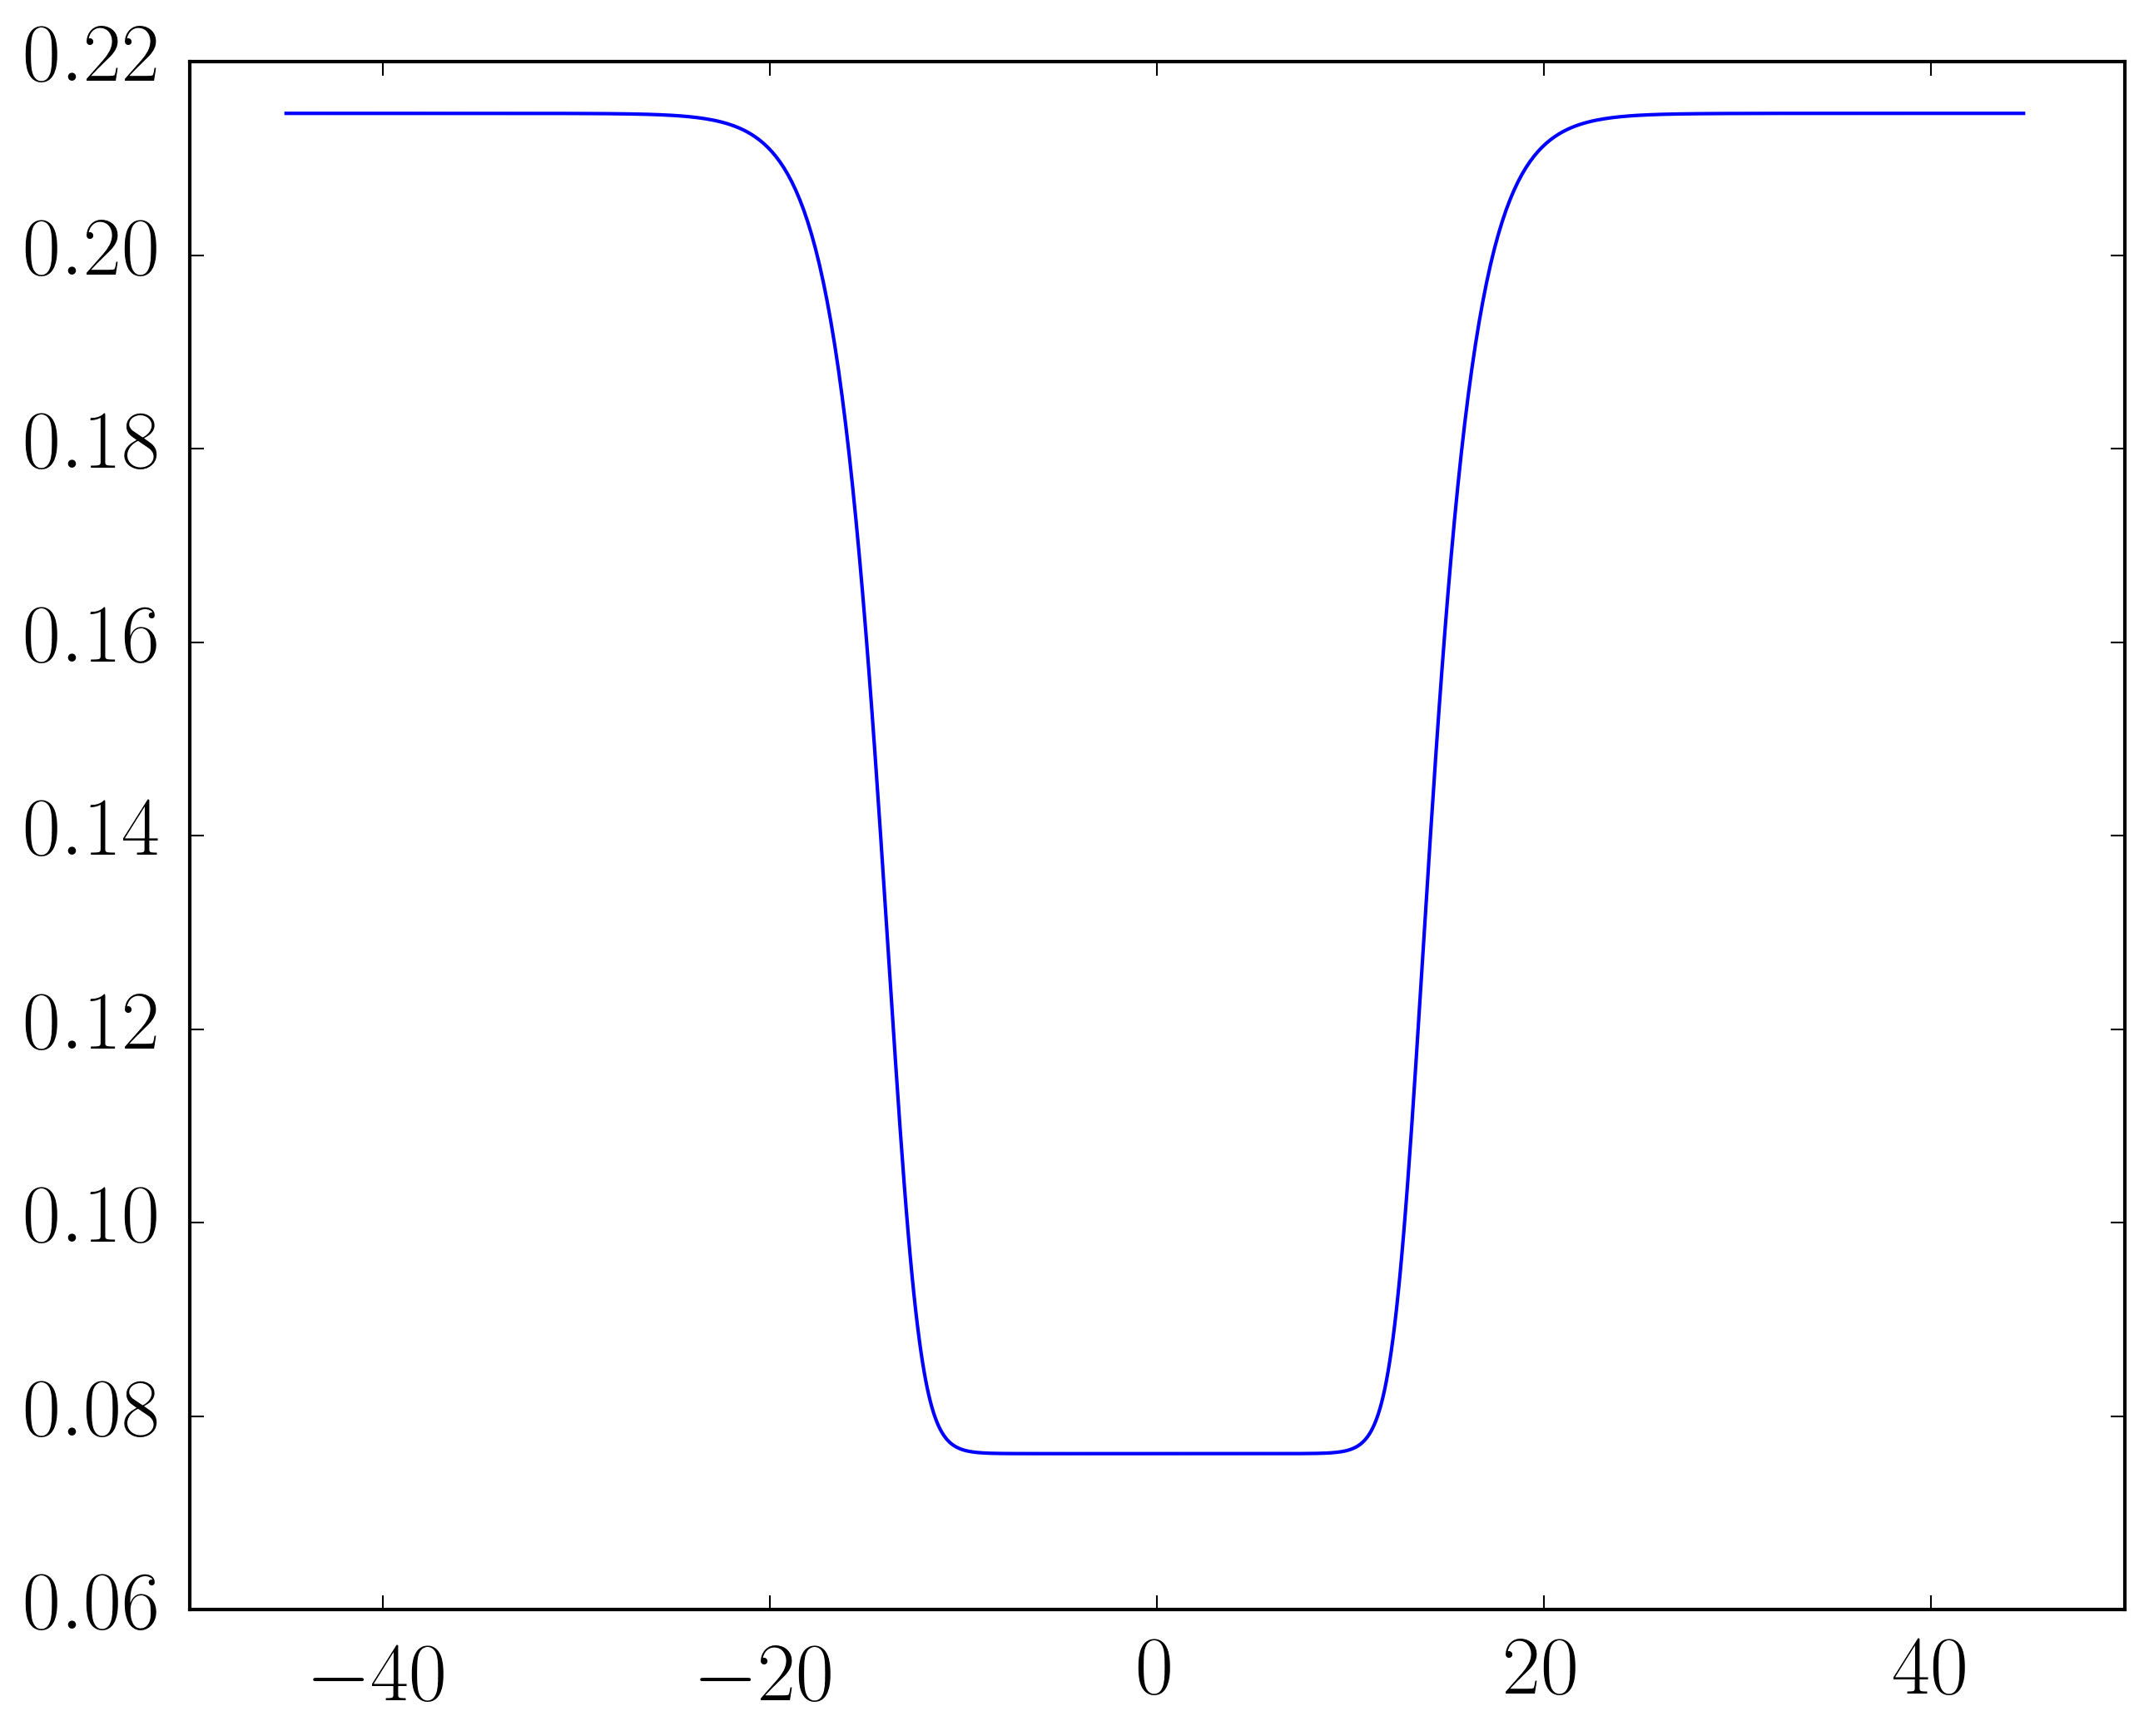

In [620]:
plt.plot(y2[:-1],np.diff(y2))

In [621]:
dm0 = calcdmcomp(y,u,rho*u,rho);
print dm0
dw0 = calcdw(y,u);
print dw0

NameError: name 'y' is not defined

In [ ]:
#plt.plot(y,Rey,'.');
plt.plot(y[:-1],np.diff(rho)/np.diff(y))
plt.plot(y[:-1],np.diff(u)/np.diff(y))

In [ ]:
res = 0.0158;
myres = 0.2/4.5
print myres/7

# Check results of lomacte3

In [813]:
path = '/share/drive/toni/s80/caseSS2/h5.stats'
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    vrms = np.array(f['vrms'])
    wrms = np.array(f['wrms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w1m'])
    uv = np.array(f['uv'])
    TT = np.array(f['TT'])
    w1rms = np.array(f['w1rms'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

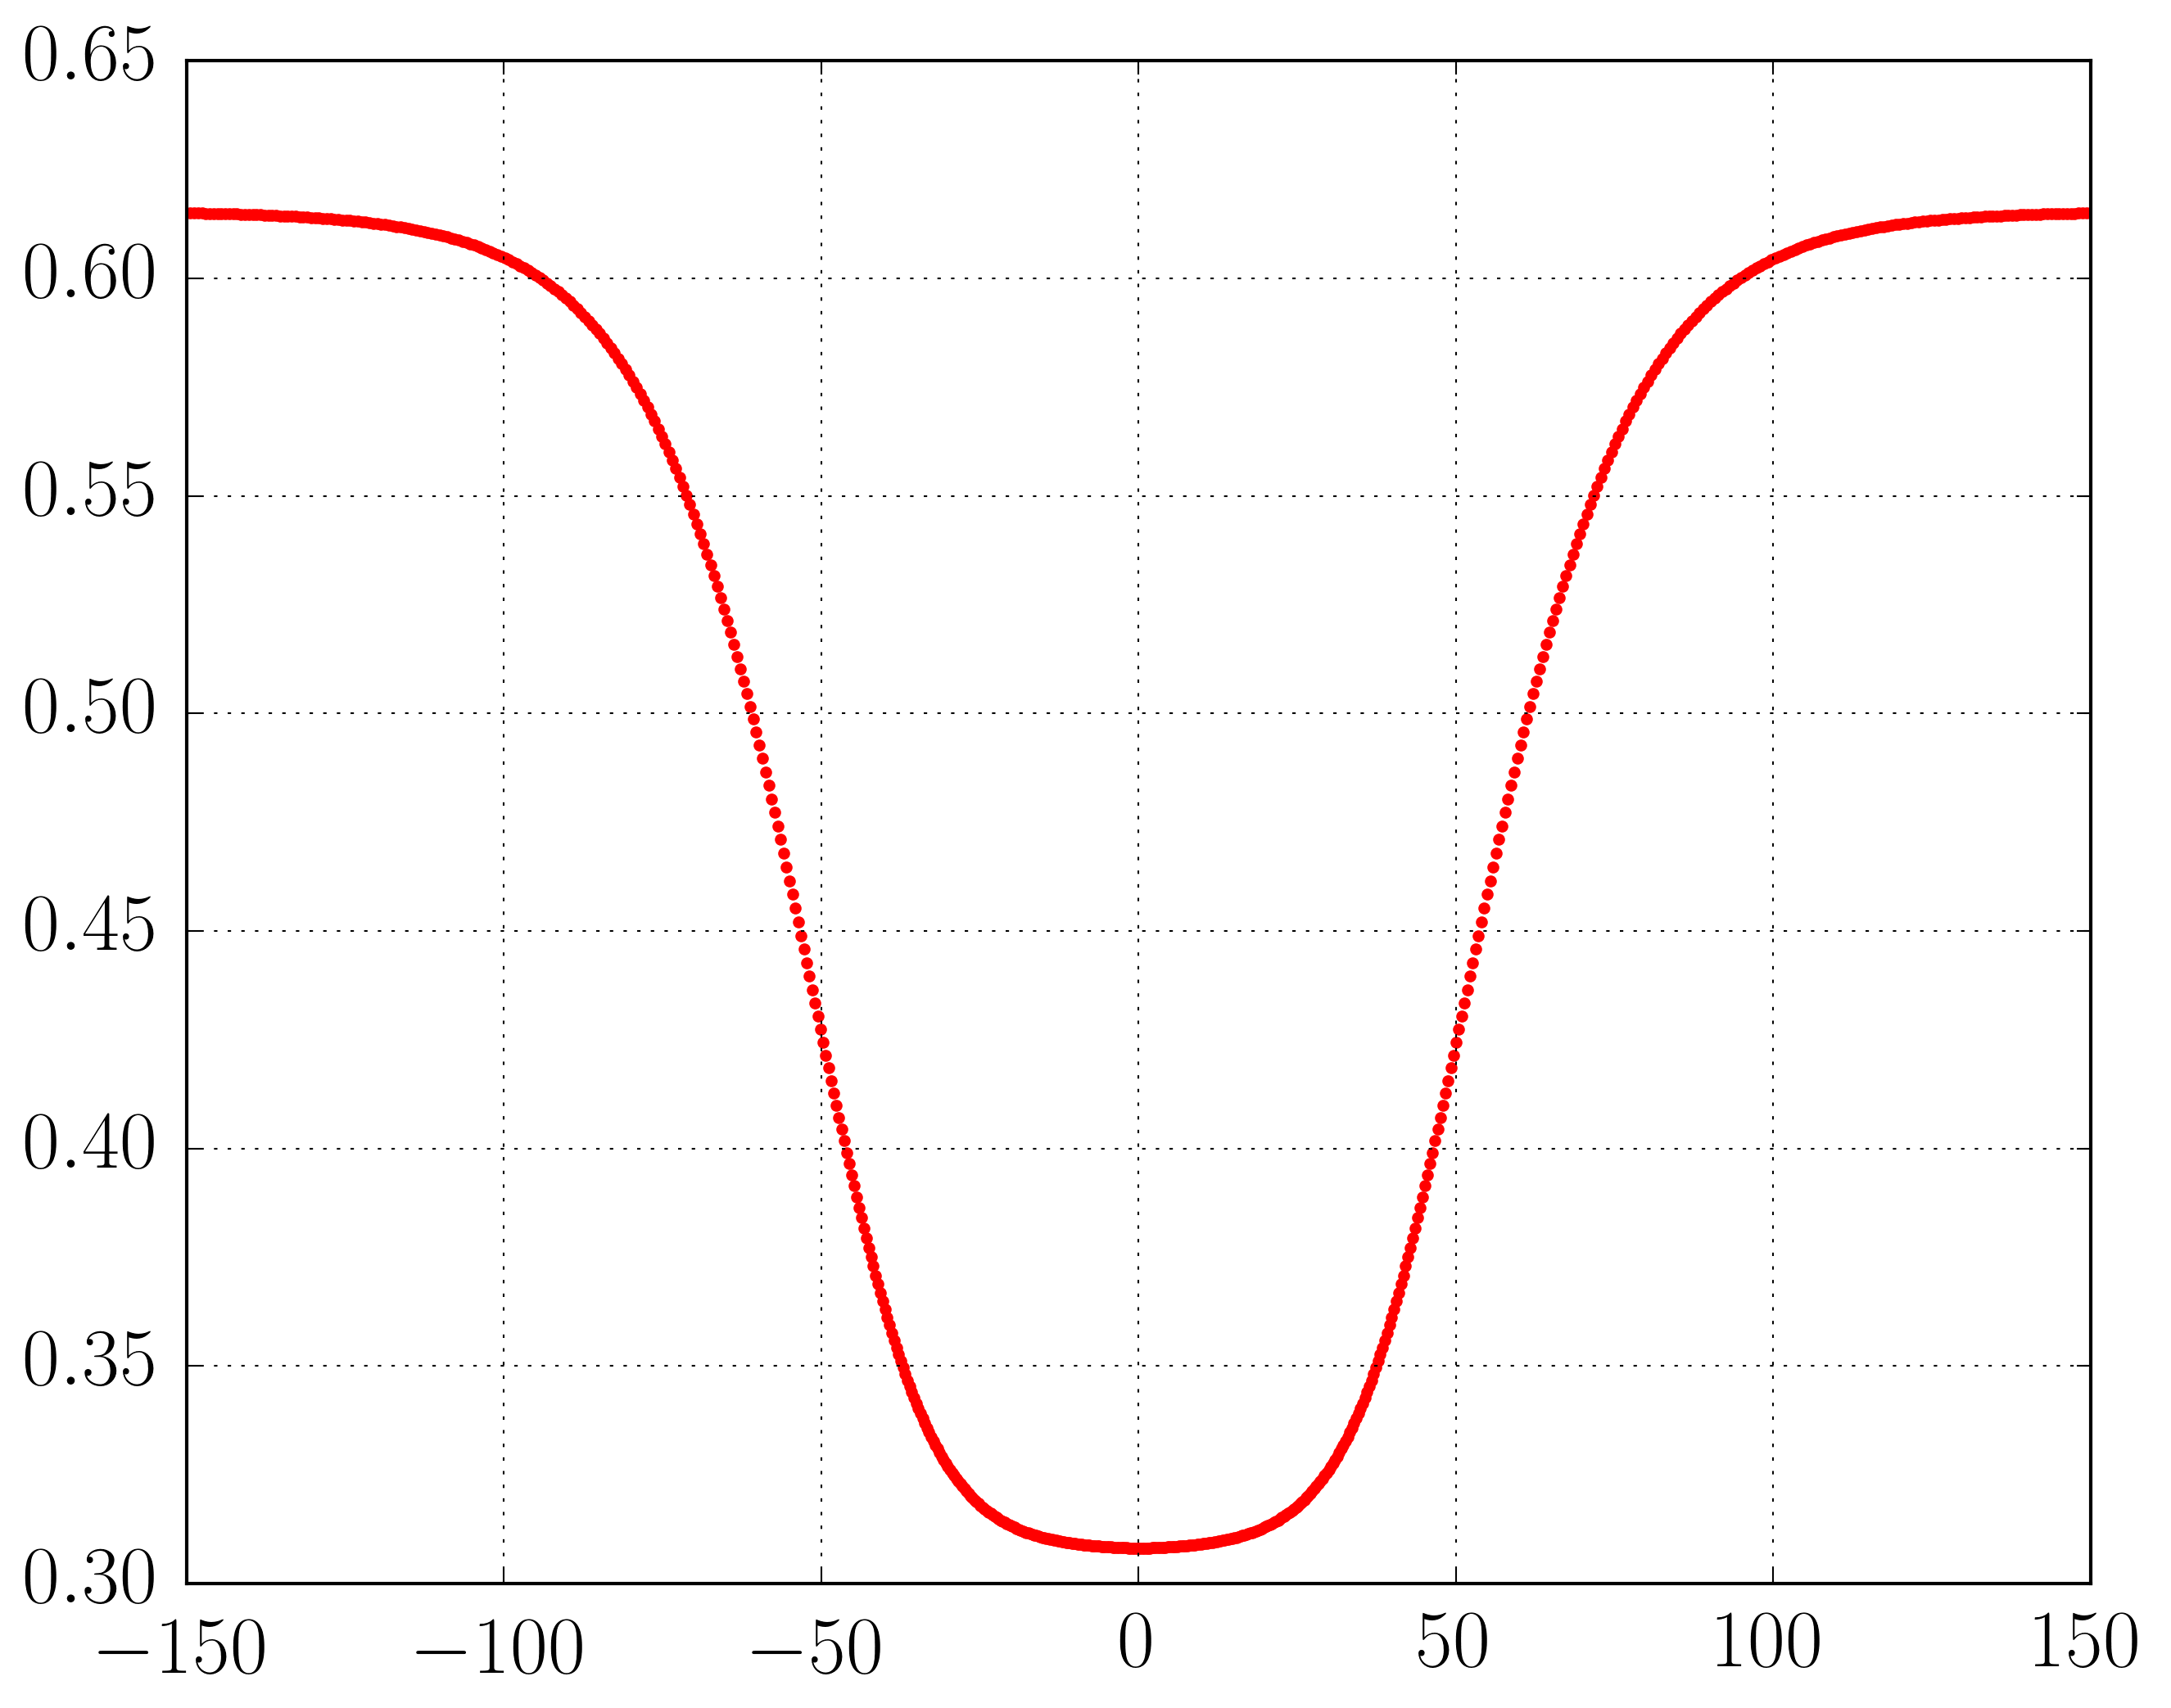

In [785]:
plt.plot(yf[1:],np.diff(yf),'r.')

plt.grid('on')
#plt.xlim([-5,5])


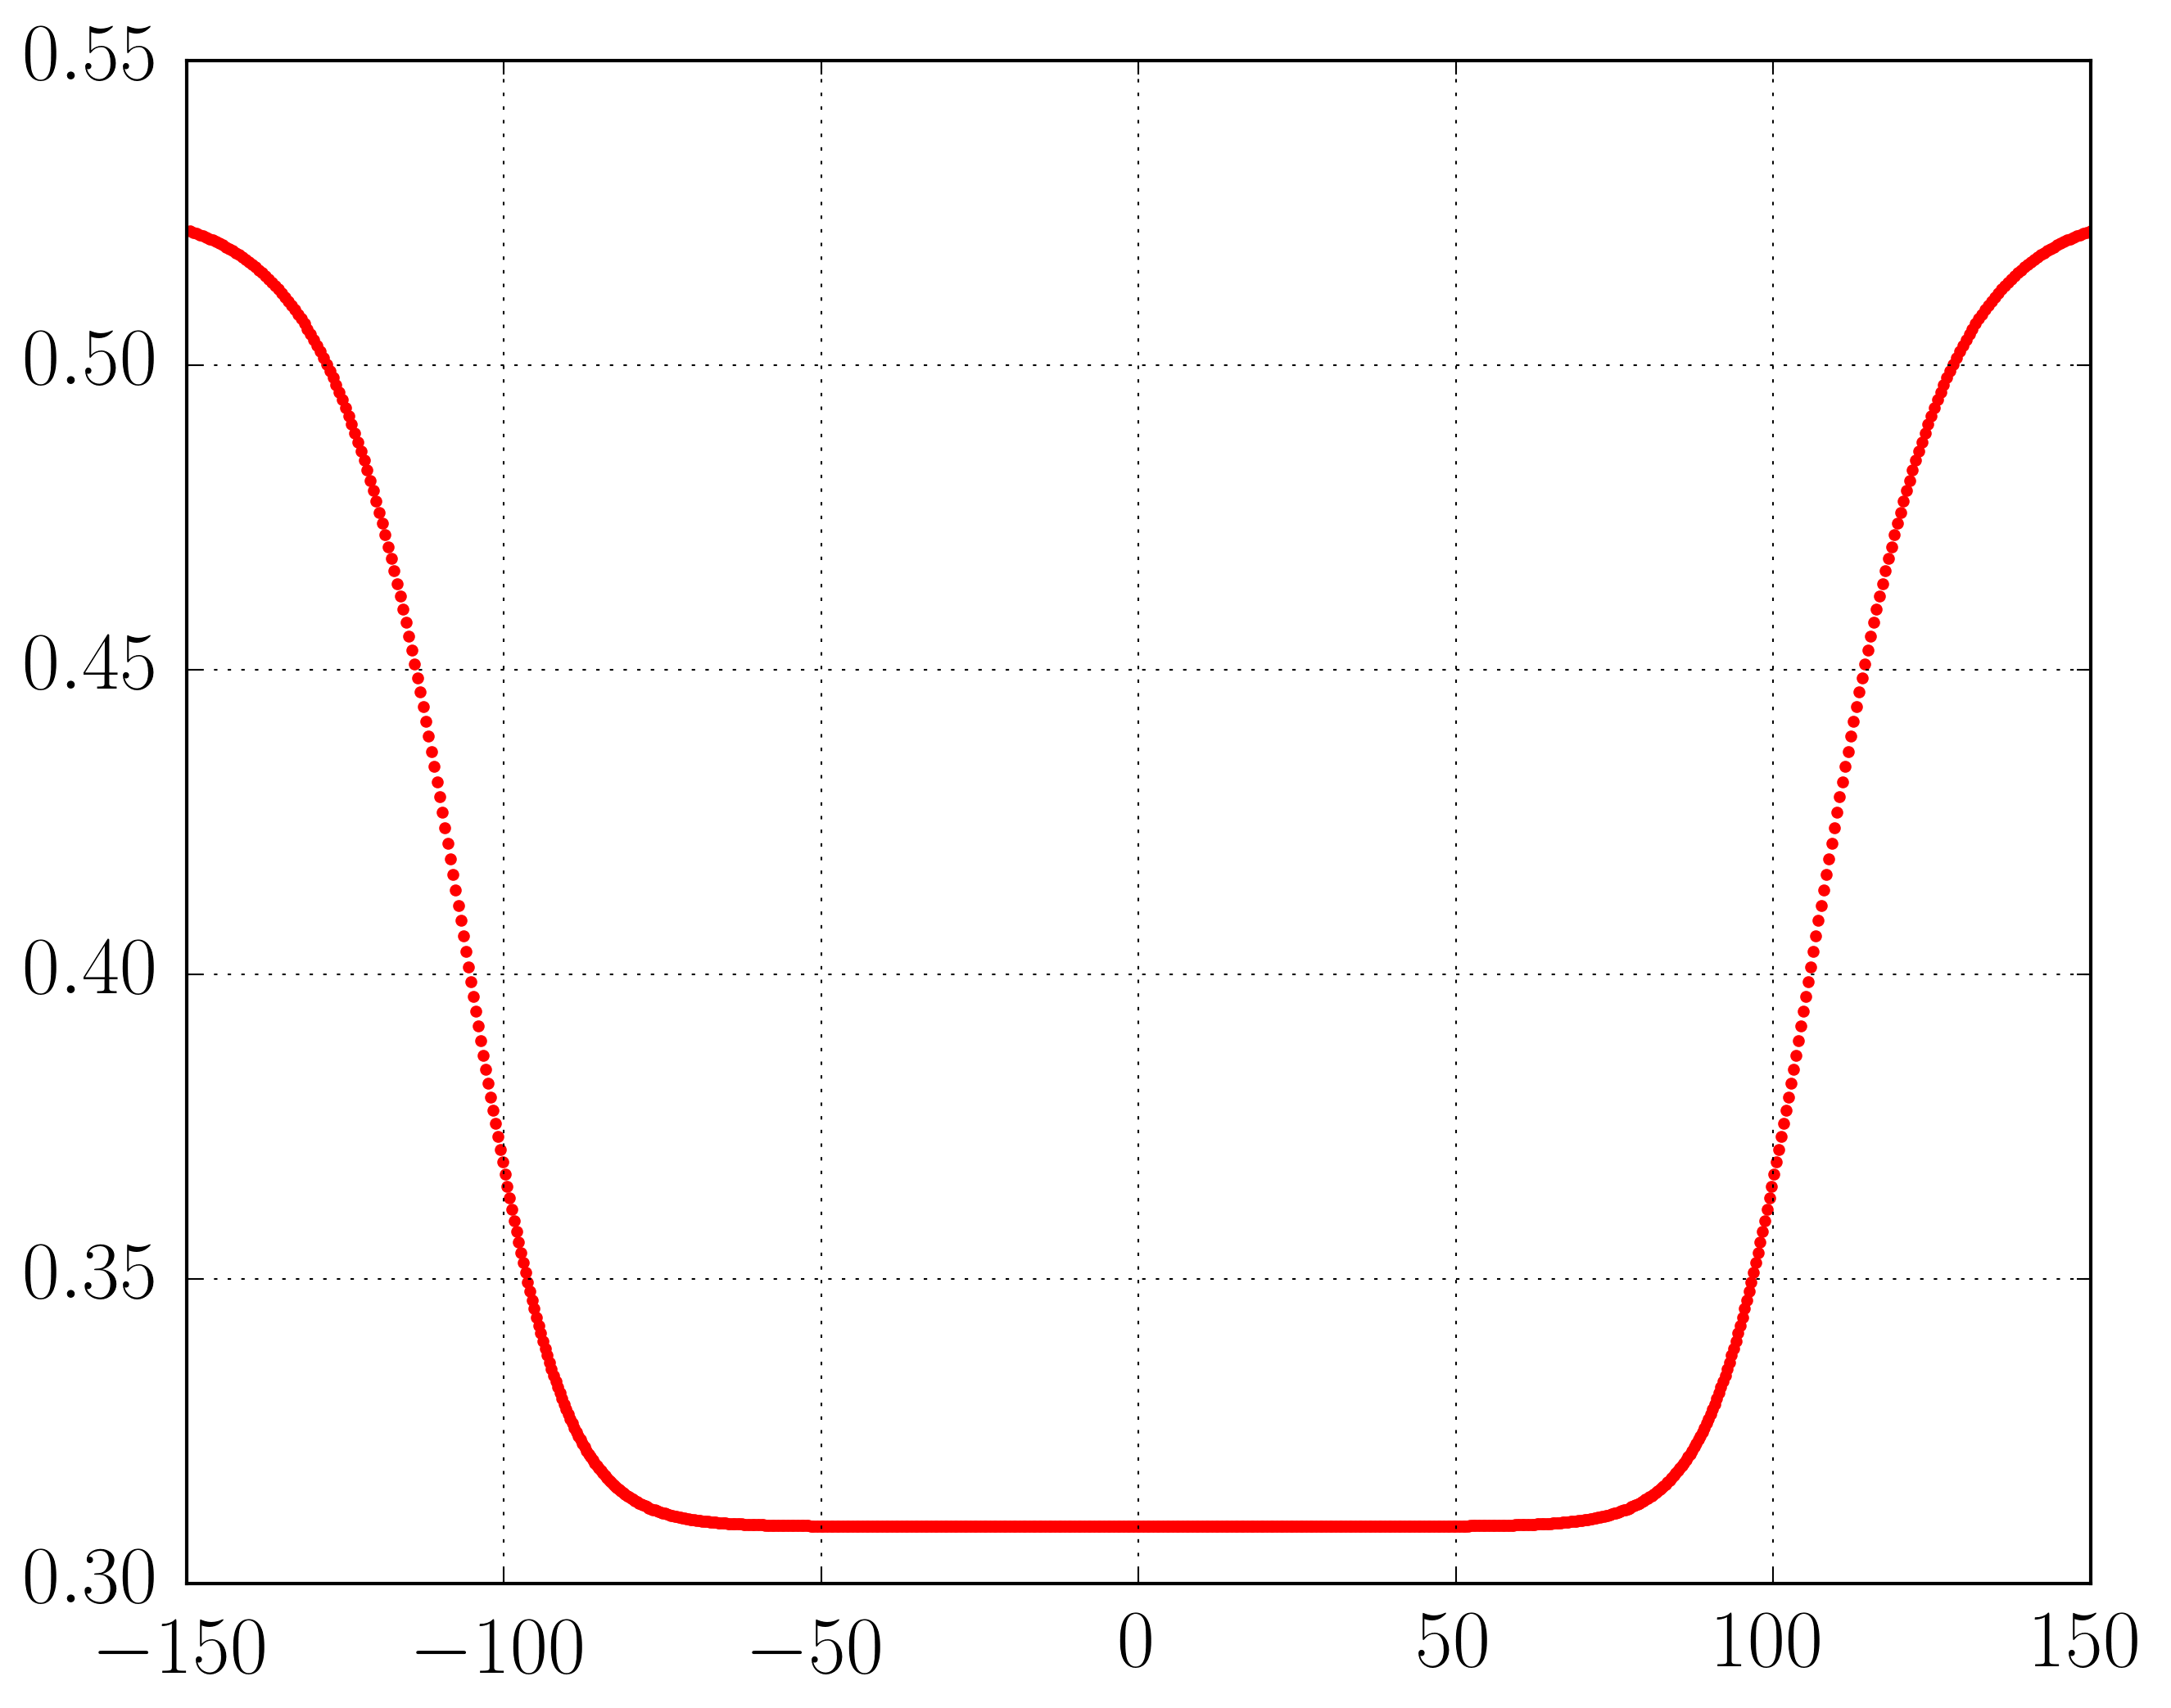

In [791]:
plt.plot(yf[1:],np.diff(yf),'r.')

plt.grid('on')
#plt.xlim([-5,5])


In [786]:
172.0/769

0.22366710013003901

(-10, 20)

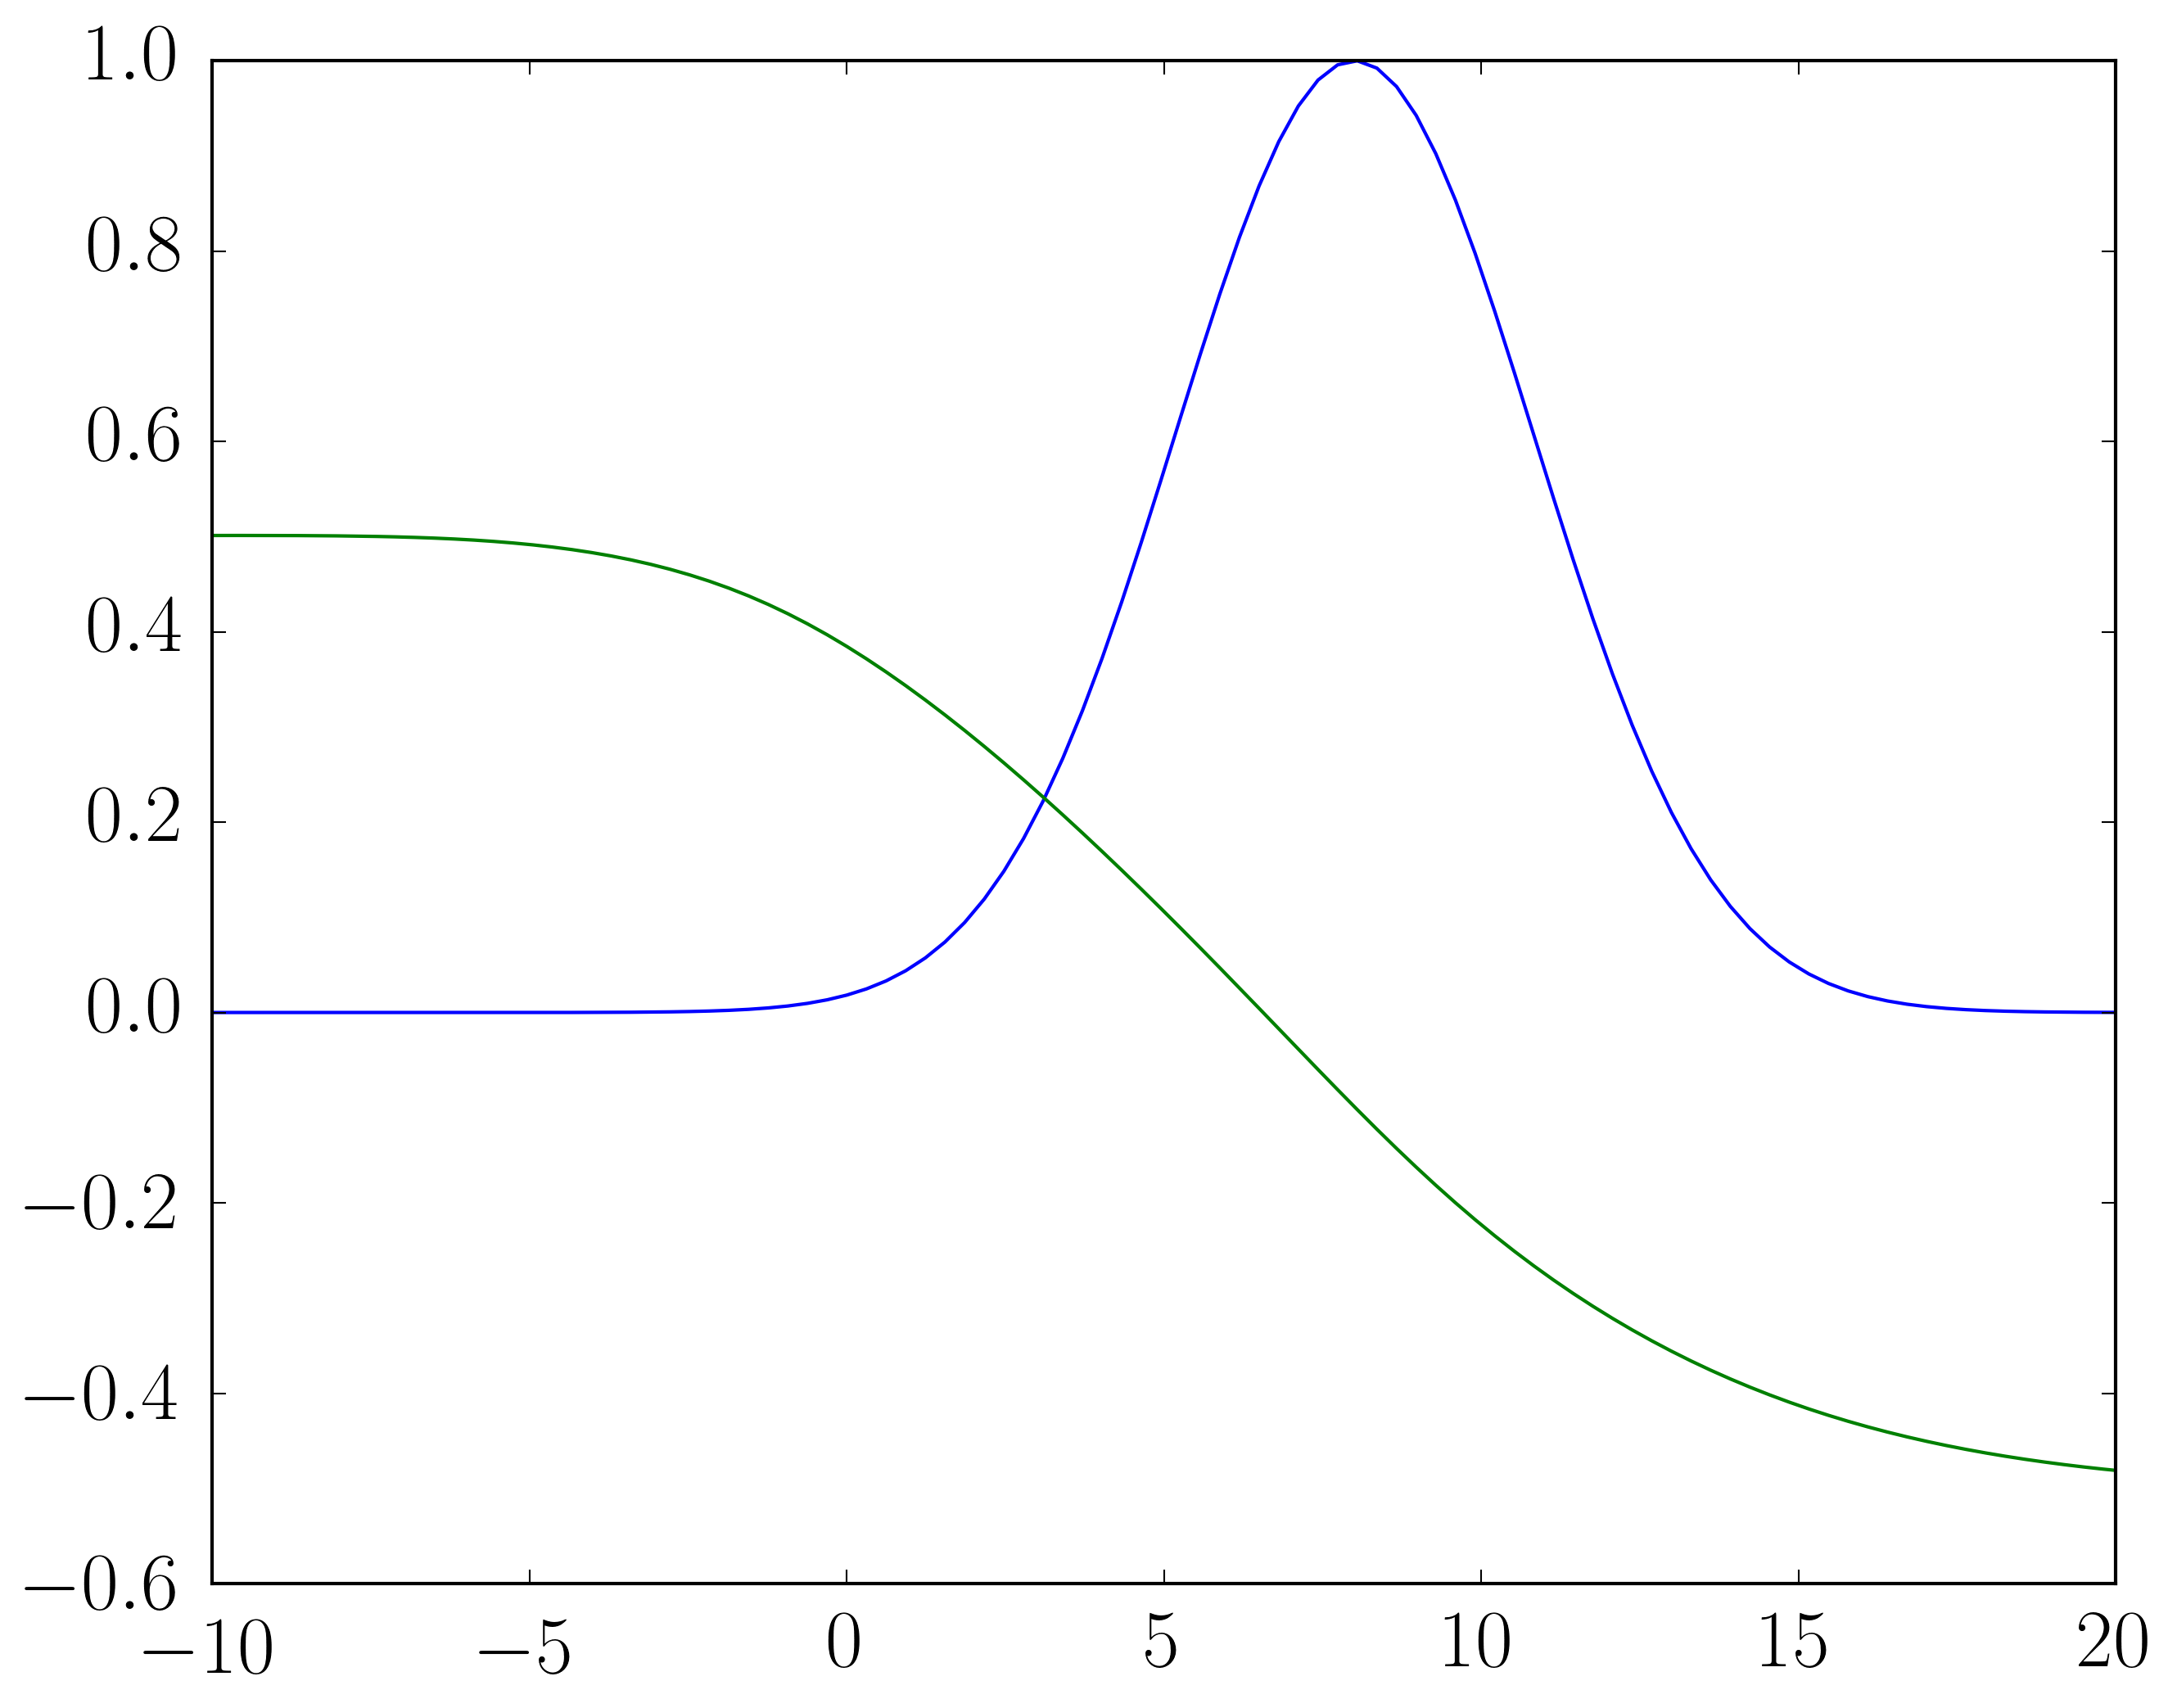

In [792]:
plt.plot(yf,np.exp(-((yf-8)/4.0)**2))
plt.plot(yf,um[:,0])
plt.xlim(-10,20)

8.04403448456e-06
-2.27519647524e-05
-3.16402646149e-05
-3.07959992369e-05
87.5297470093


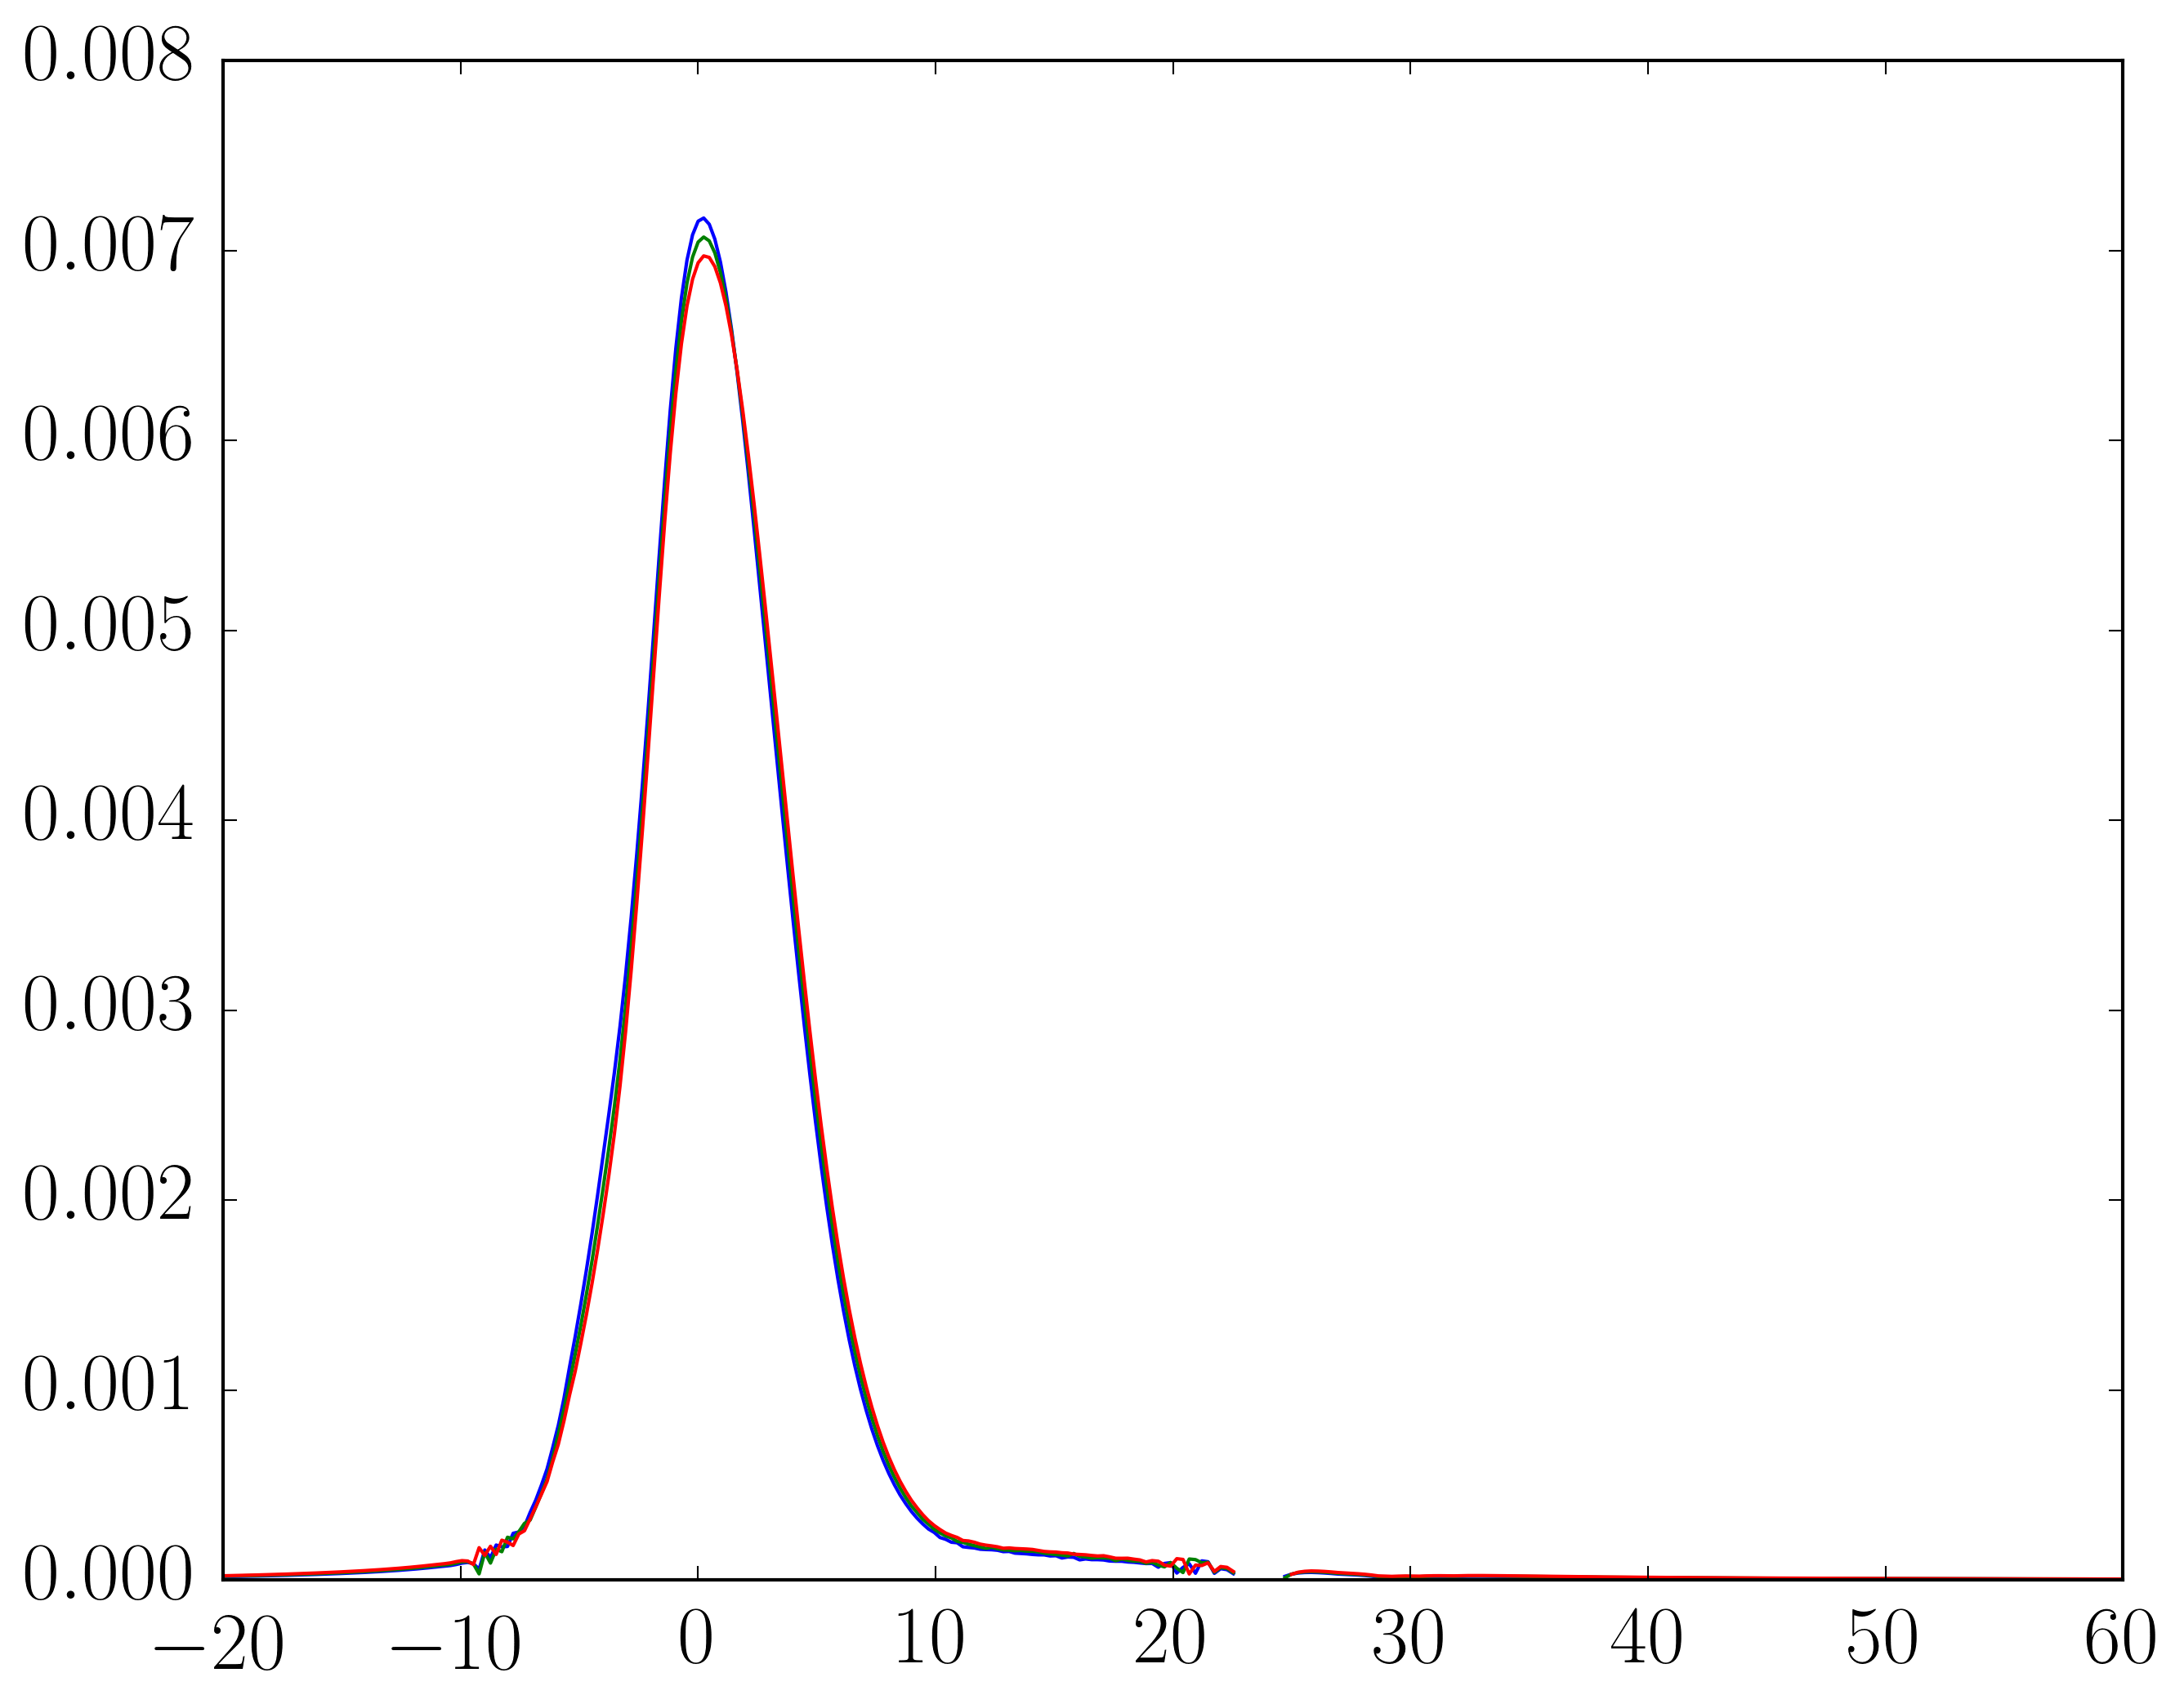

In [817]:
ii = 11
plt.plot(yf,urms[:,ii:ii+3])
#plt.plot(yf,np.log(w3m[:,ii:ii+3]))
#plt.plot(yf,wrms[:,ii:ii+2],'g.-')
#plt.plot(yf,Trms[:,ii:ii+2],'m.-')
plt.xlim([-20,60])
#plt.ylim([0.0,0.005])
print rvm[-1,ii+2]
print rvm[0,ii+2]
print rvm[0,ii+1]-rvm[-1,ii+1]
print rvm[0,ii+2]-rvm[-1,ii+2]
print time[ii+2]
#plt.xlim([-25,25])
#plt.plot(yf,vrms[:,0])


###### path = '/share/drive/toni/Re460s20/h5.stats'
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w1m'])
    uv = np.array(f['uv'])
    TT = np.array(f['TT'])
    w1rms = np.array(f['w1rms'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

## Box 1

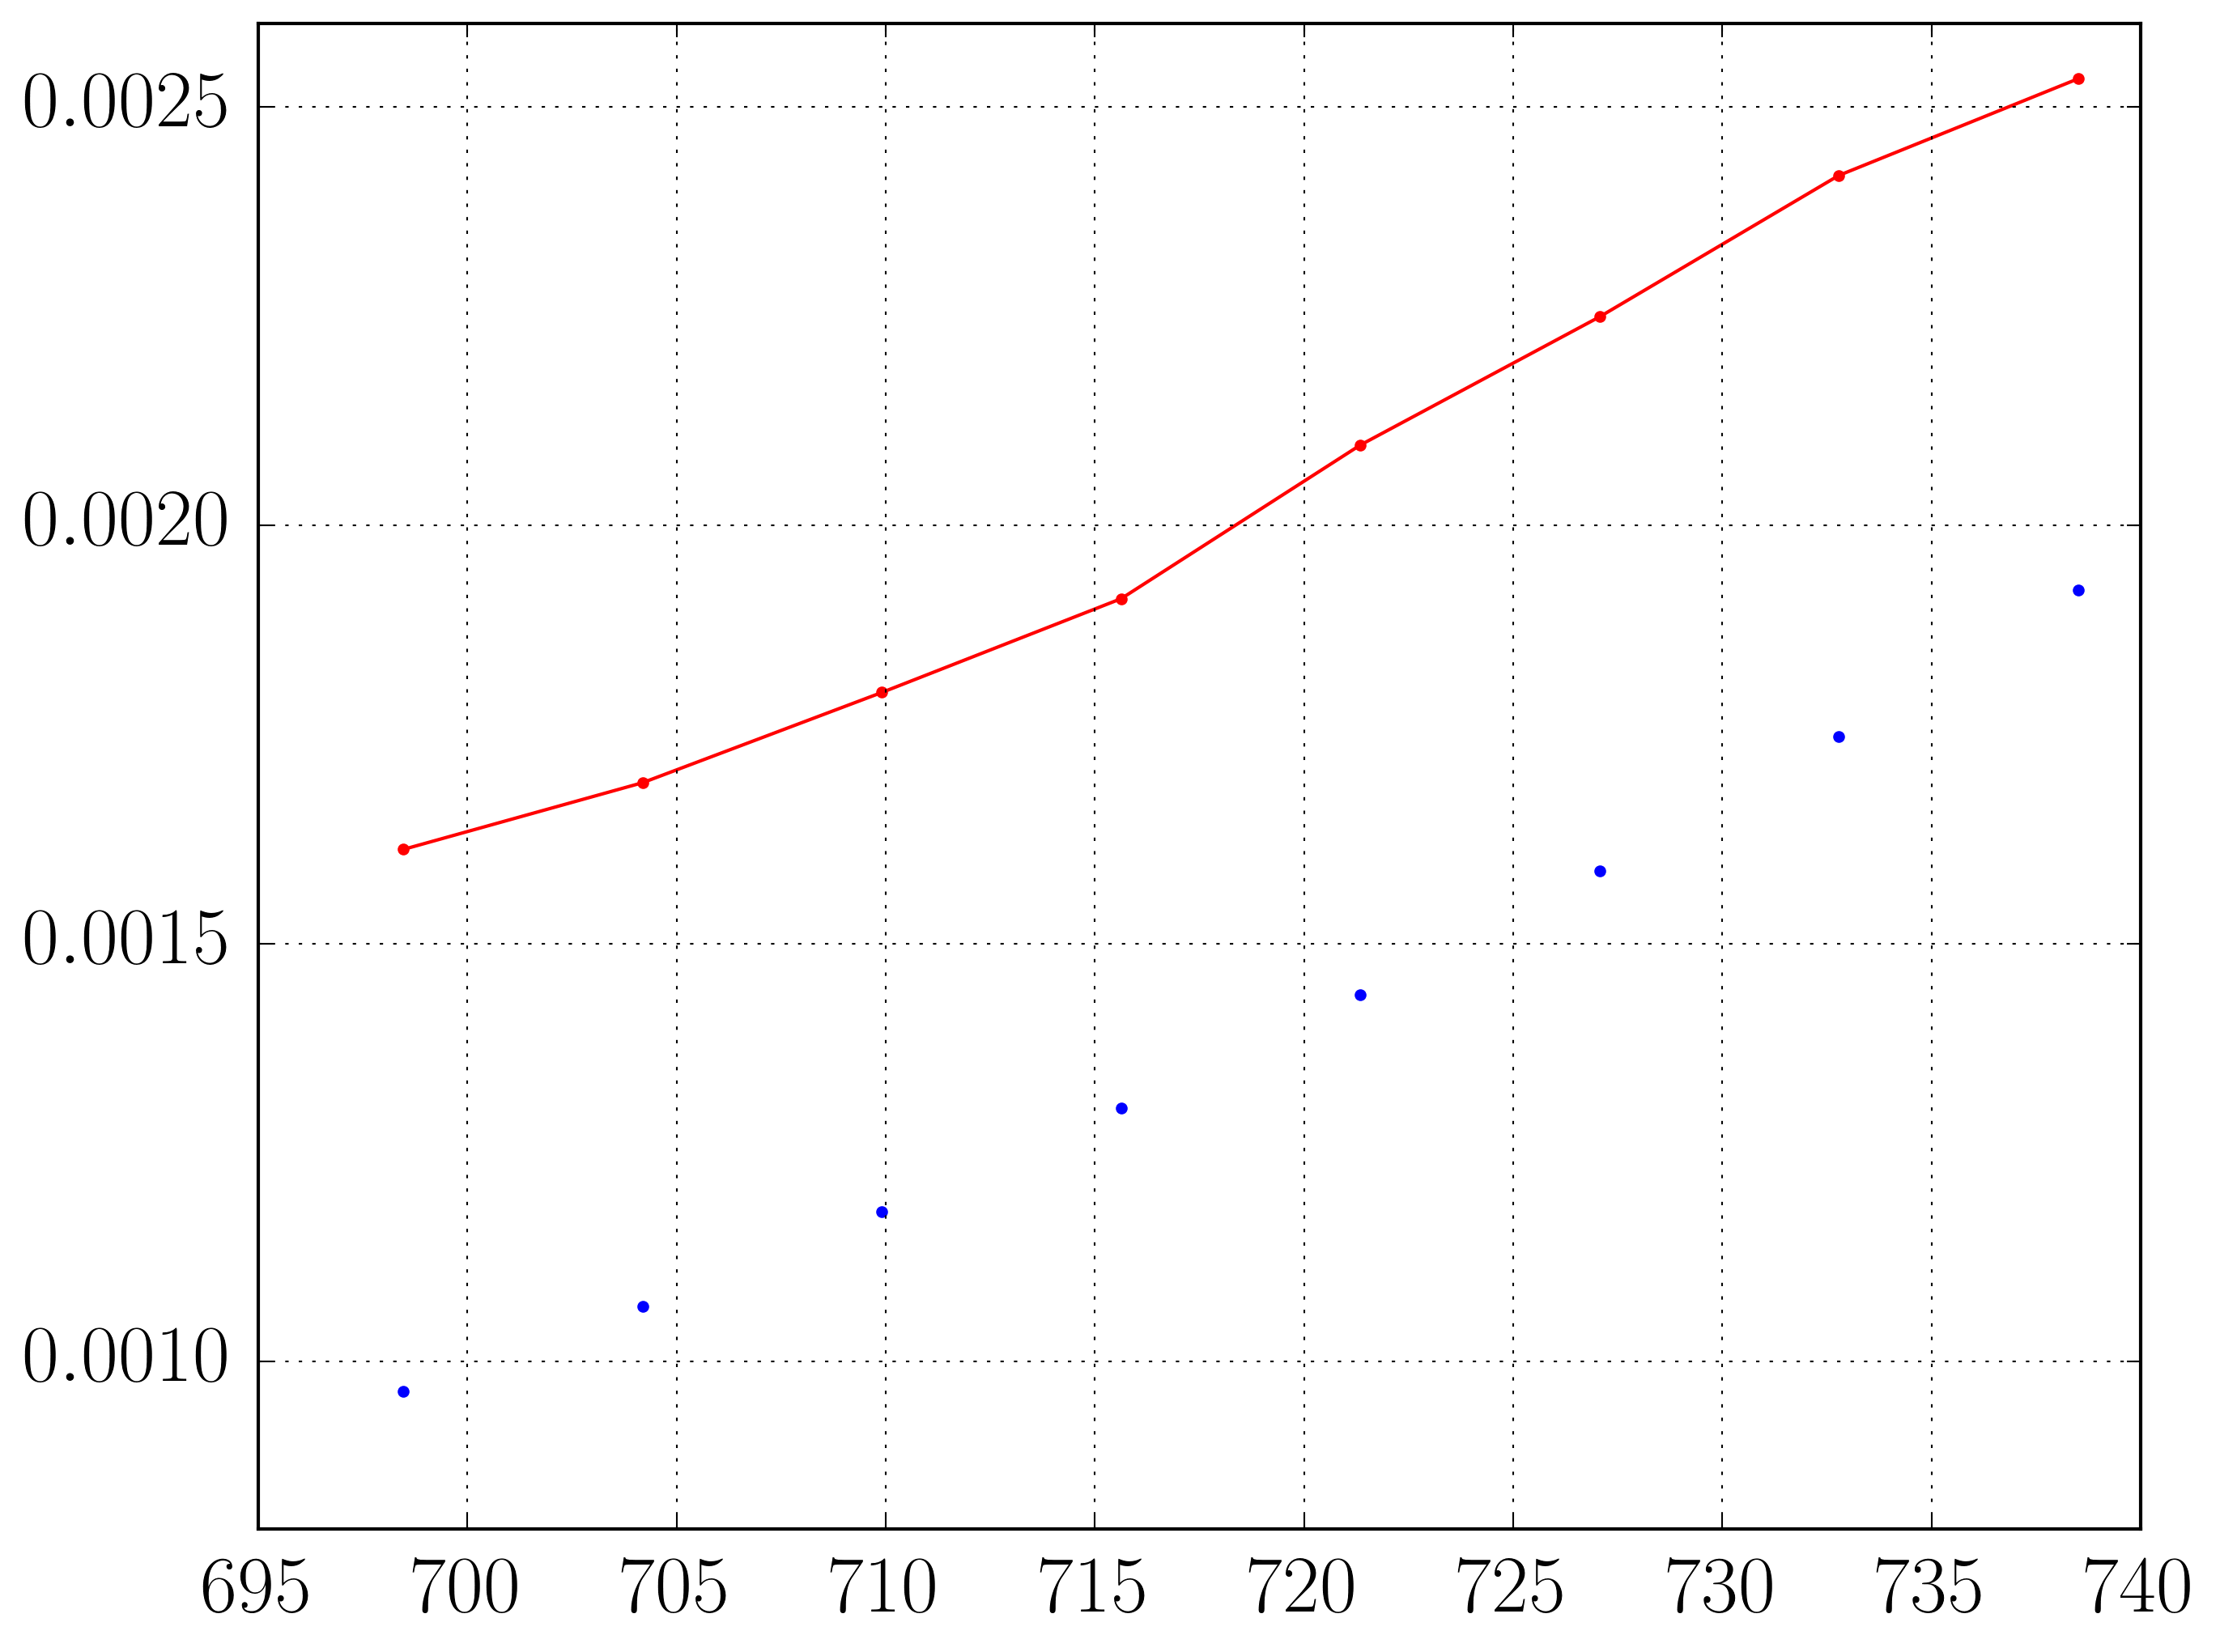

In [794]:
plt.plot(time,dmpoint,'b.')
plt.plot(time,der1(time,dm),'r.-')
#plt.ylim([0.0,0.01])
plt.grid('on')

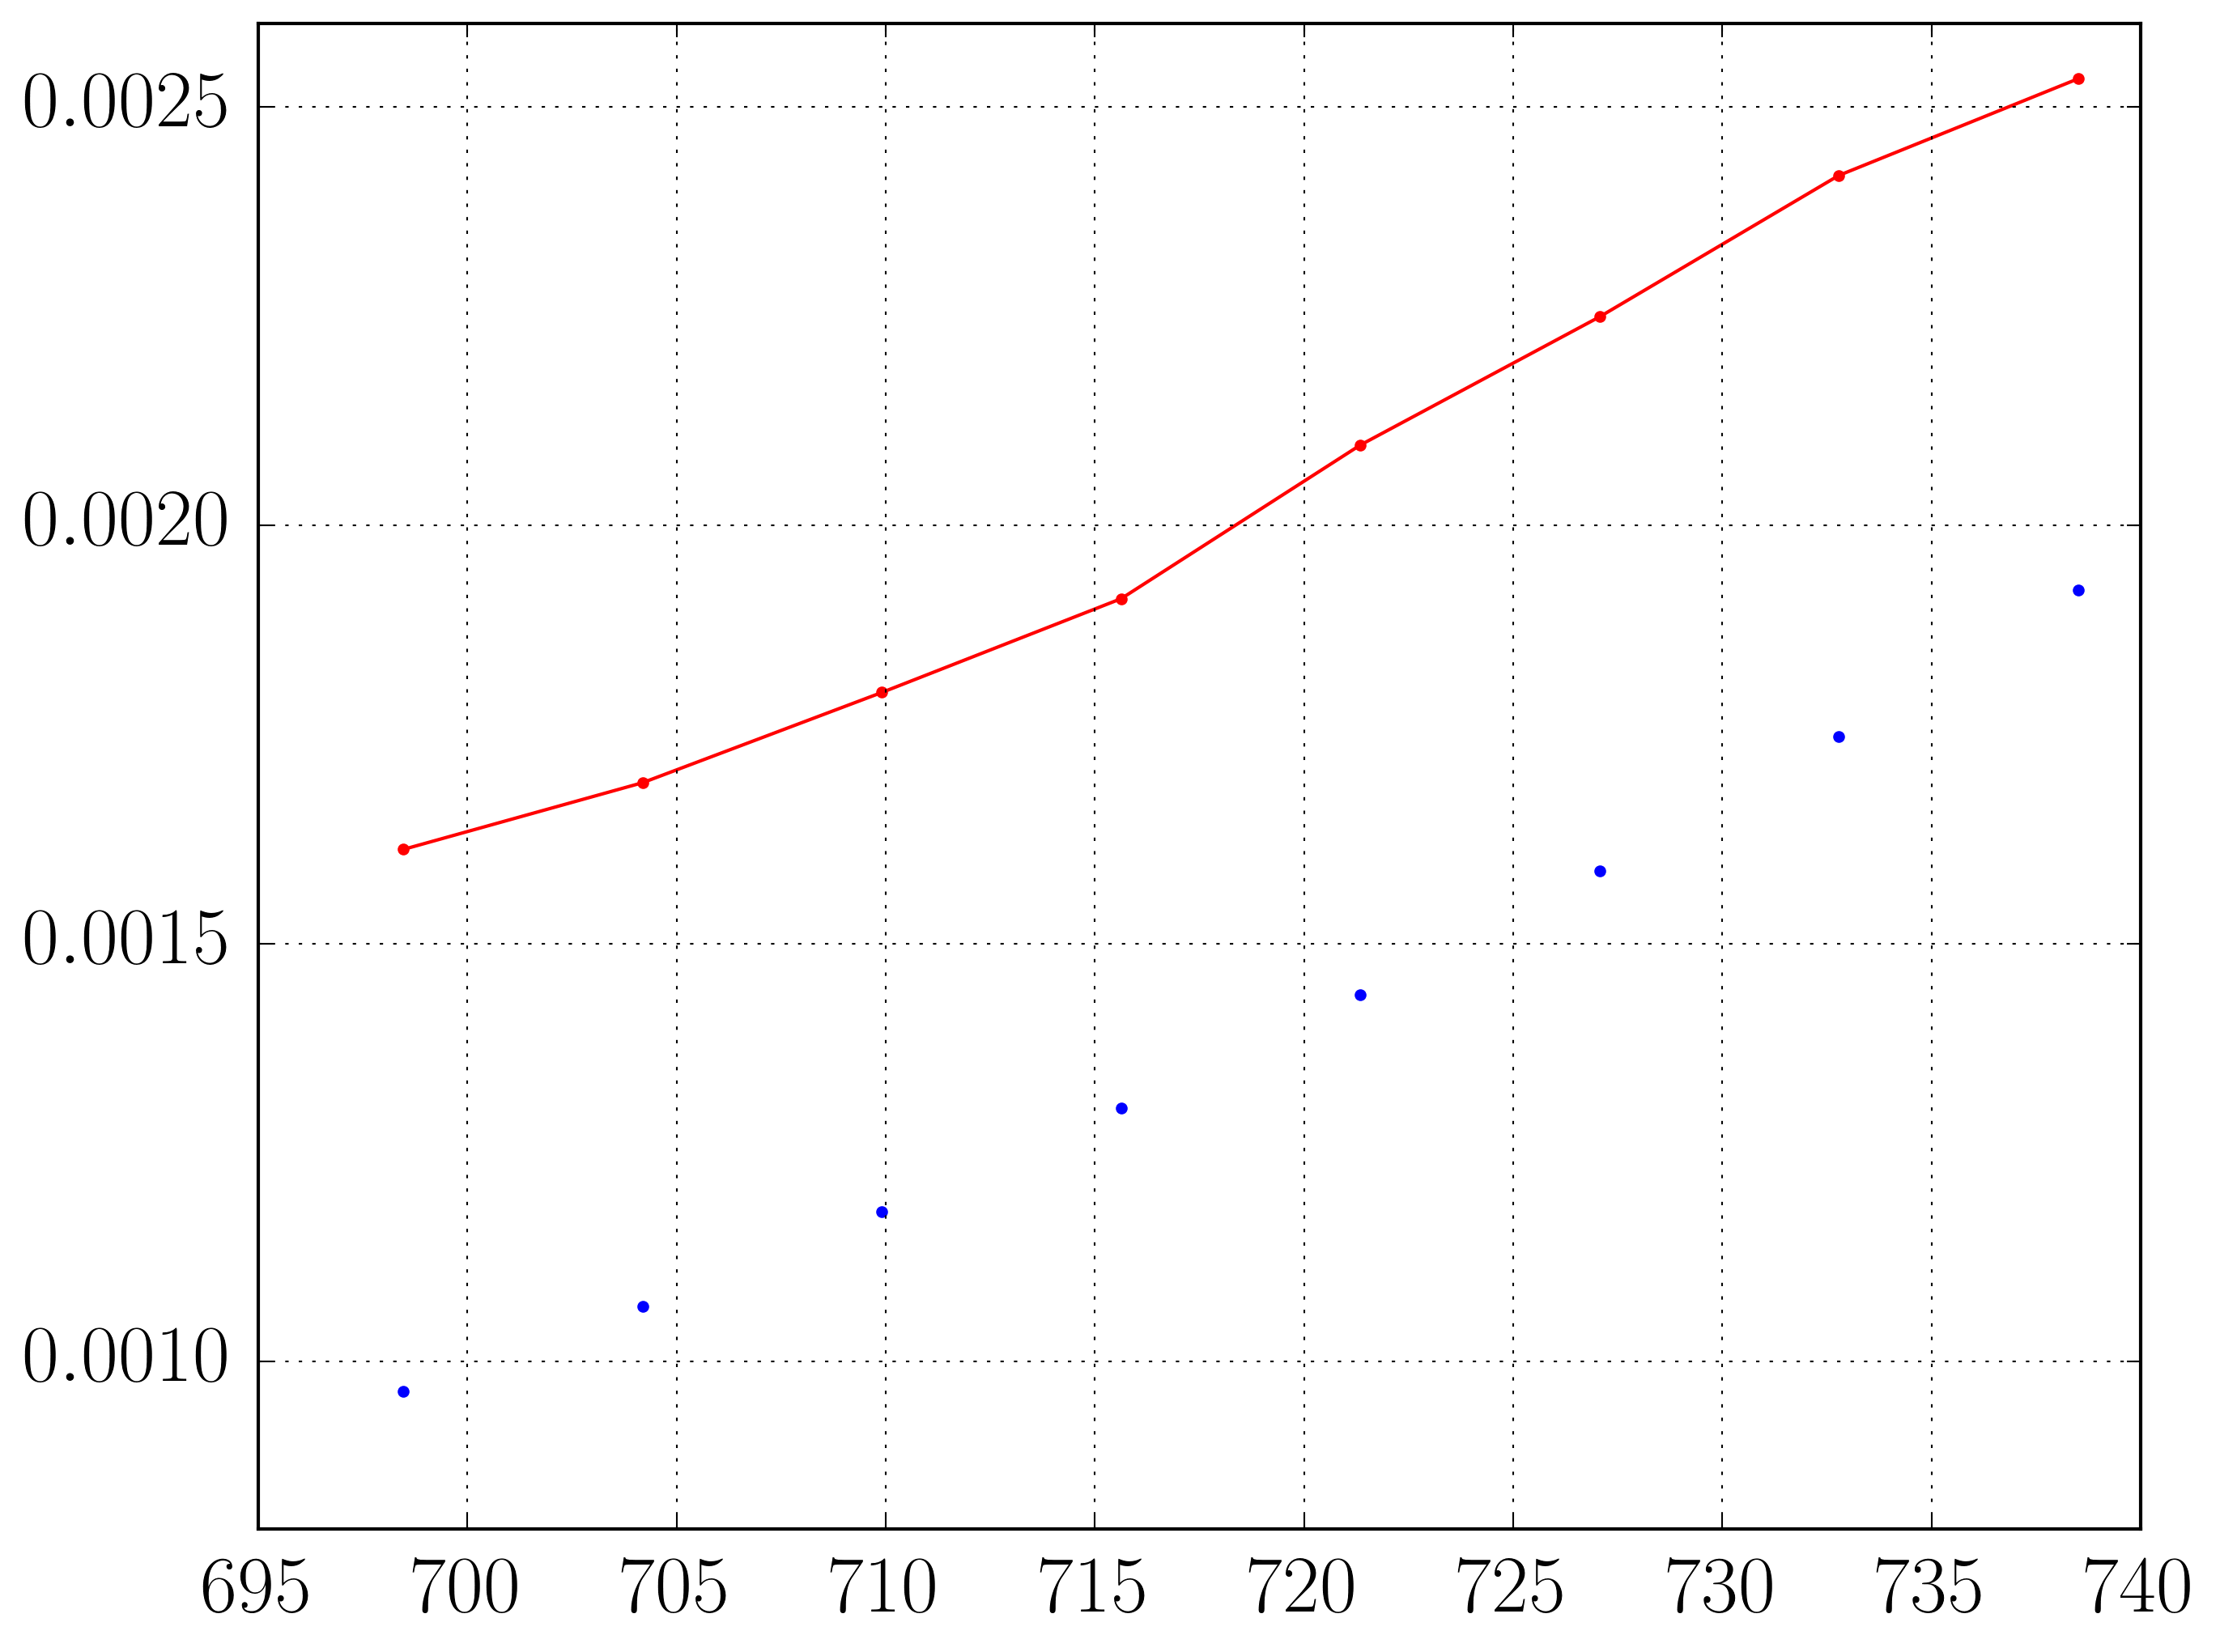

In [795]:
plt.plot(time,dmpoint,'b.')
plt.plot(time,der1(time,dm),'r.-')
#plt.ylim([0.0,0.01])
plt.grid('on')
# The value obtained from R12 is almost unaffected but the momentum thickness is going crazy..

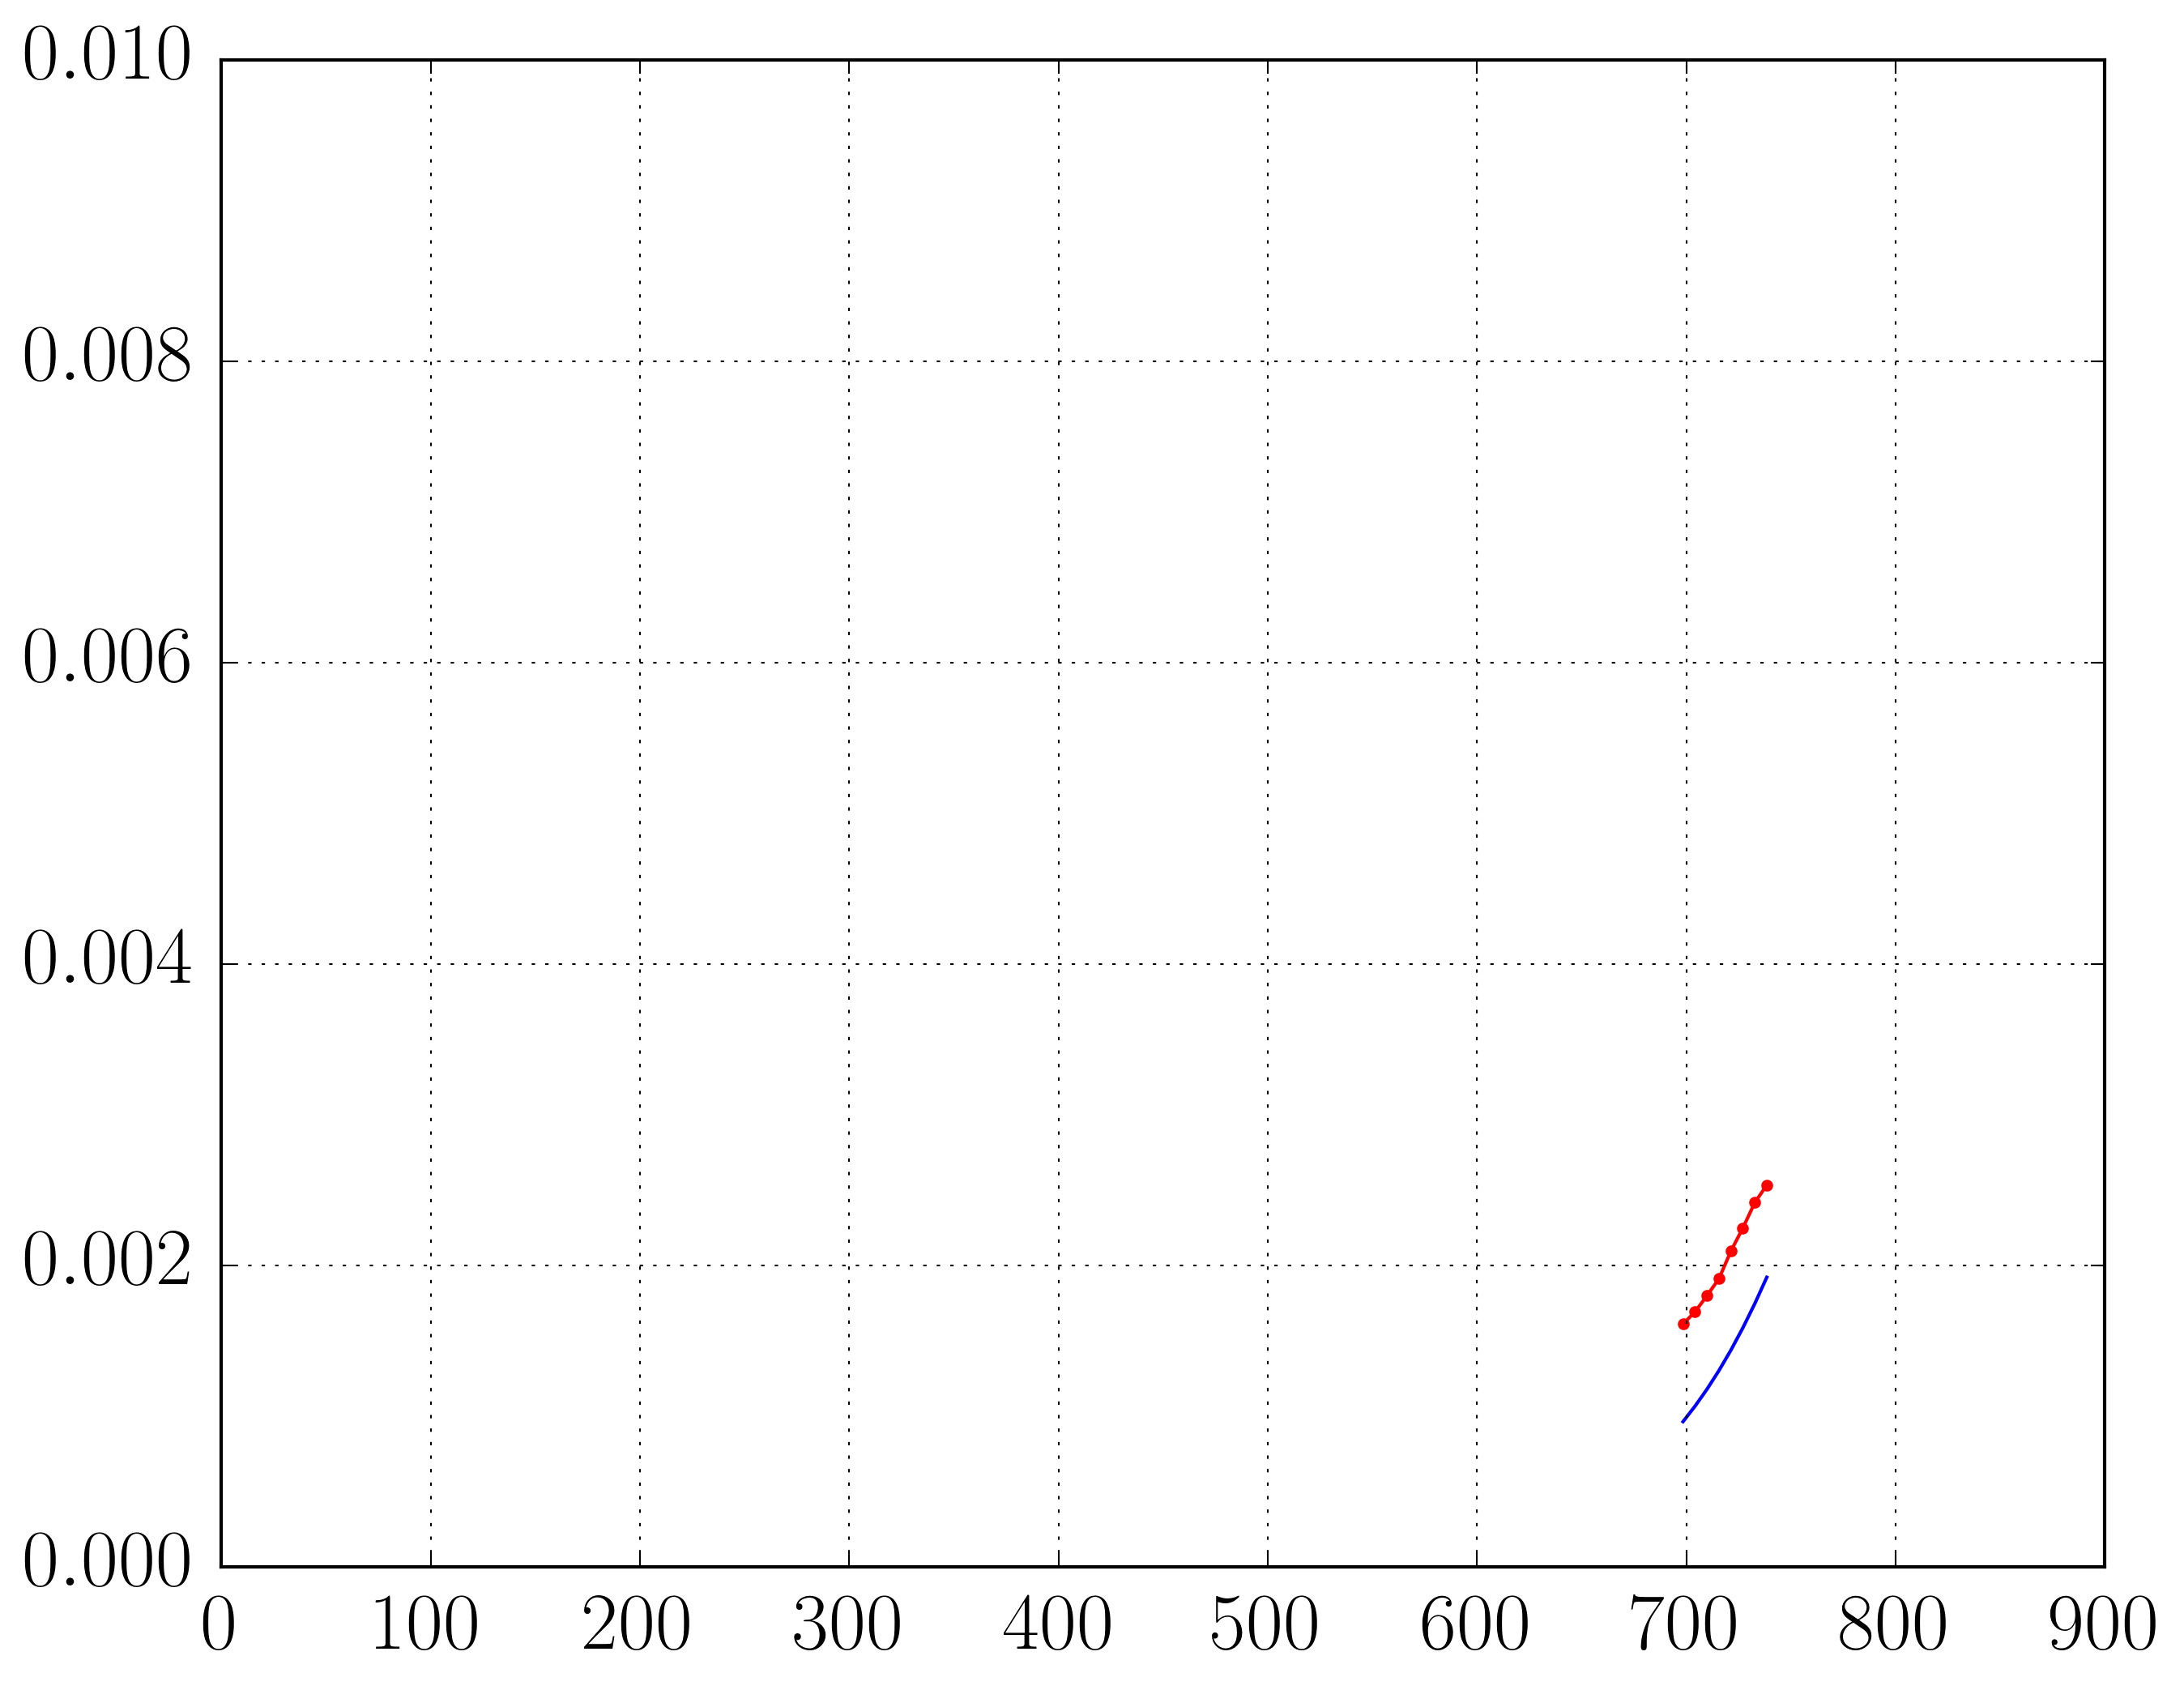

In [796]:
plt.plot(time,dmpoint,'b')
plt.plot(time,der1(time,dm),'r.-')
plt.ylim([0.0,0.01])
plt.xlim([0,900])
plt.grid('on')

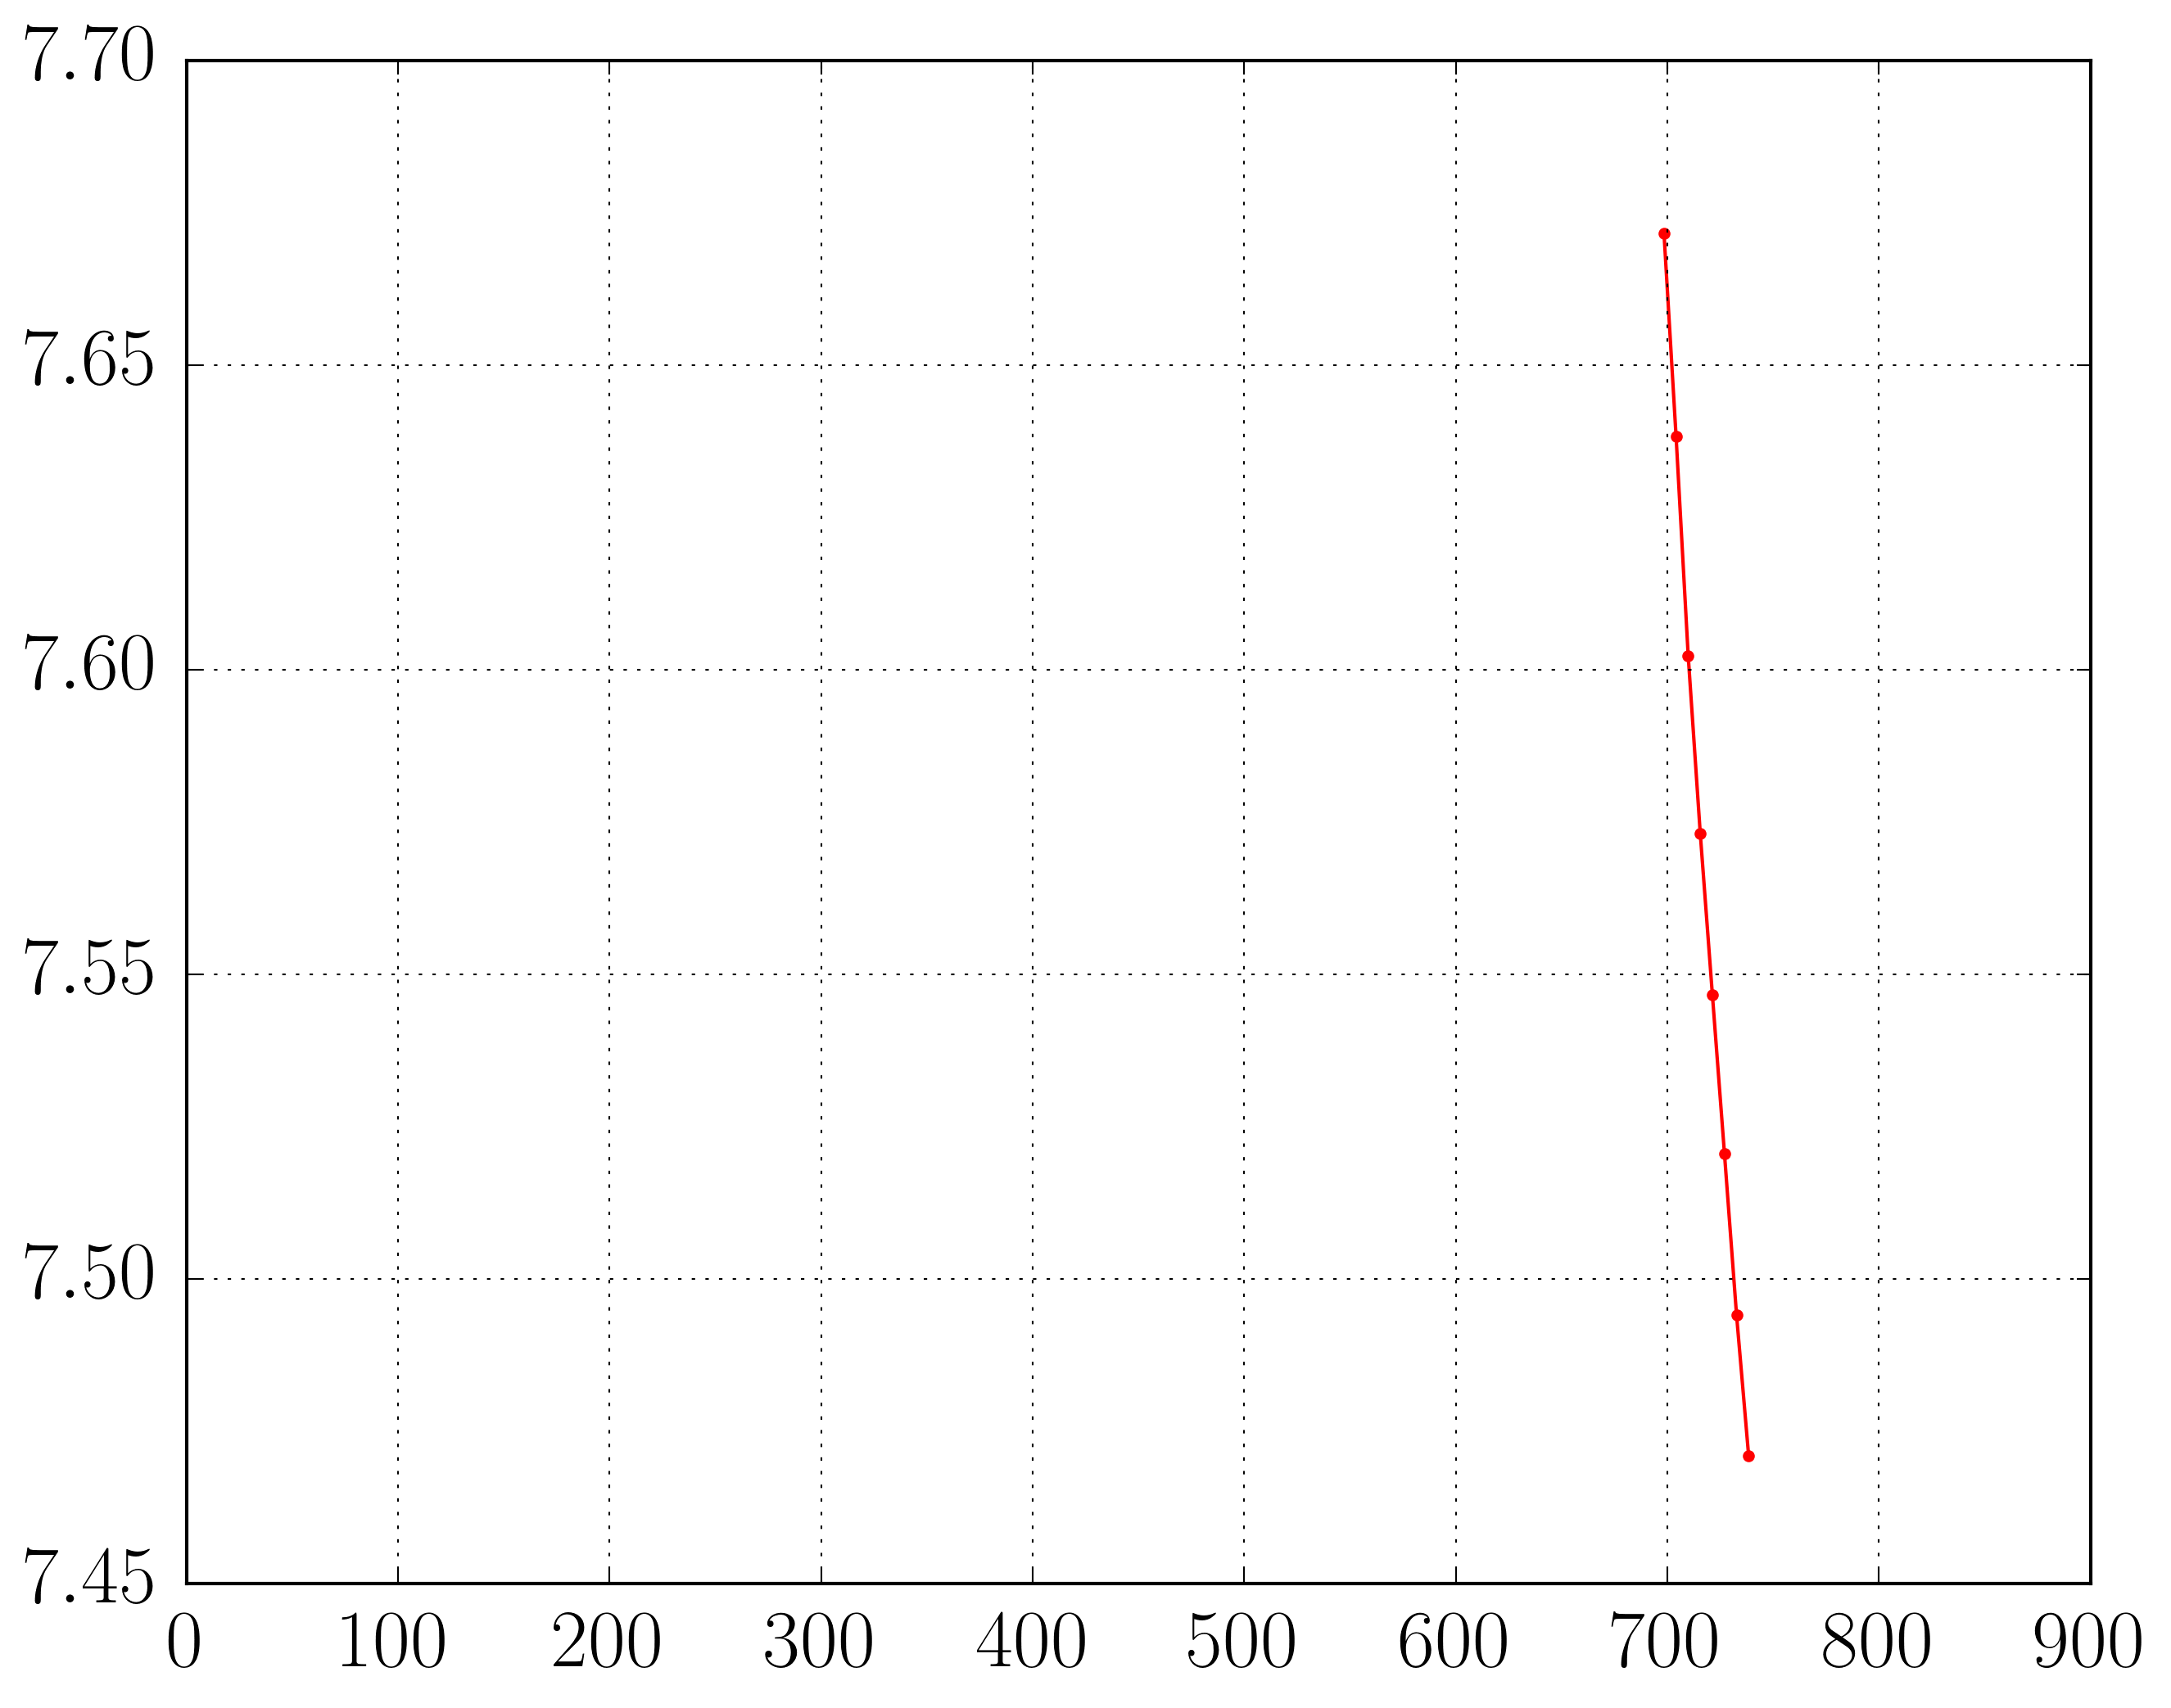

In [797]:
#plt.plot(time,dm,'b')
plt.plot(time,dw/dm,'r.-')
#plt.ylim([0.0,0.01])
plt.xlim([0,900])
plt.grid('on')

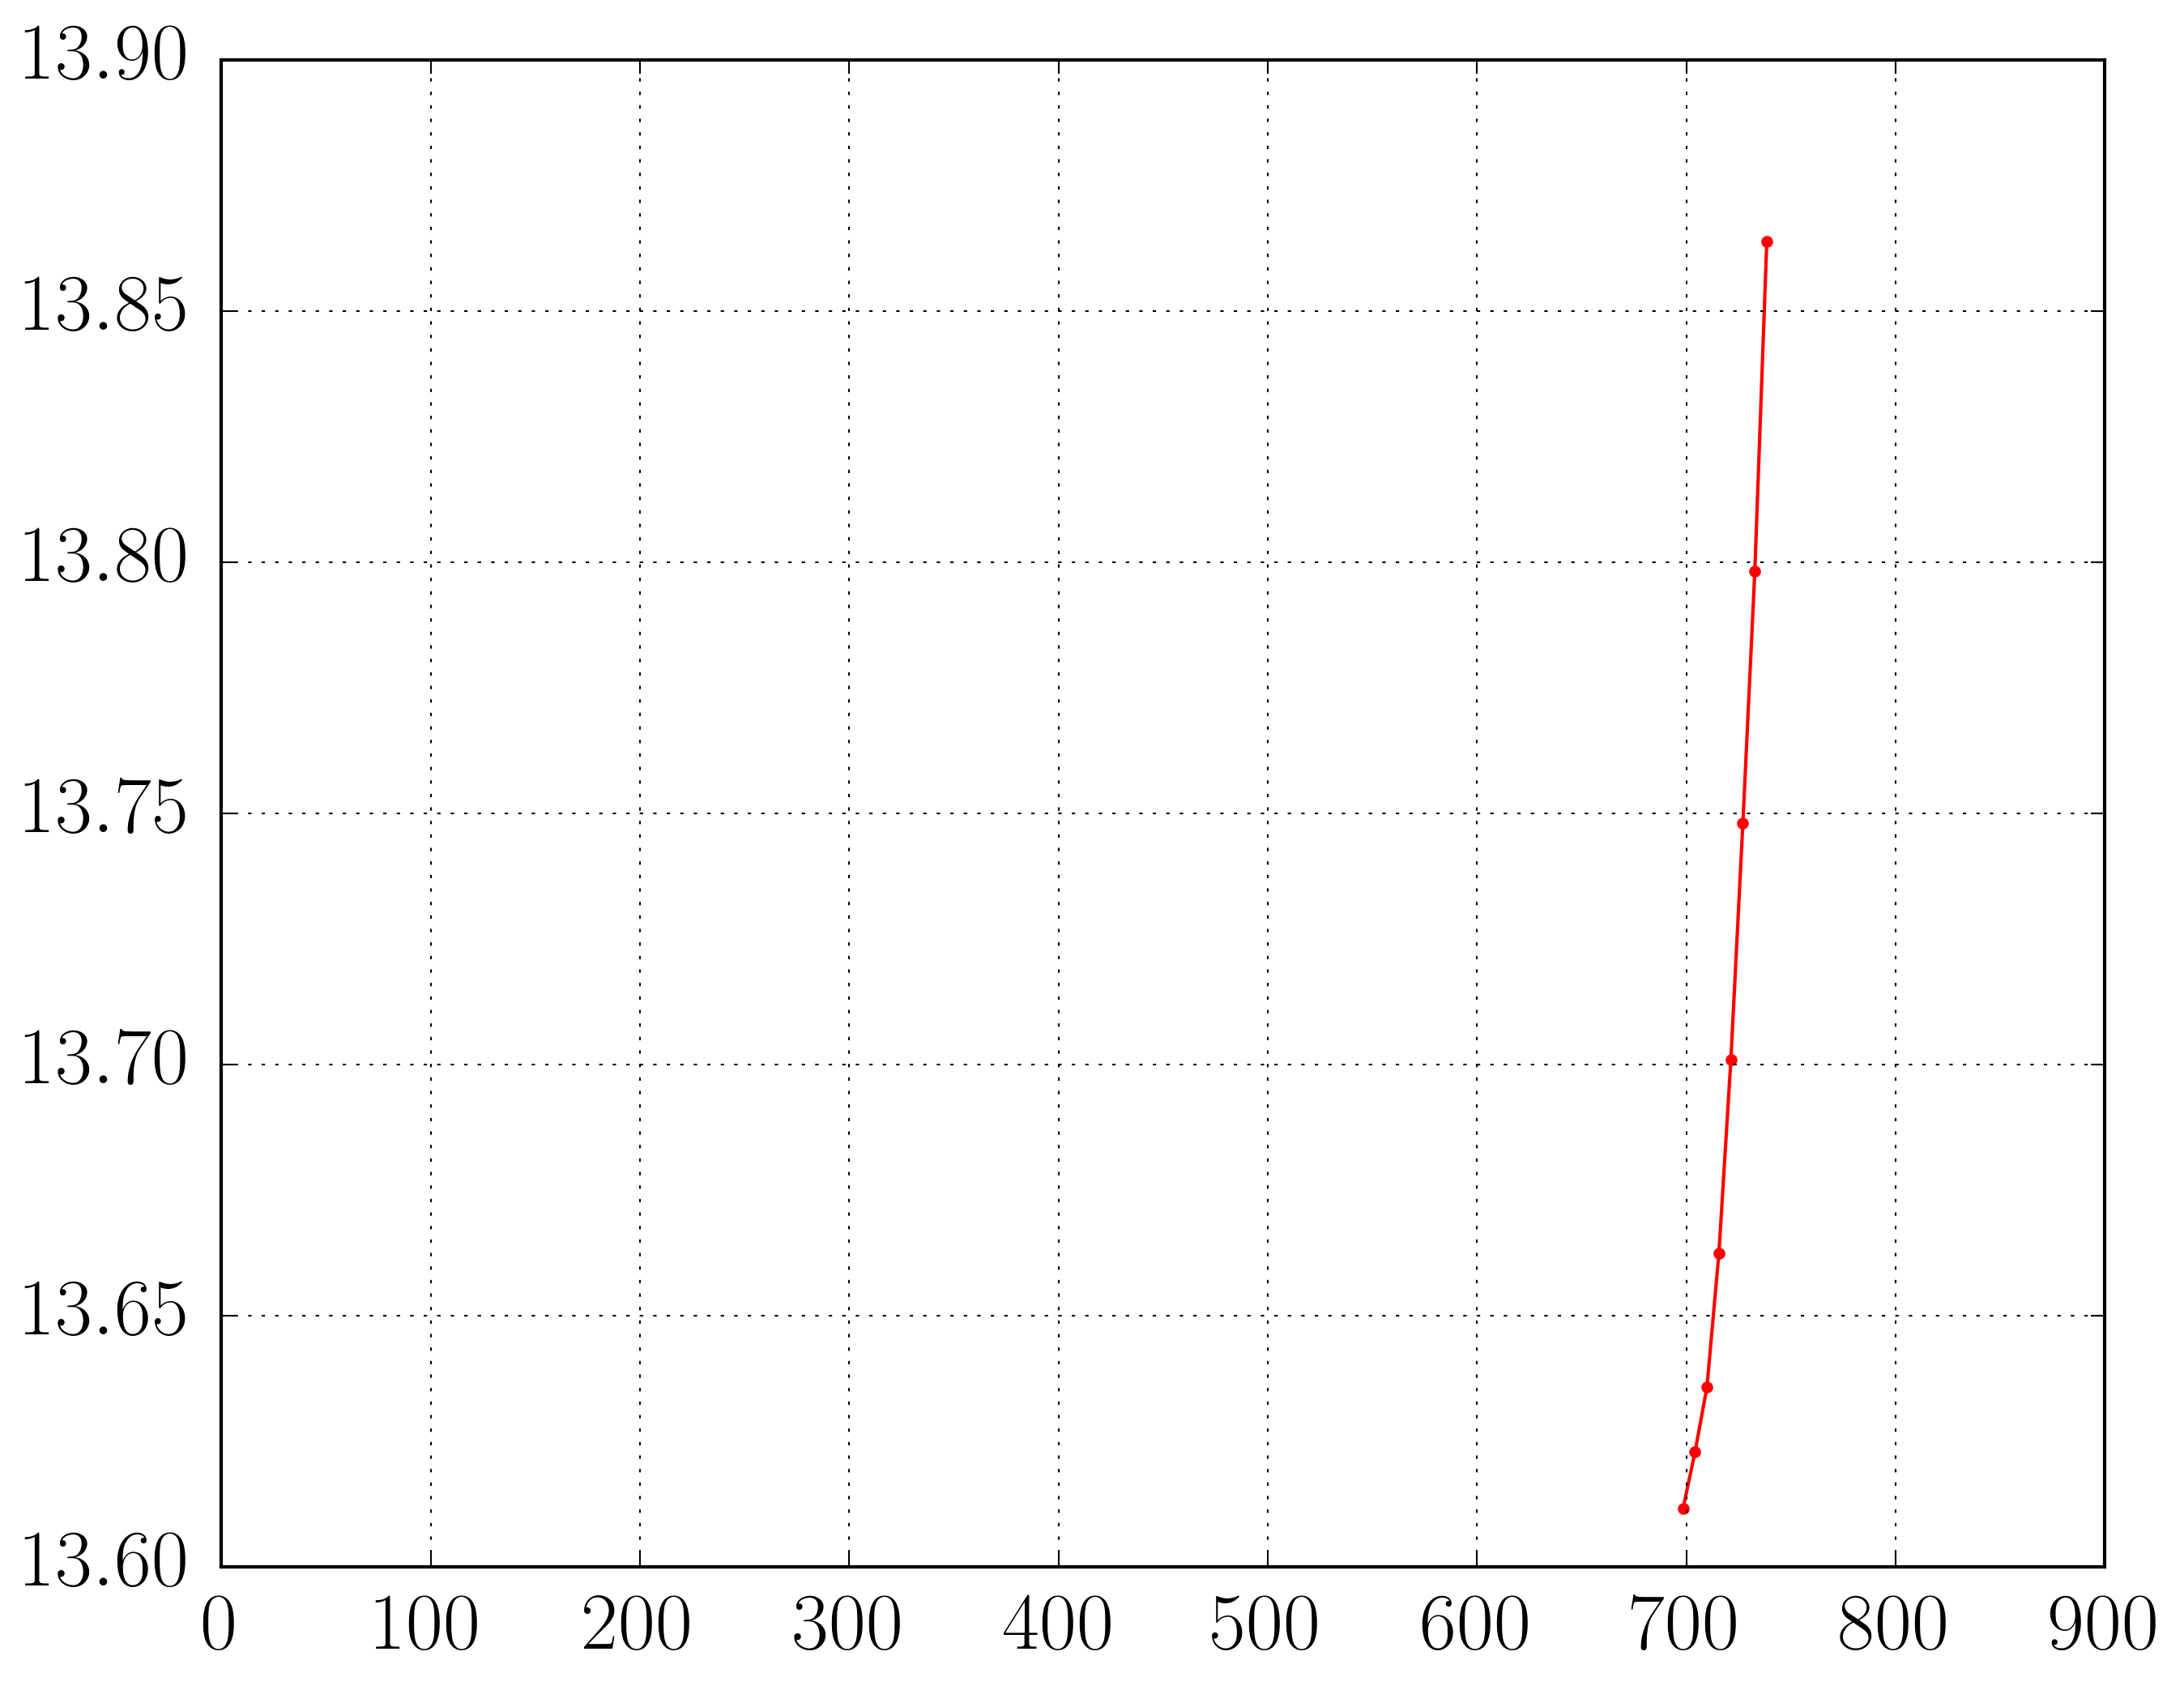

In [798]:
#plt.plot(time,dm,'b')
plt.plot(time,dw,'r.-')
#plt.ylim([0.0,0.01])
plt.xlim([0,900])
plt.grid('on')

709.910522461
715.629516602
721.348510742
727.067504883
732.786499023
738.505493164


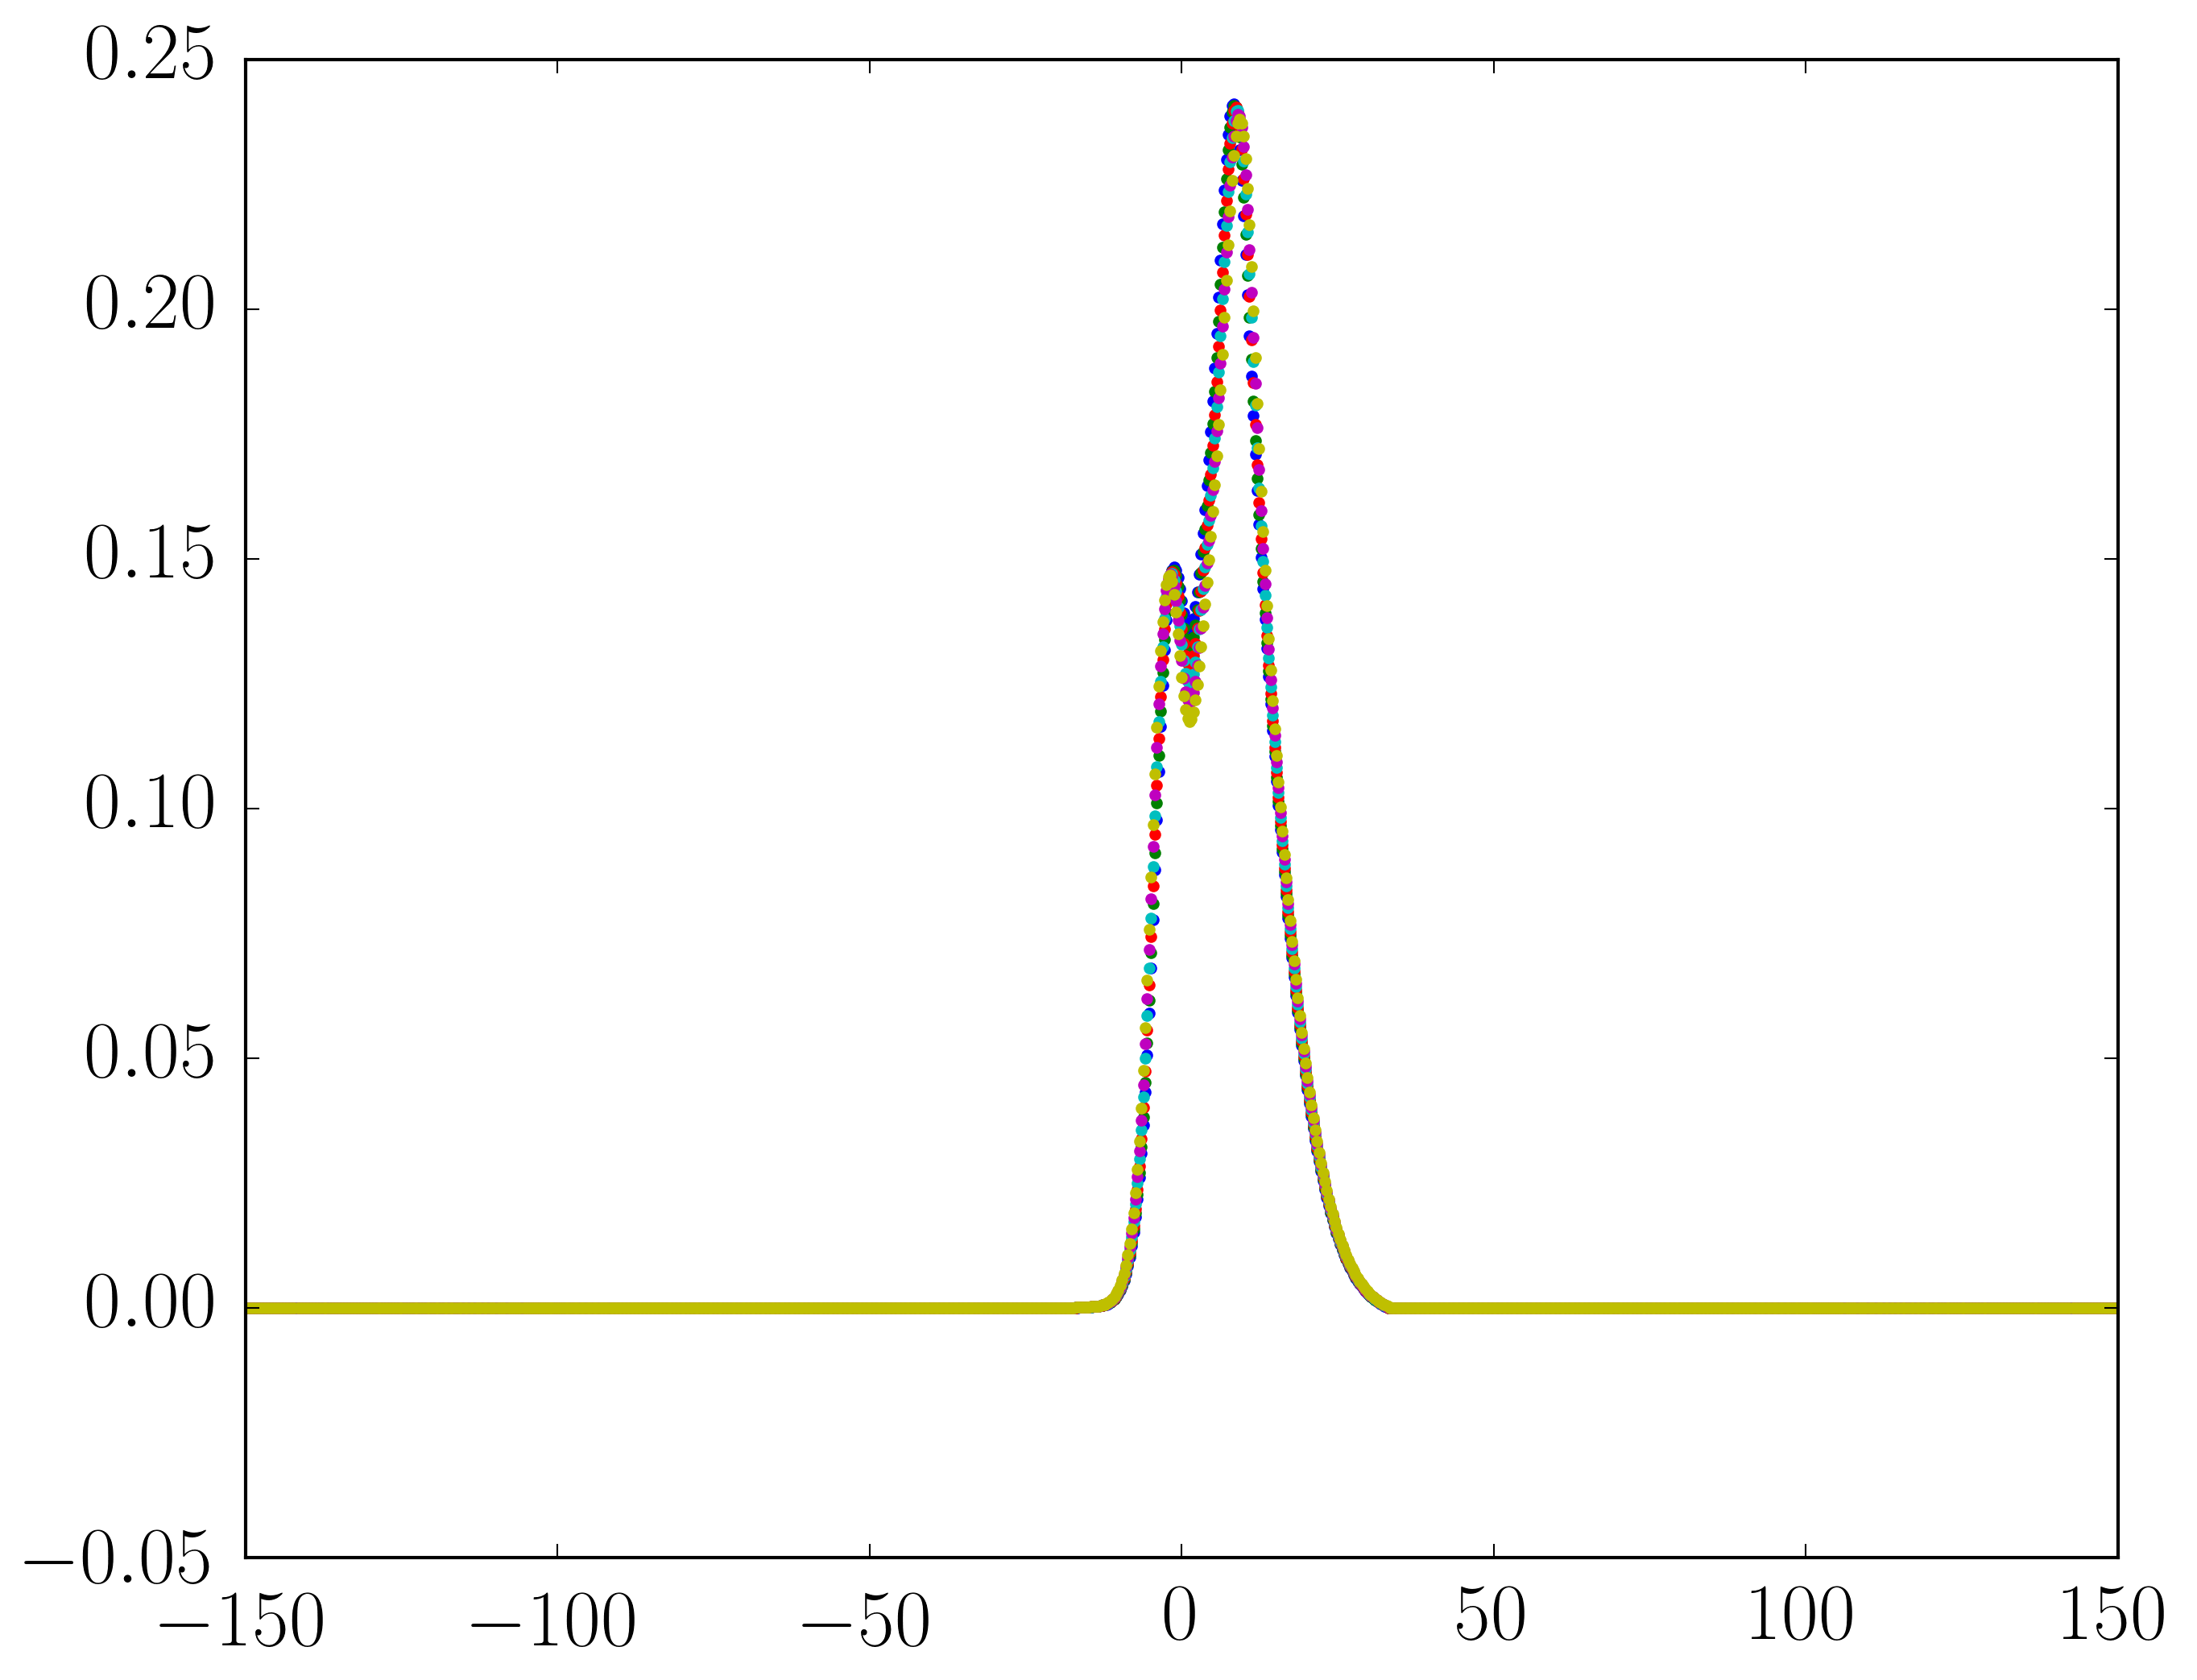

In [799]:
-
    
    print time[ii+1]
    #print np.trapz(-dTdt[:,ii]/Tm[:,ii]**2,yf)
    #print np.trapz(drhodtleft[:,ii],yf)
    #print np.trapz(drhodtleft[:,ii],yf)+Sigma[ii]
    #print np.trapz(drhodtright[:,ii],yf)
    #print -(rvm[-1,ii]-rvm[0,ii])
    
    #plt.plot(yf/dm[ii],drhodtright[:,ii],'b')
    #plt.plot(yf/dm[ii],Tm[:,ii])
    #plt.plot(yf/dm[ii],Tm[:,ii])
    #plt.plot(yf/dm[ii],drhodt[:,ii],'-')
#plt.yscale('log')
#plt.xlim([-10,15])

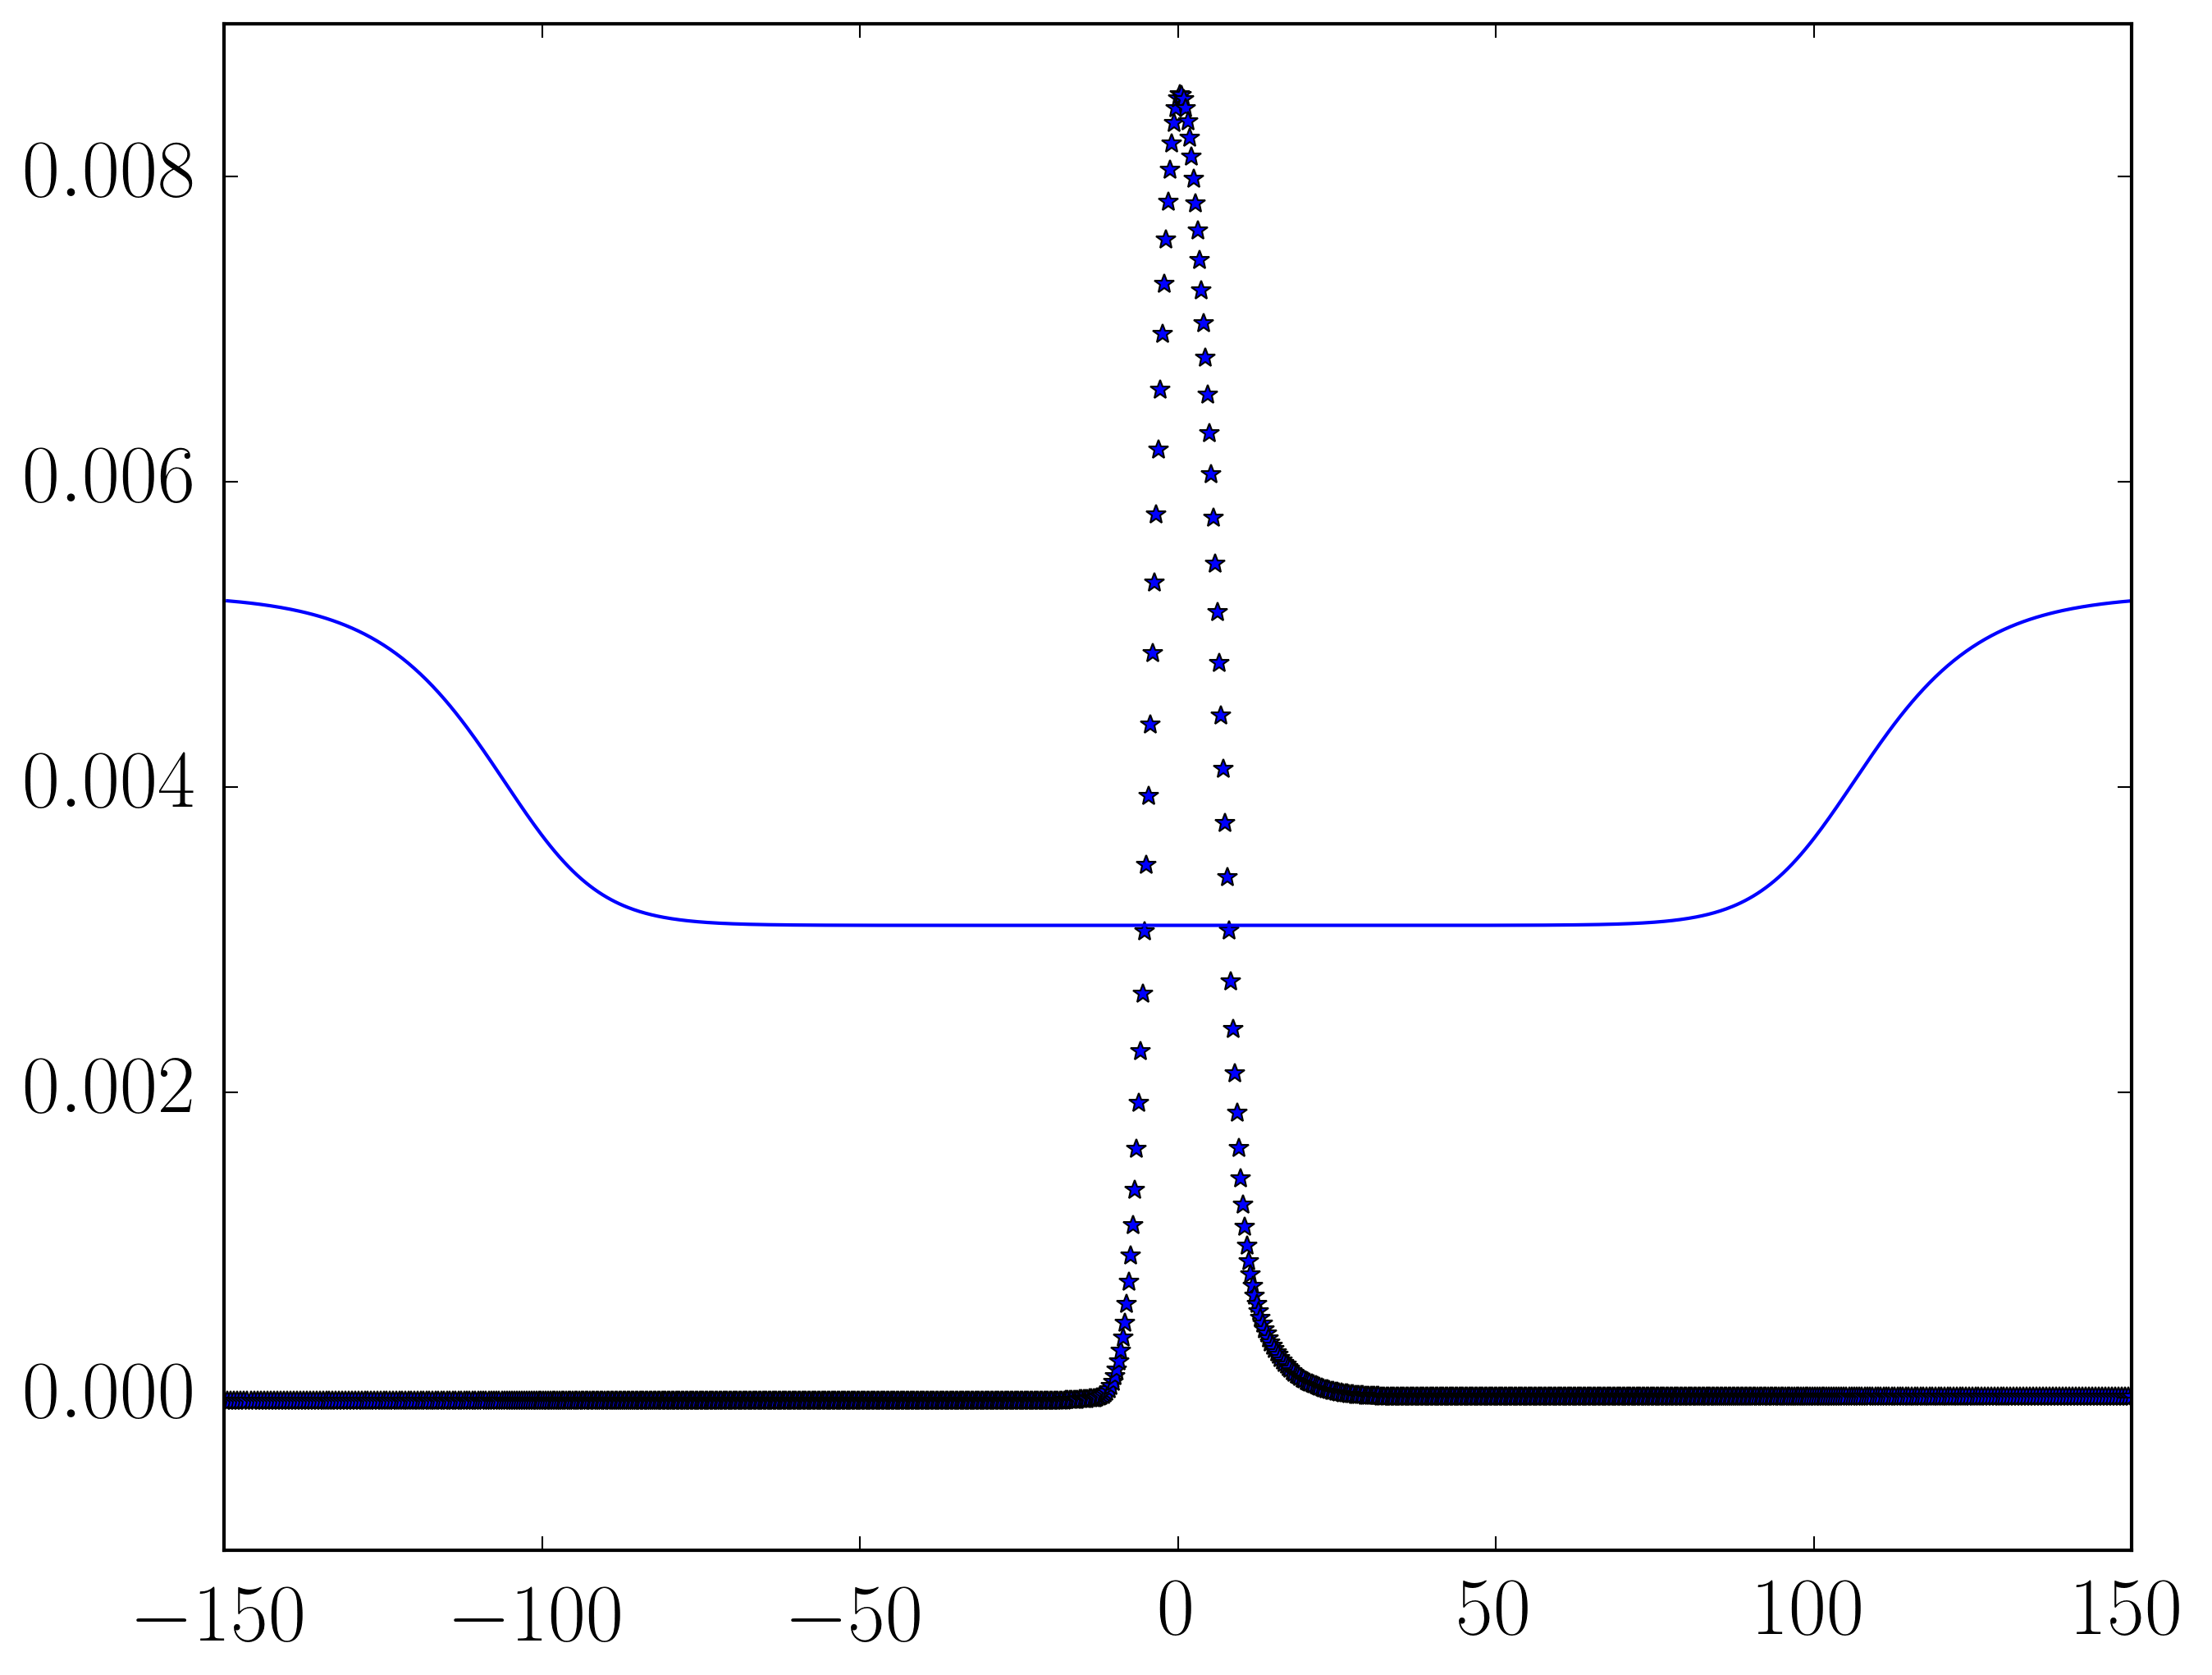

In [800]:
plt.plot(yf,rvm[:,-5],'b*')
plt.plot(yf[1:],np.diff(yf)*.01)
#plt.xlim([-10,10])

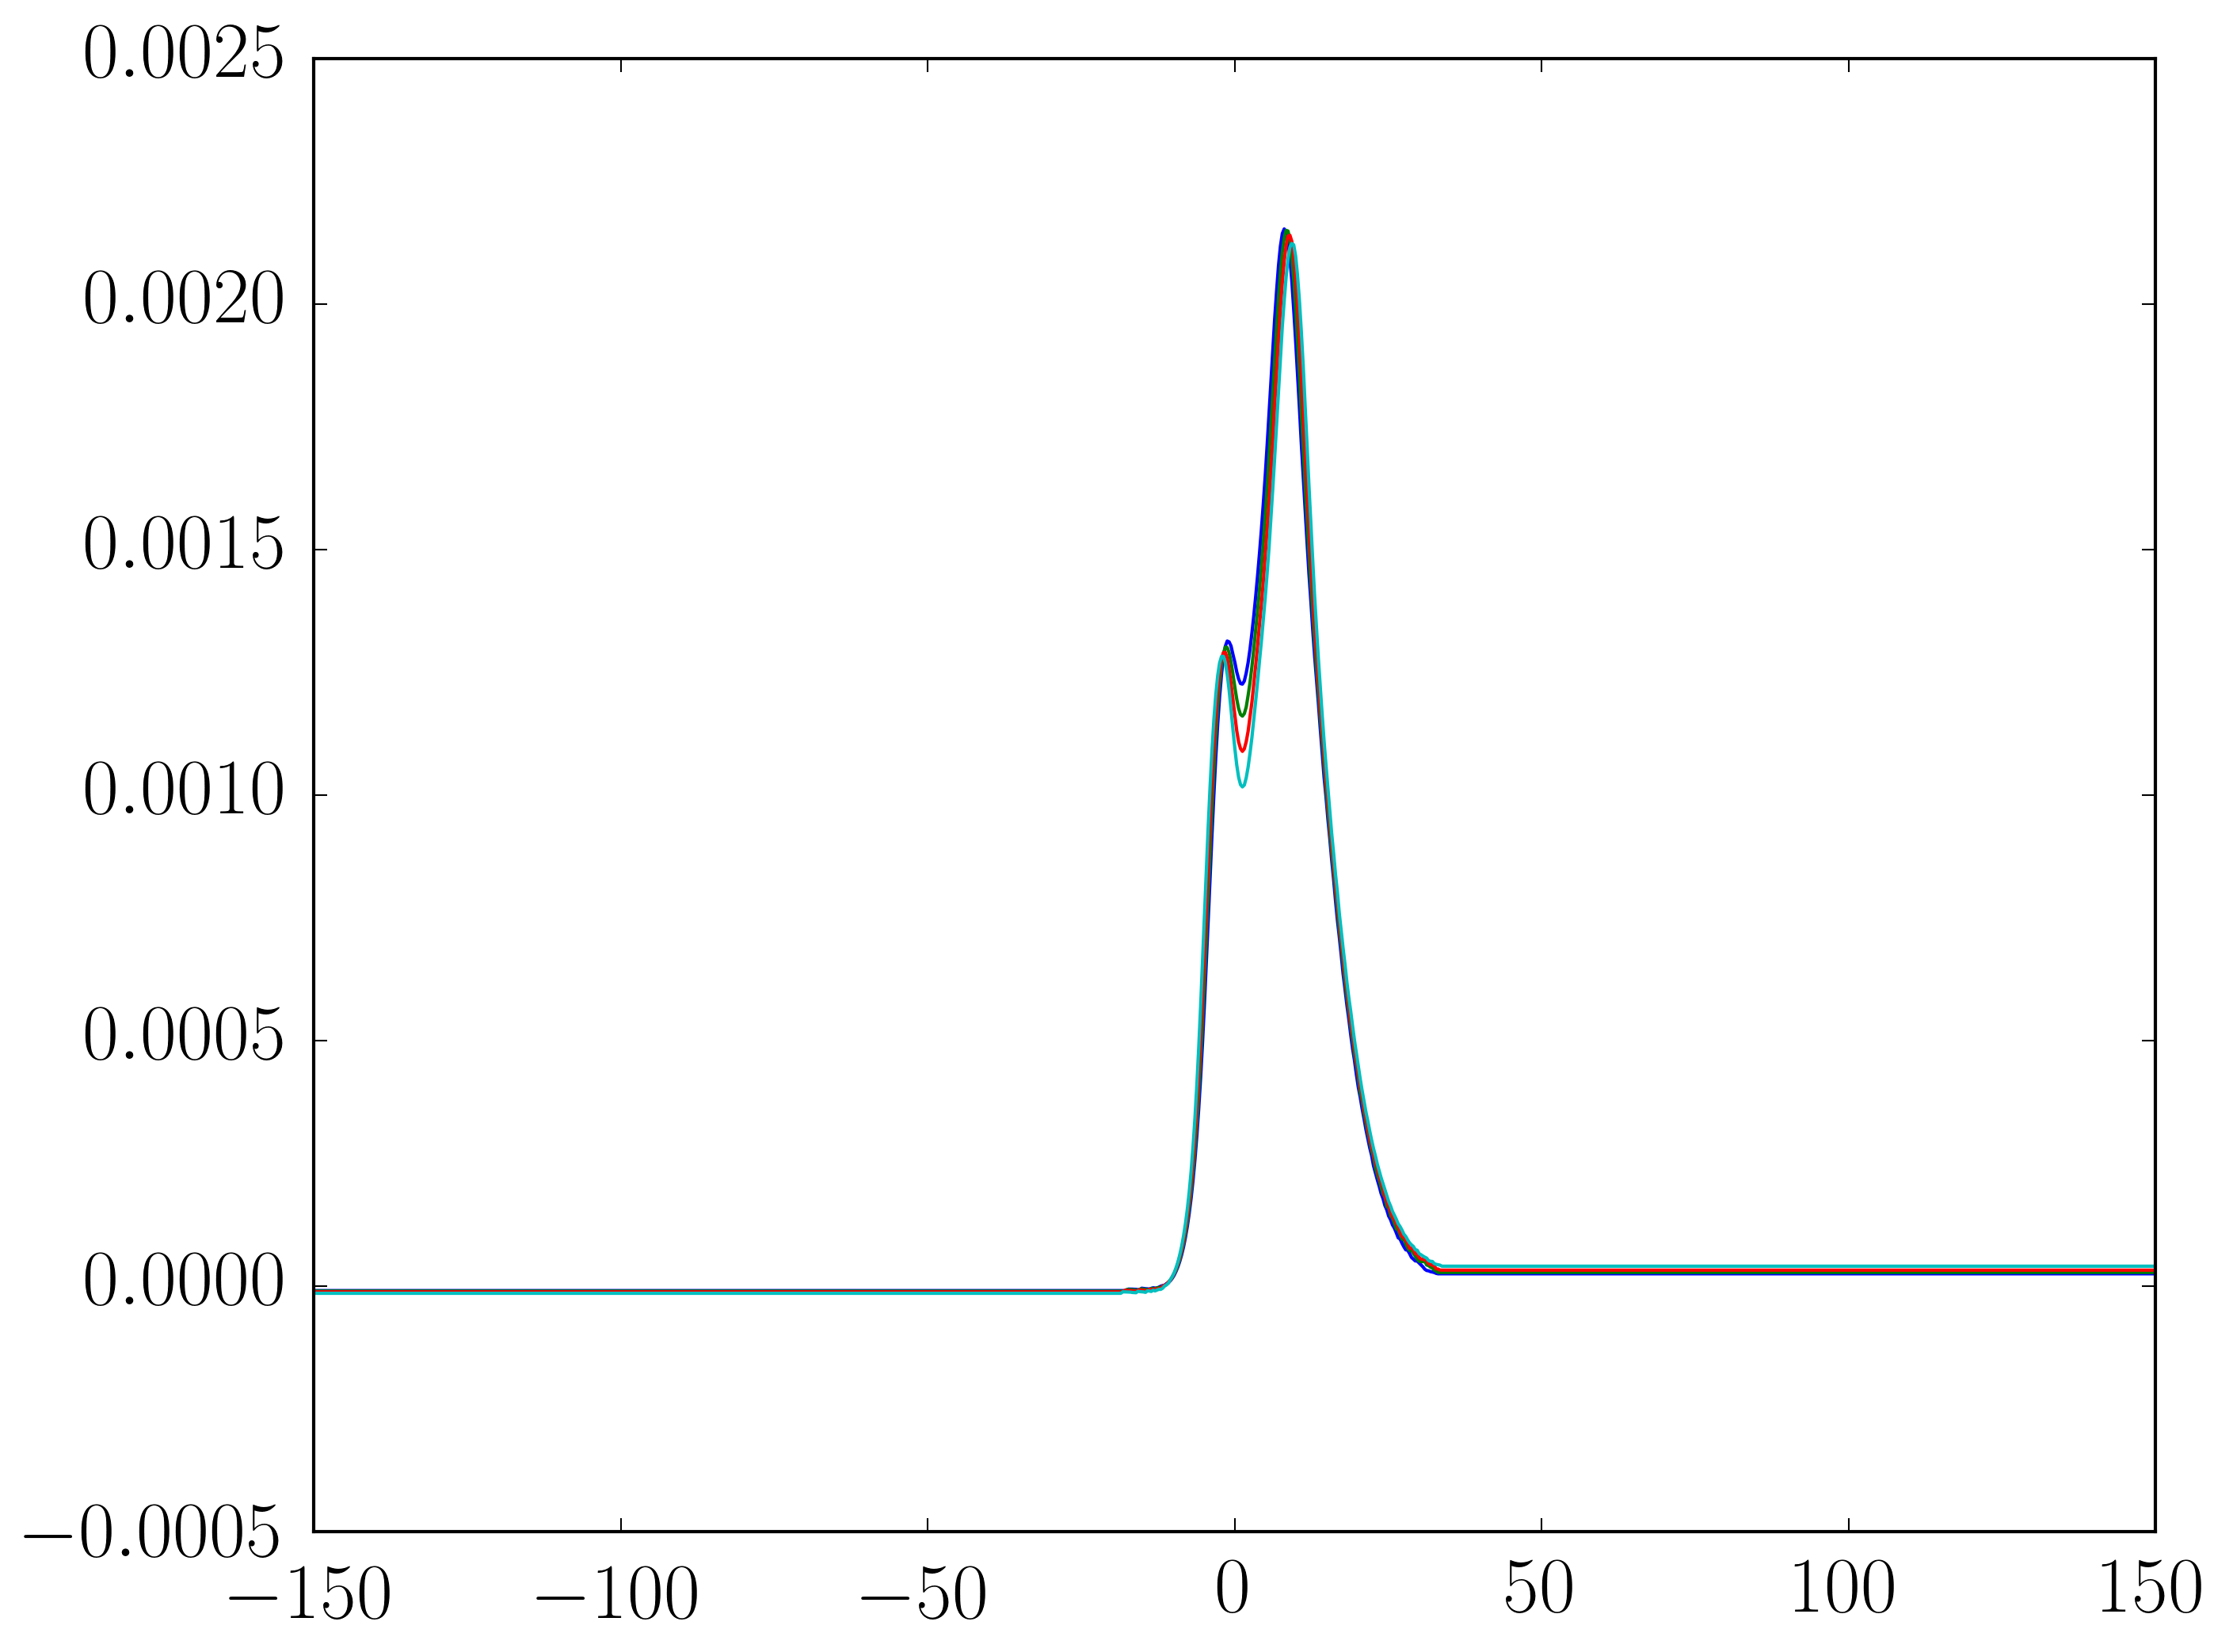

In [802]:
plt.plot(yf,vm[:,0:-1:2])
#plt.plot(yf,vm[:,-50:-40:5],ls='dashed')
#plt.xlim([-10,30])

(8,)
-2.14991862958e-05
-2.16541048576e-05
-2.39003780644e-05
-2.67378746639e-05
-2.78502592664e-05
-3.26666737055e-05
-3.4652755603e-05
-3.89280324089e-05
2.8284272005
2.82842712475


(-20, 50)

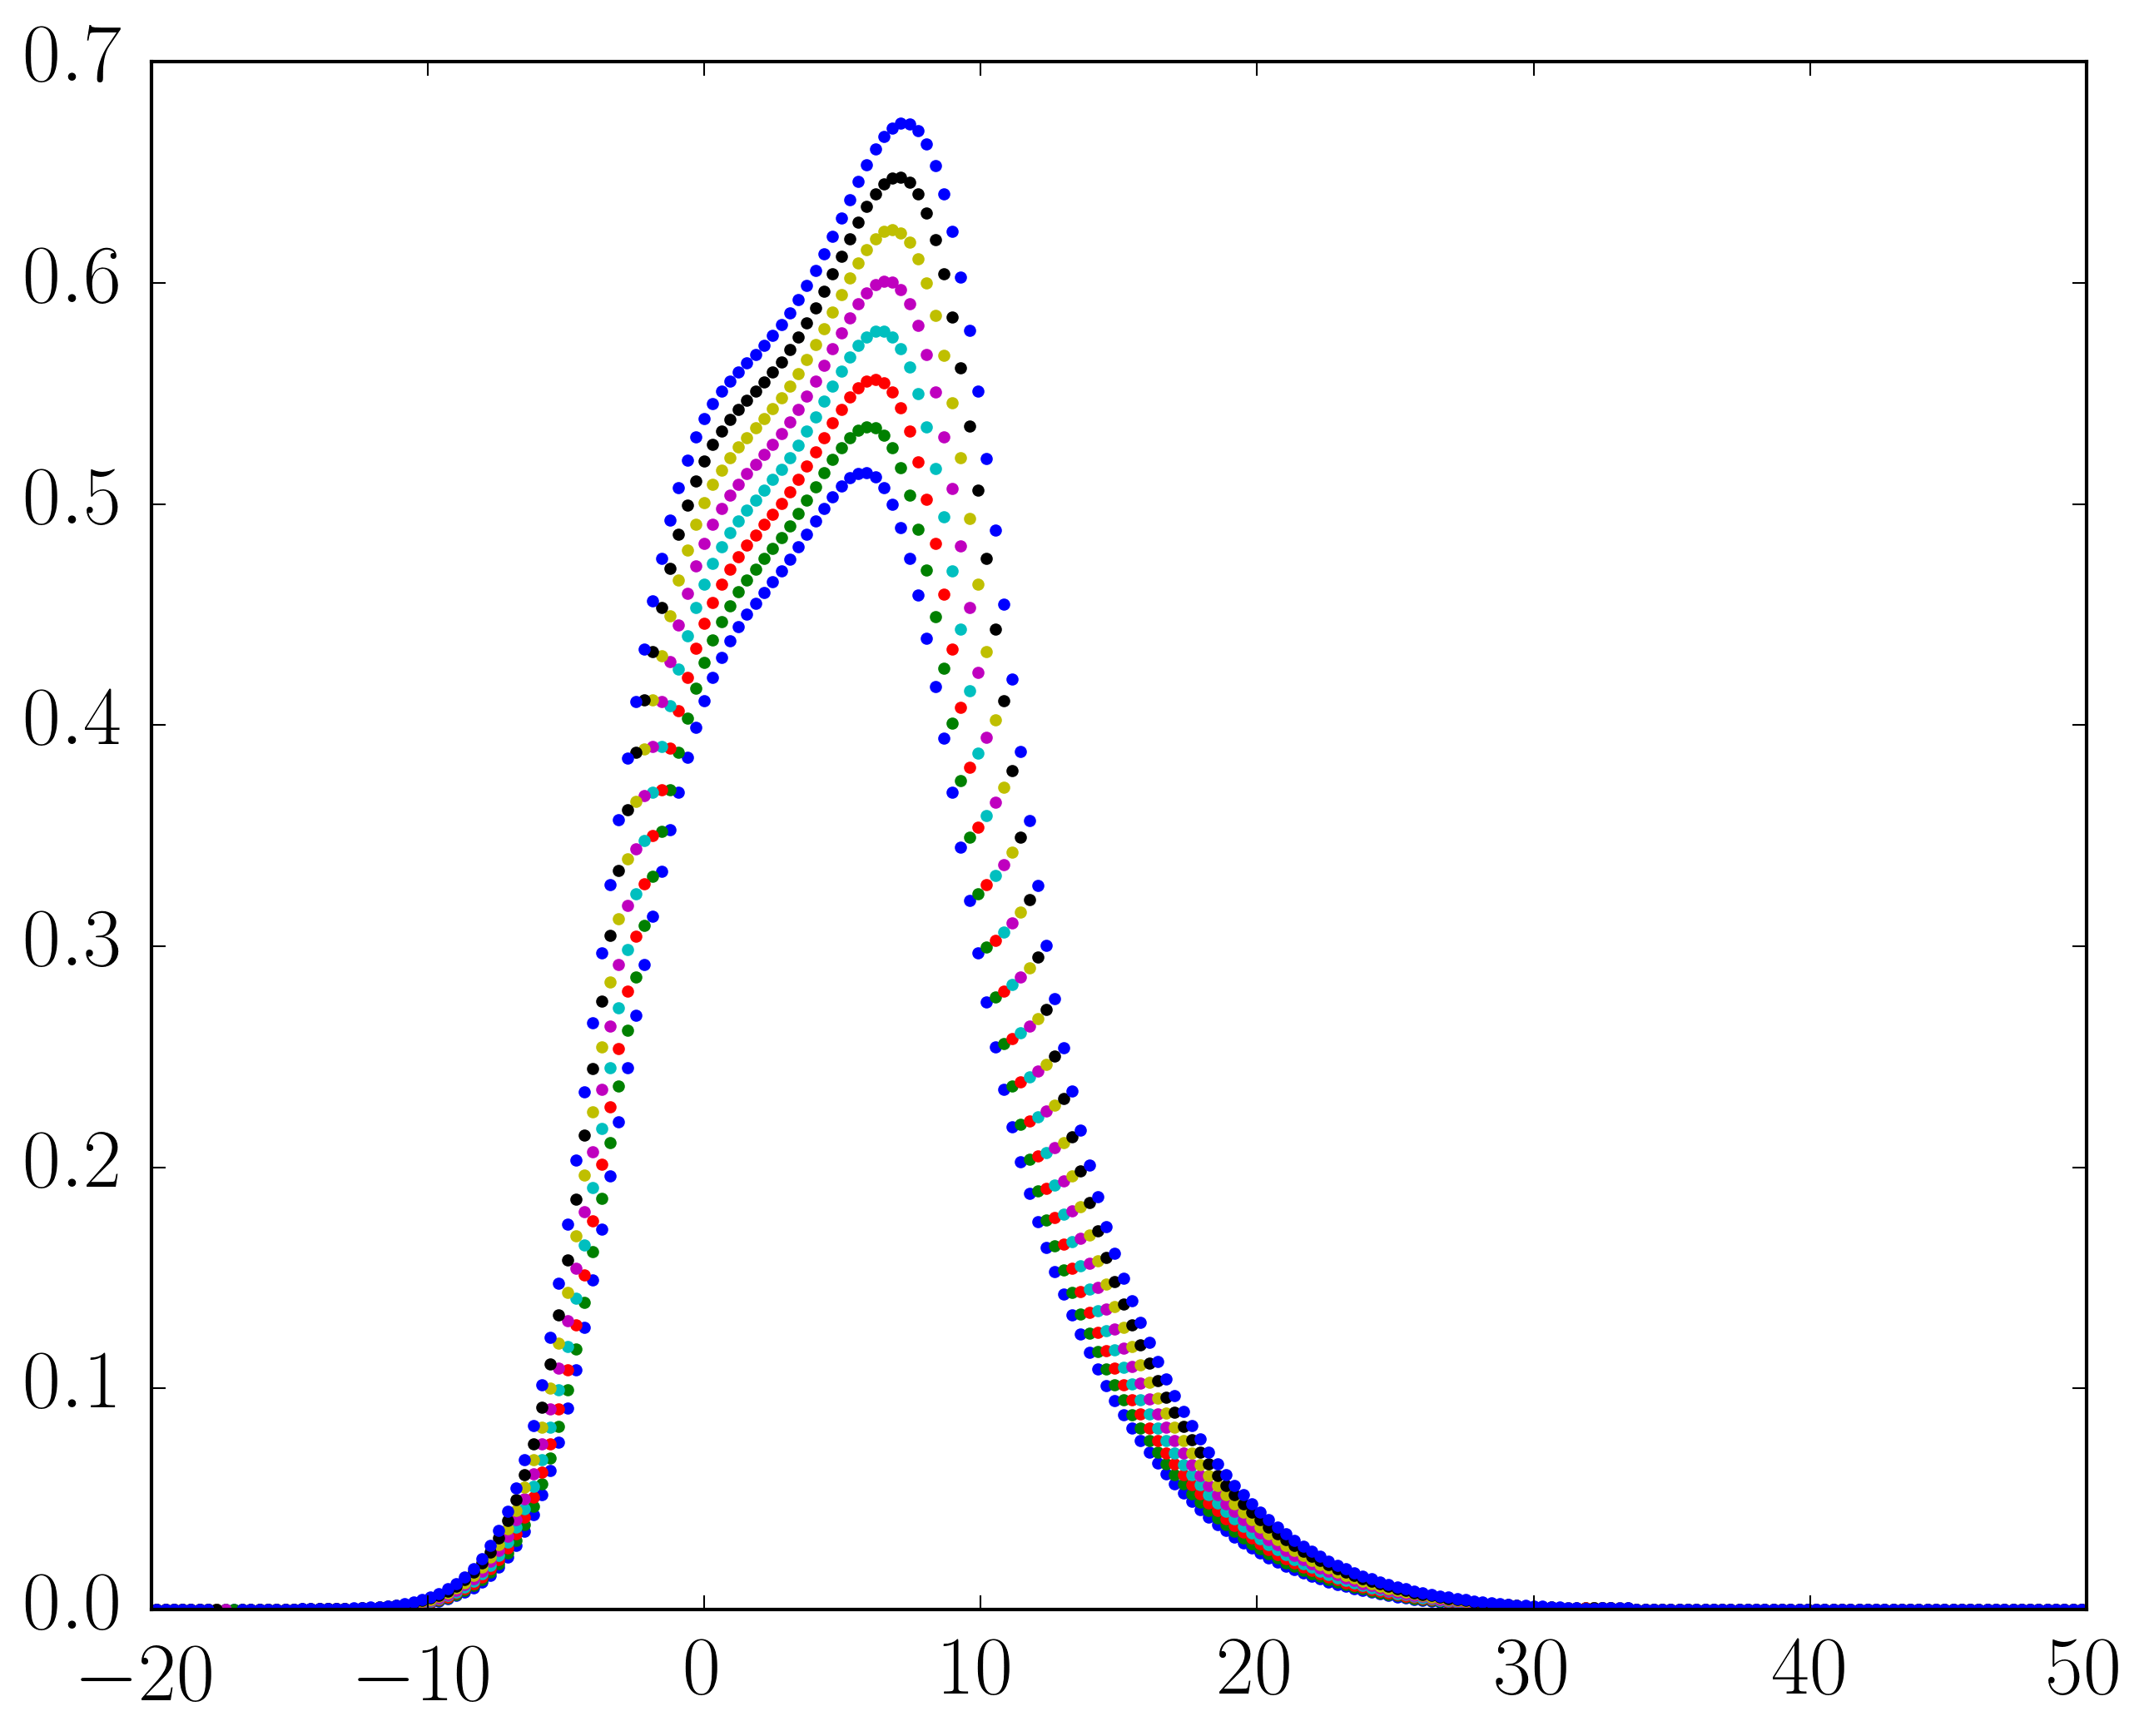

In [803]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.ylim([4.48,4.52])
#plt.xlim([-10,30])
vint=np.zeros(len(time))
for ii in range(len(time)):
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    #plt.plot(yf/dm[ii],urms[:,ii],'g'
    plt.plot(yf,Trms[:,ii],'.')
    #plt.plot(yf/dm[ii],vm[:,ii])
    print rvm[0,ii]-rvm[-1,ii]
ii = 3
print -vm[-1,ii]/vm[0,ii]
print np.sqrt(8)
plt.xlim([-20,50])
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    #vint[ii]=np.trapz(rhom[:,ii],yf)


(8,)
2.8284272005
2.82842712475


(-2, 5)

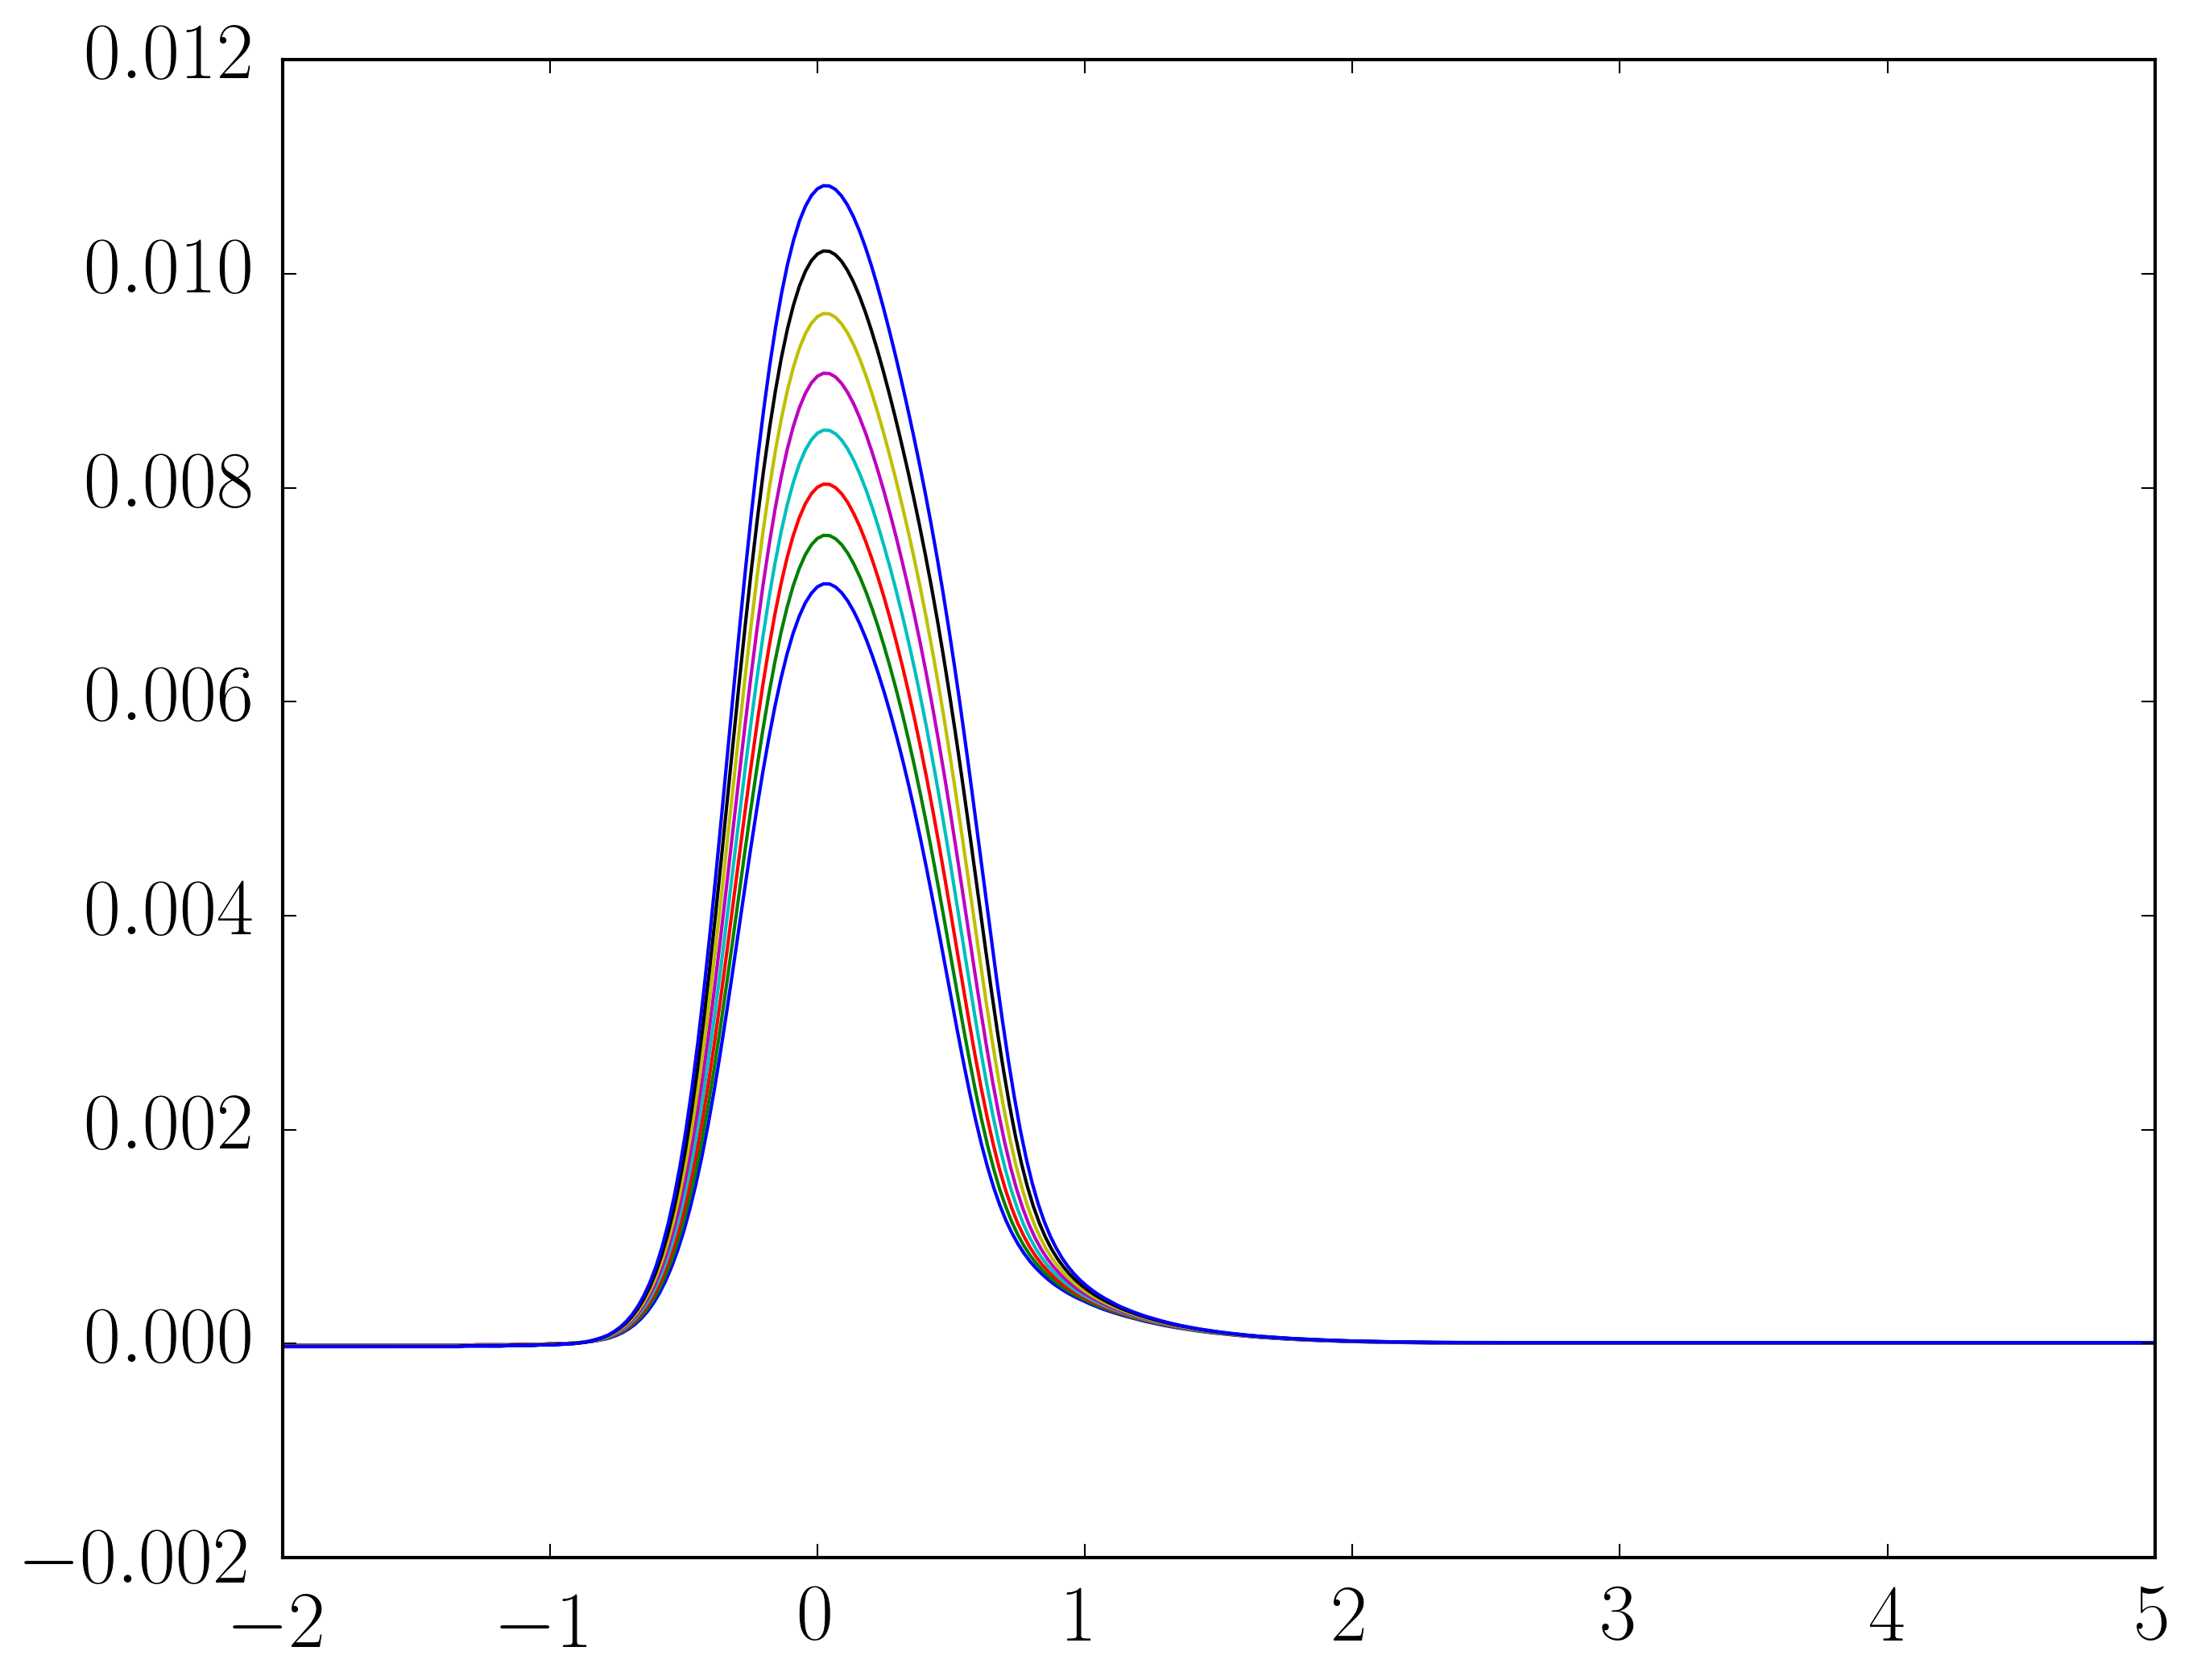

In [804]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.ylim([4.48,4.52])
#plt.xlim([-10,30])
vint=np.zeros(len(time))
for ii in range(len(time)):
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    #plt.plot(yf/dm[ii],urms[:,ii],'g'
    plt.plot(yf/dw[ii],rvm[:,ii])
    #plt.plot(yf/dm[ii],vm[:,ii])
    #print rvm[0,ii]-rvm[-1,ii]
ii = 3
print -vm[-1,ii]/vm[0,ii]
print np.sqrt(8)
plt.xlim([-2,5])
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    #vint[ii]=np.trapz(rhom[:,ii],yf)


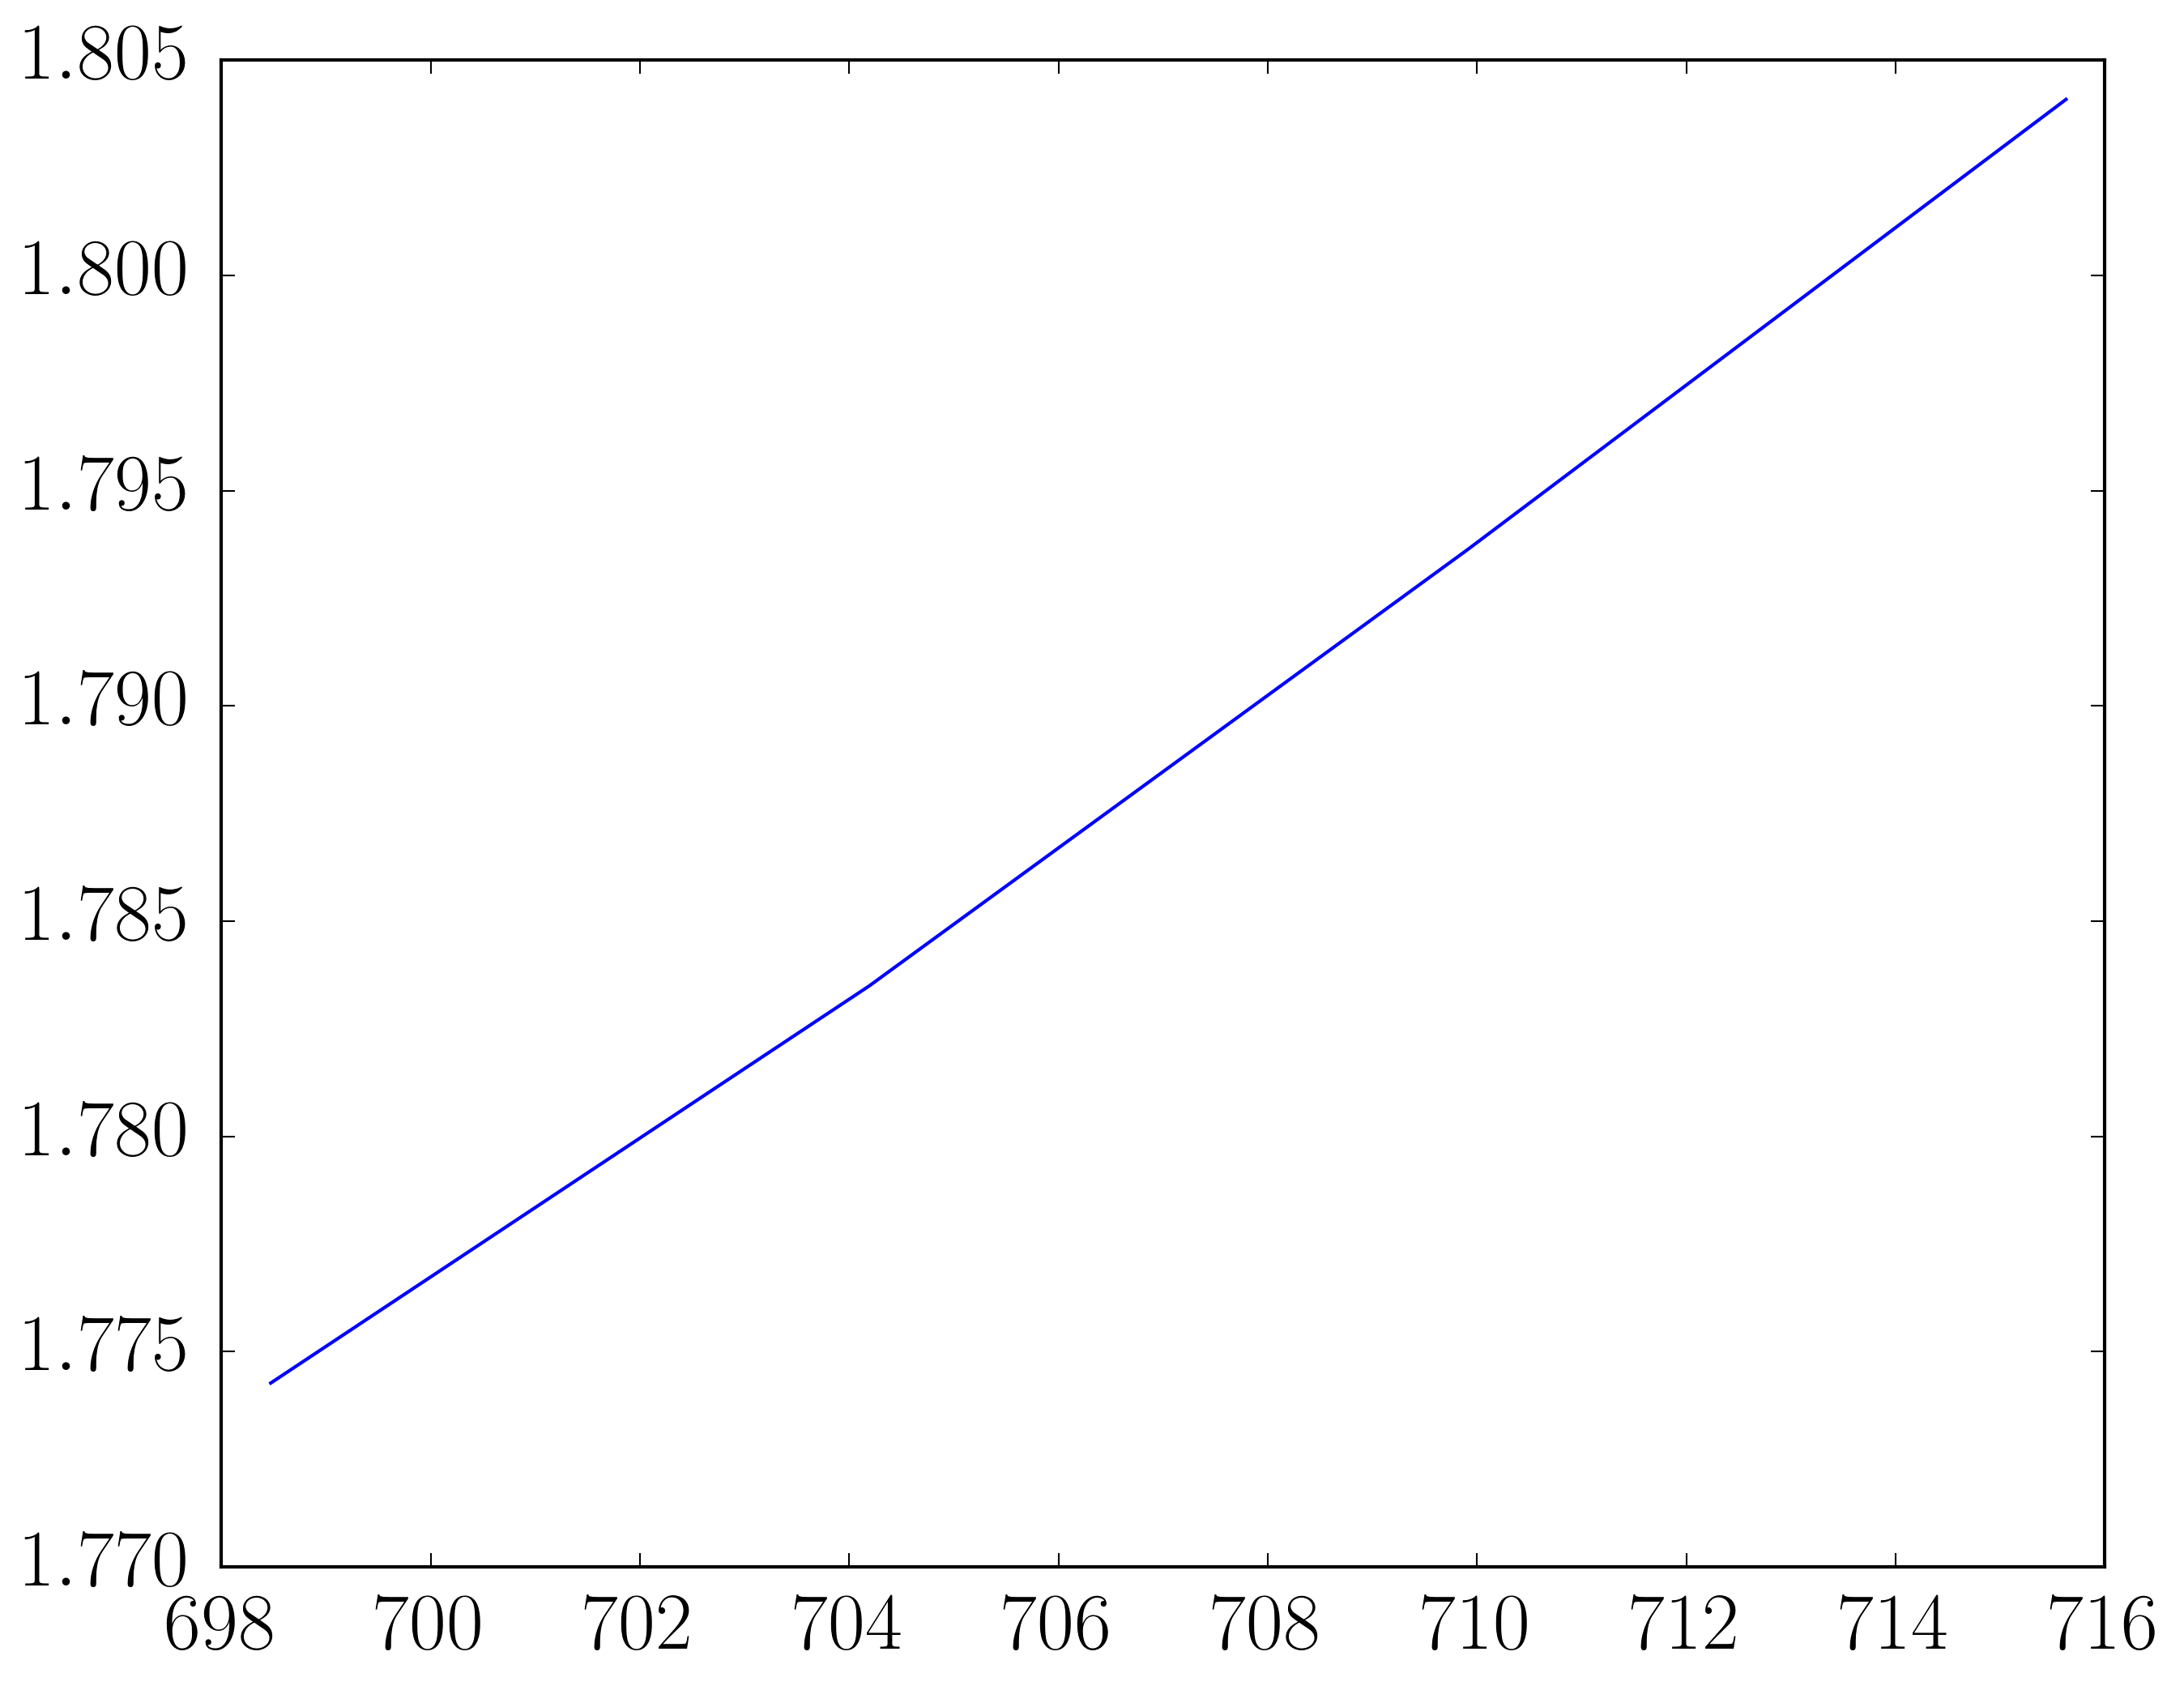

In [766]:
plt.plot(time,dm)

(17,)
106.298057556
Mass balance=


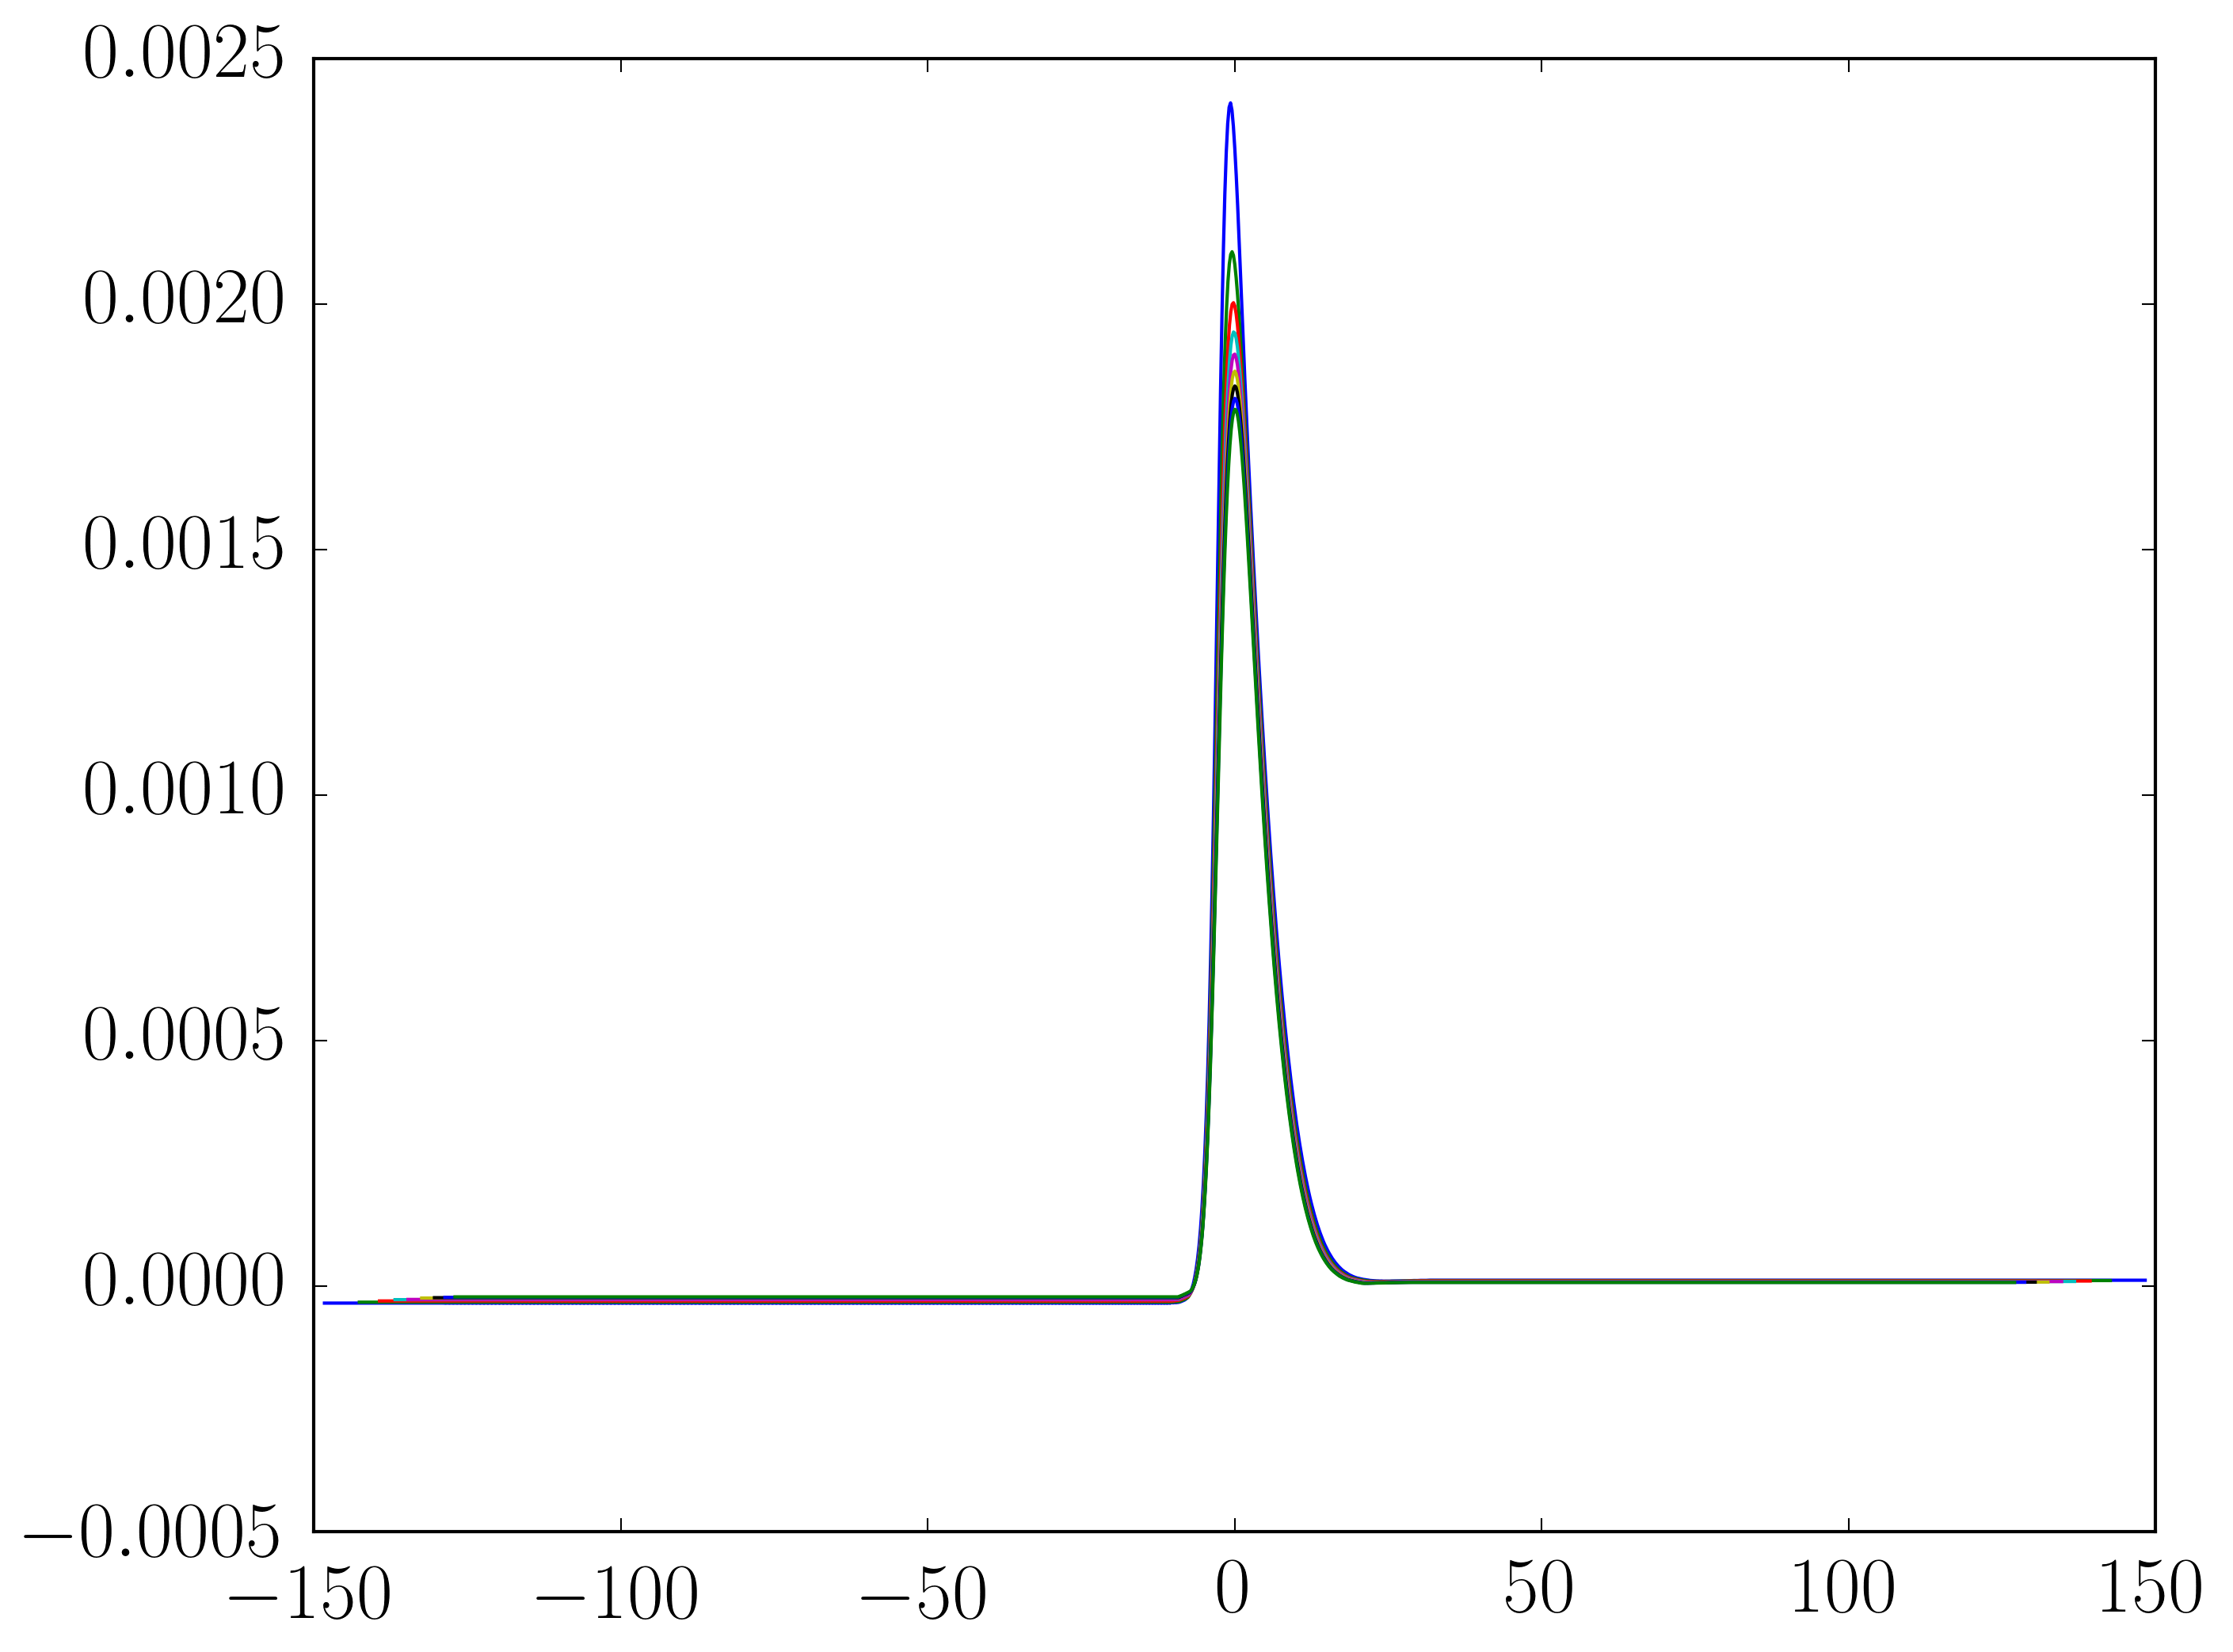

In [818]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.xlim([-5,10])
vint=np.zeros(len(time)-1)
vint2=np.zeros(len(time)-1)
drhodtA=np.zeros(len(time))
meanmass=np.zeros(len(time))
mass=np.zeros(len(time))
for ii in range(1,len(time)-1):
    vint2[ii]=0.5*((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf))/(time[ii+1]-time[ii])+(np.trapz(rhom[:,ii],yf)-np.trapz(rhom[:,ii-1],yf))/(time[ii]-time[ii-1]))
    vint[ii]=np.trapz(rhom[:,ii+1]-rhom[:,ii],yf)/(time[ii+1]-time[ii])
    meanmass[ii]=1/Ly*np.trapz(rhom[:,ii],yf)
    mass[ii]=np.trapz(rhom[:,ii],yf)
for ii in range(0,len(time),2):
    #print (time[ii]-time[ii-1])/20.0
    #plt.plot(yfa,rvma[:,ii])
    #plt.xlim([-5,10])
    plt.plot(yf/dm[ii],rvm[:,ii])
    #drhodtA[ii]=-np.trapz(compact.deryr(rvm[:,ii],dt12,prem1,fmap,my),y)
    
    #print "time=%s, phi=%s" %( timea[ii], rvma[0,ii]-rvma[-1,ii])
    #print "dm=%s"%(dma[ii])
print time[len(time)-1]
print "Mass balance=" 
#drhodt = np.diff(vint)/np.diff(time)
drhodt = vint2
massbalance=vint+(rvm[-1,1:]-rvm[0,1:])
massratio=np.abs((vint+(rvm[-1,1:]-rvm[0,1:]))/Ly/meanmass[1:])*100
#print massbalance
#print massratio
#plt.plot(yf[1:]/dm[-1],np.diff(yf)*0.001)

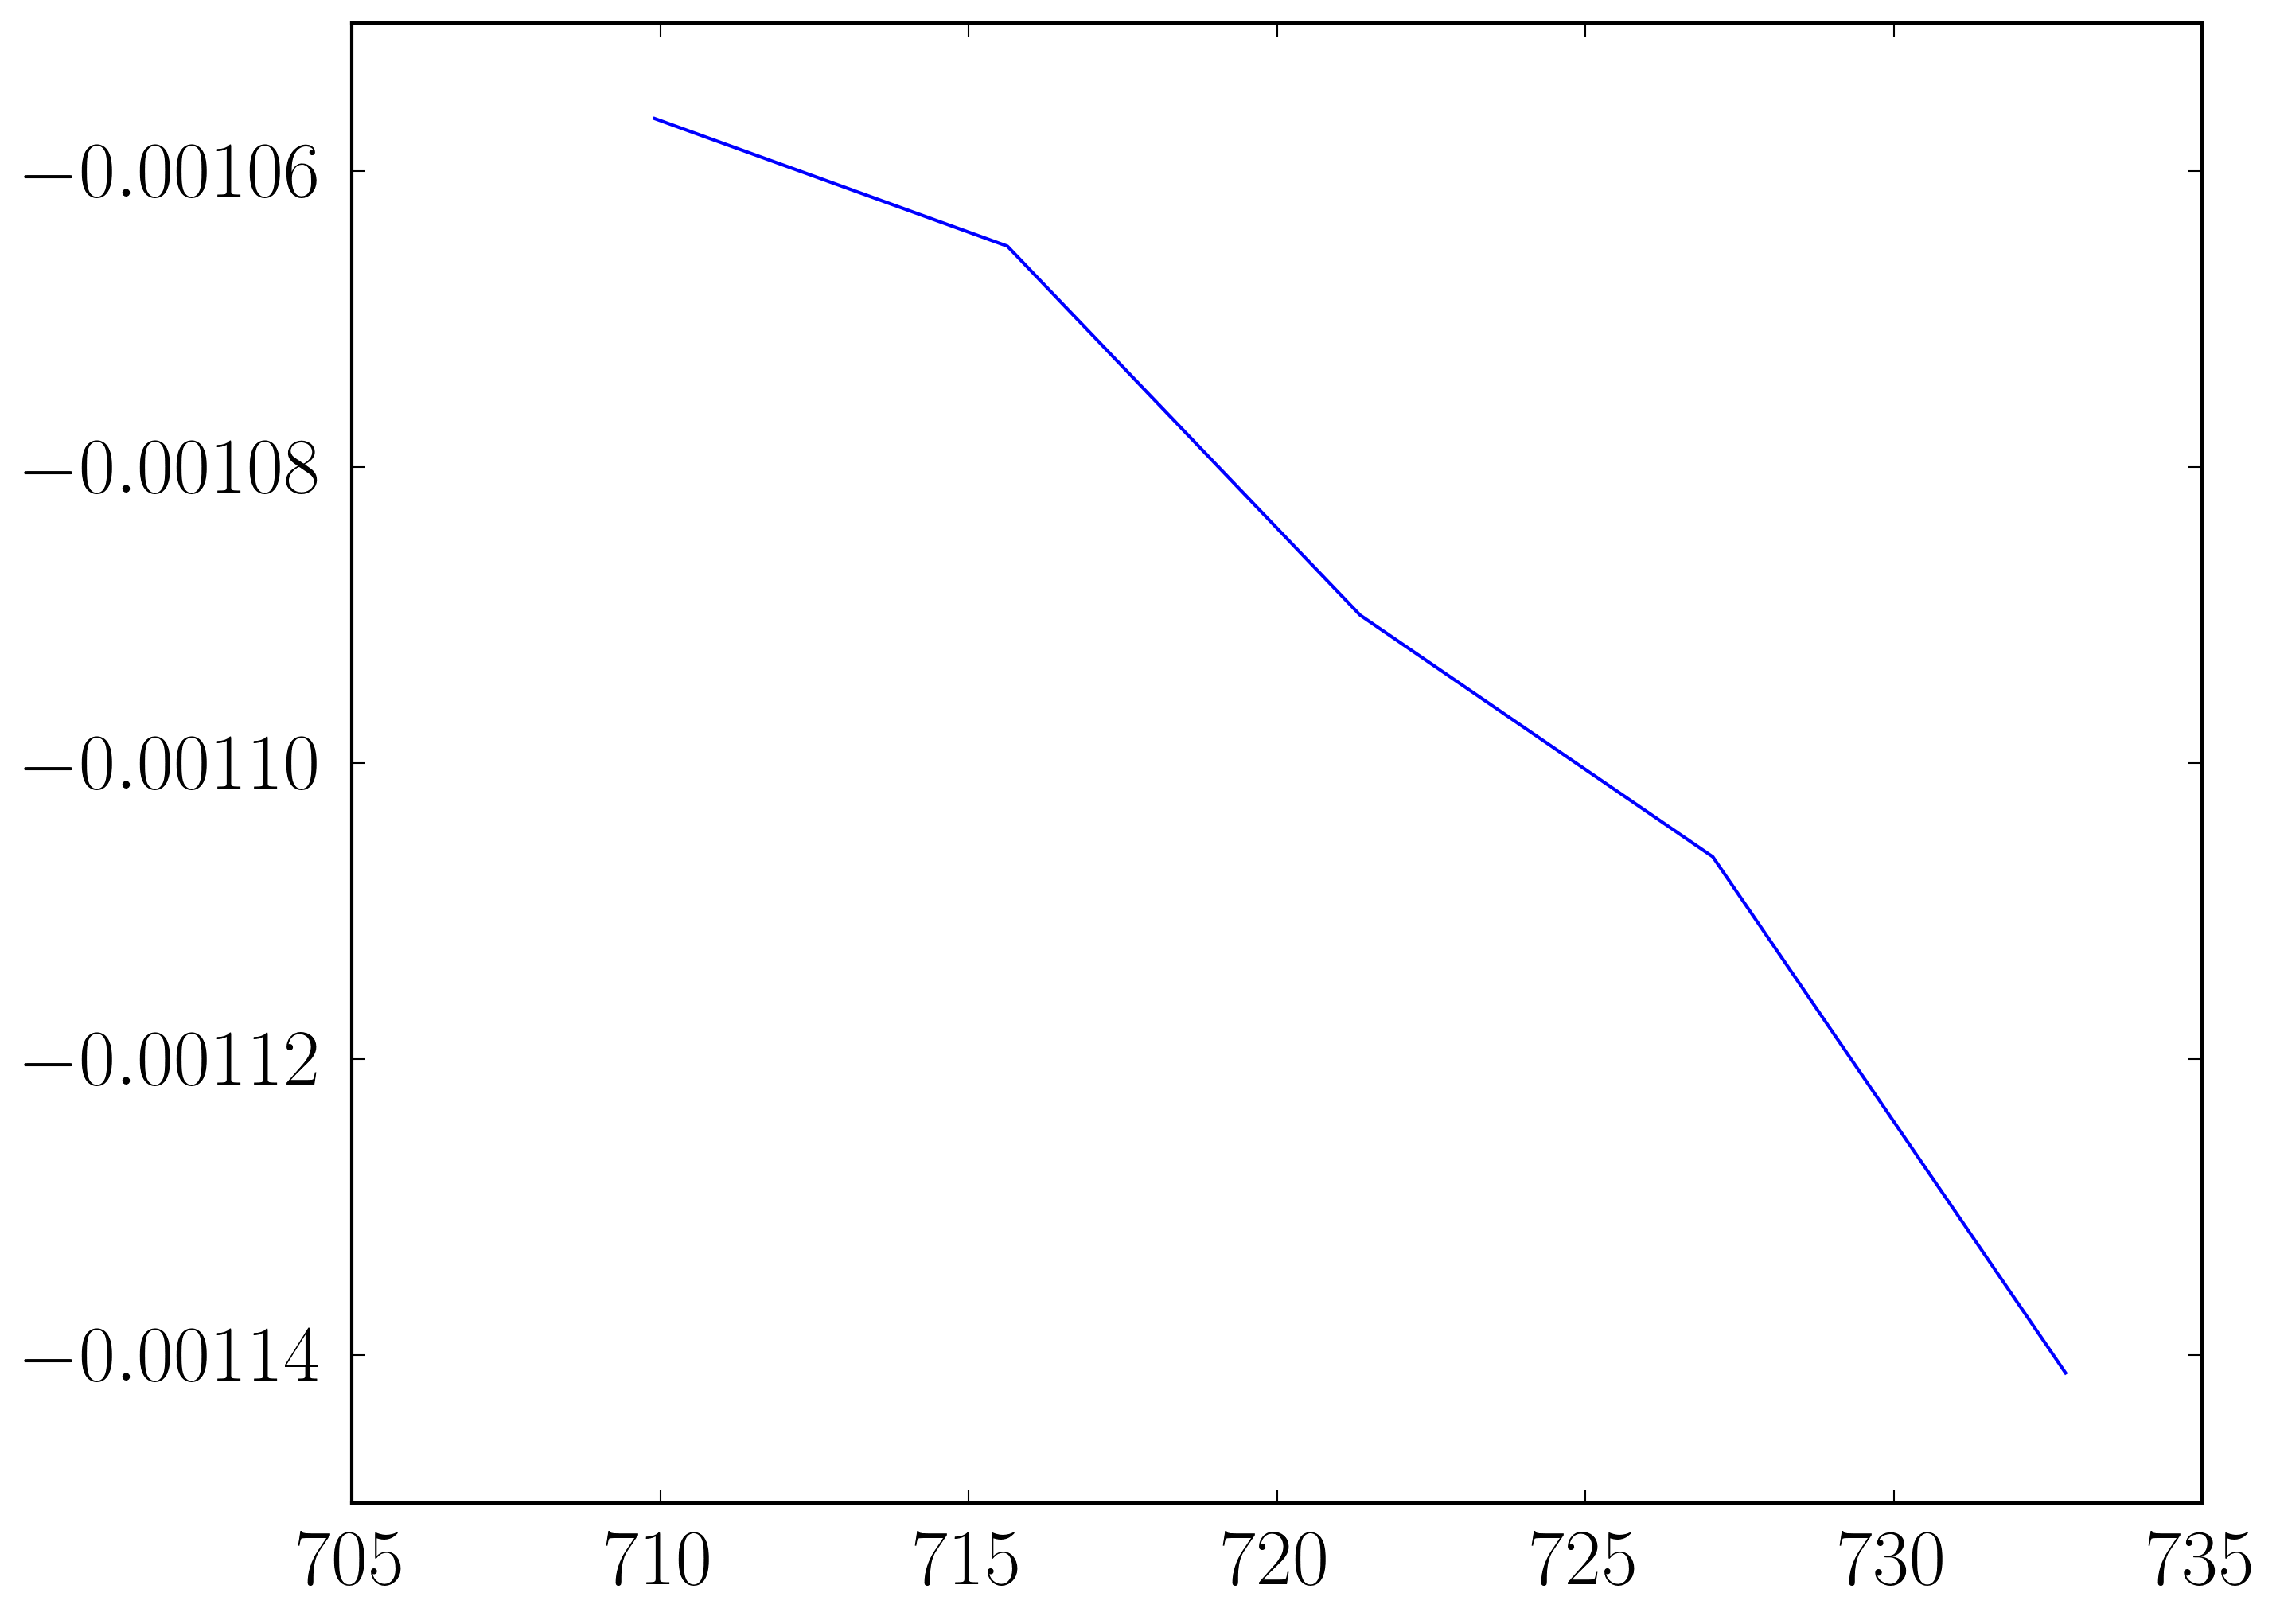

In [807]:
plt.plot(time[2:-1],np.diff(mass[1:-1]))
#plt.plot(time,der1(time,dm),'g')
#print mass

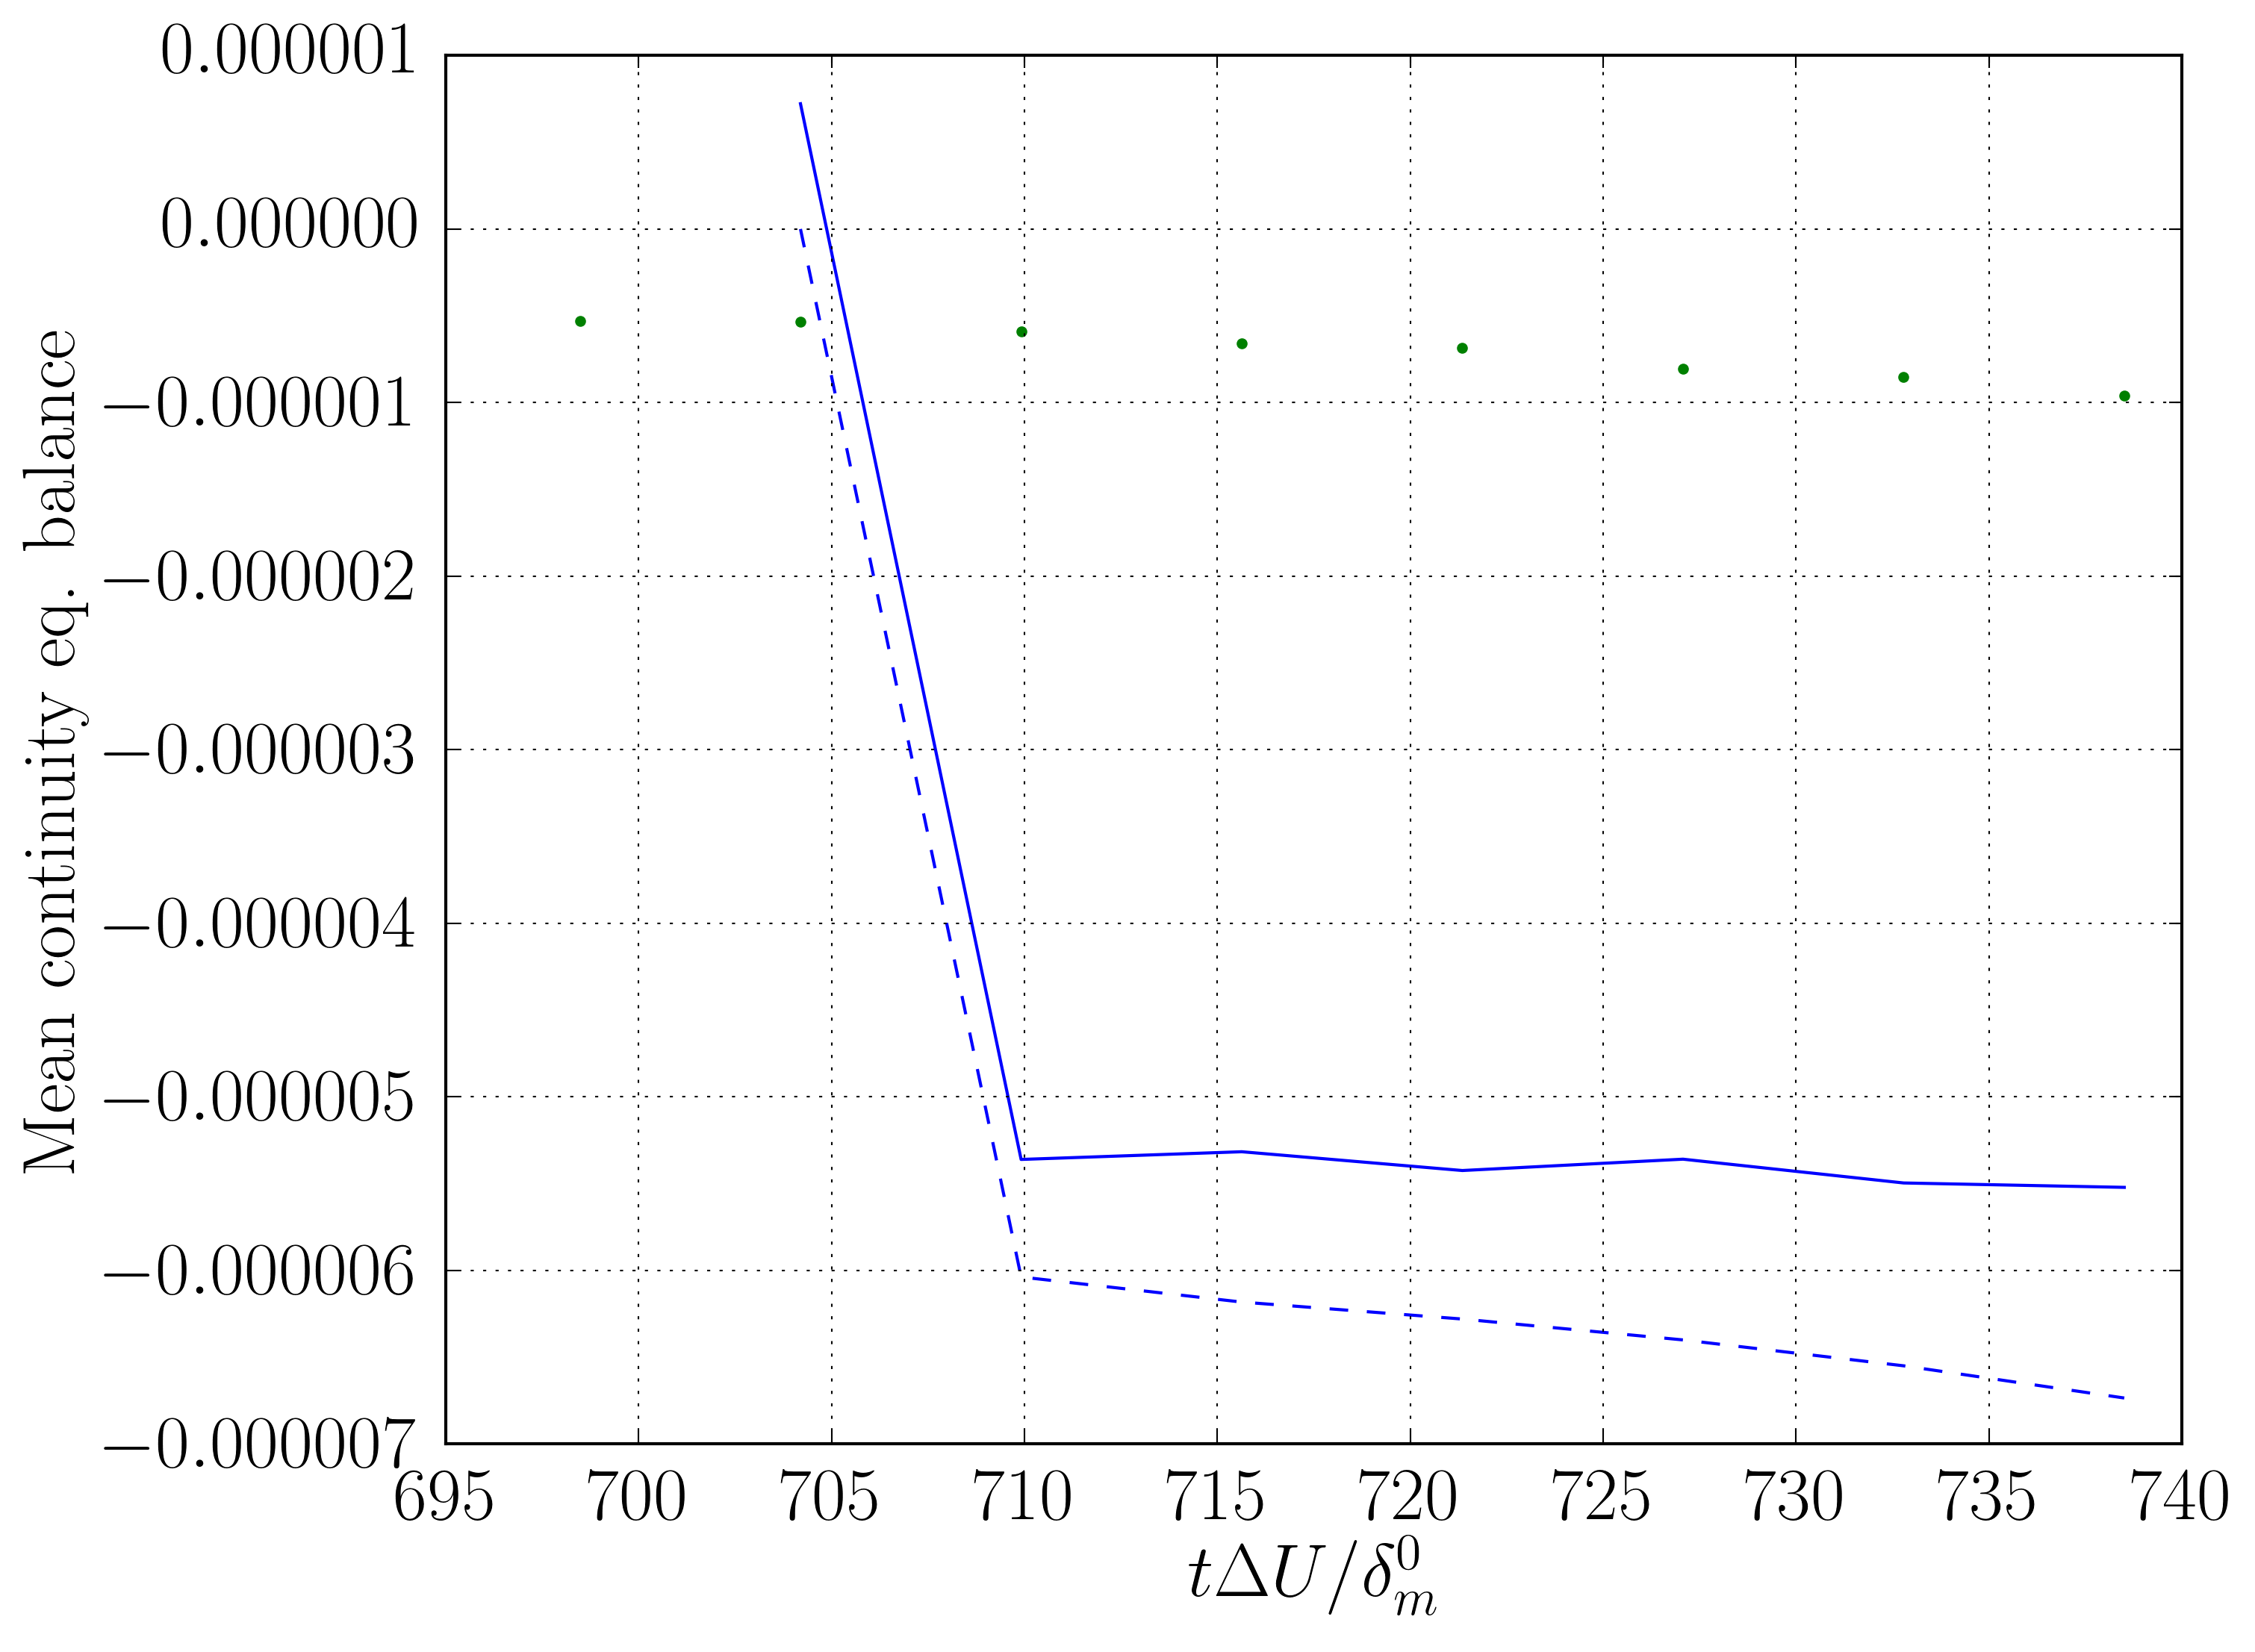

In [808]:
plt.plot(time[1:],massbalance/Ly)
#plt.plot(time[:-1],massratio,'k--')
plt.plot(time[1:],drhodt/Ly,'b--')
#plt.plot(time[1:],(np.diff(time)/201)**2*0.03,'k')
#plt.plot(time[:-1],vint2,'y--')
plt.grid('on')
#plt.ylim([-0.001,0.001])
#plt.plot(time[:-1],rvm[0,:-1]-rvm[-1,:-1],'r--')
plt.plot(time,rvm[0,:]/Ly,'g.')
plt.xlabel(r'$t \Delta U/\delta_m^0$')
plt.ylabel(r'Mean continuity eq. balance')

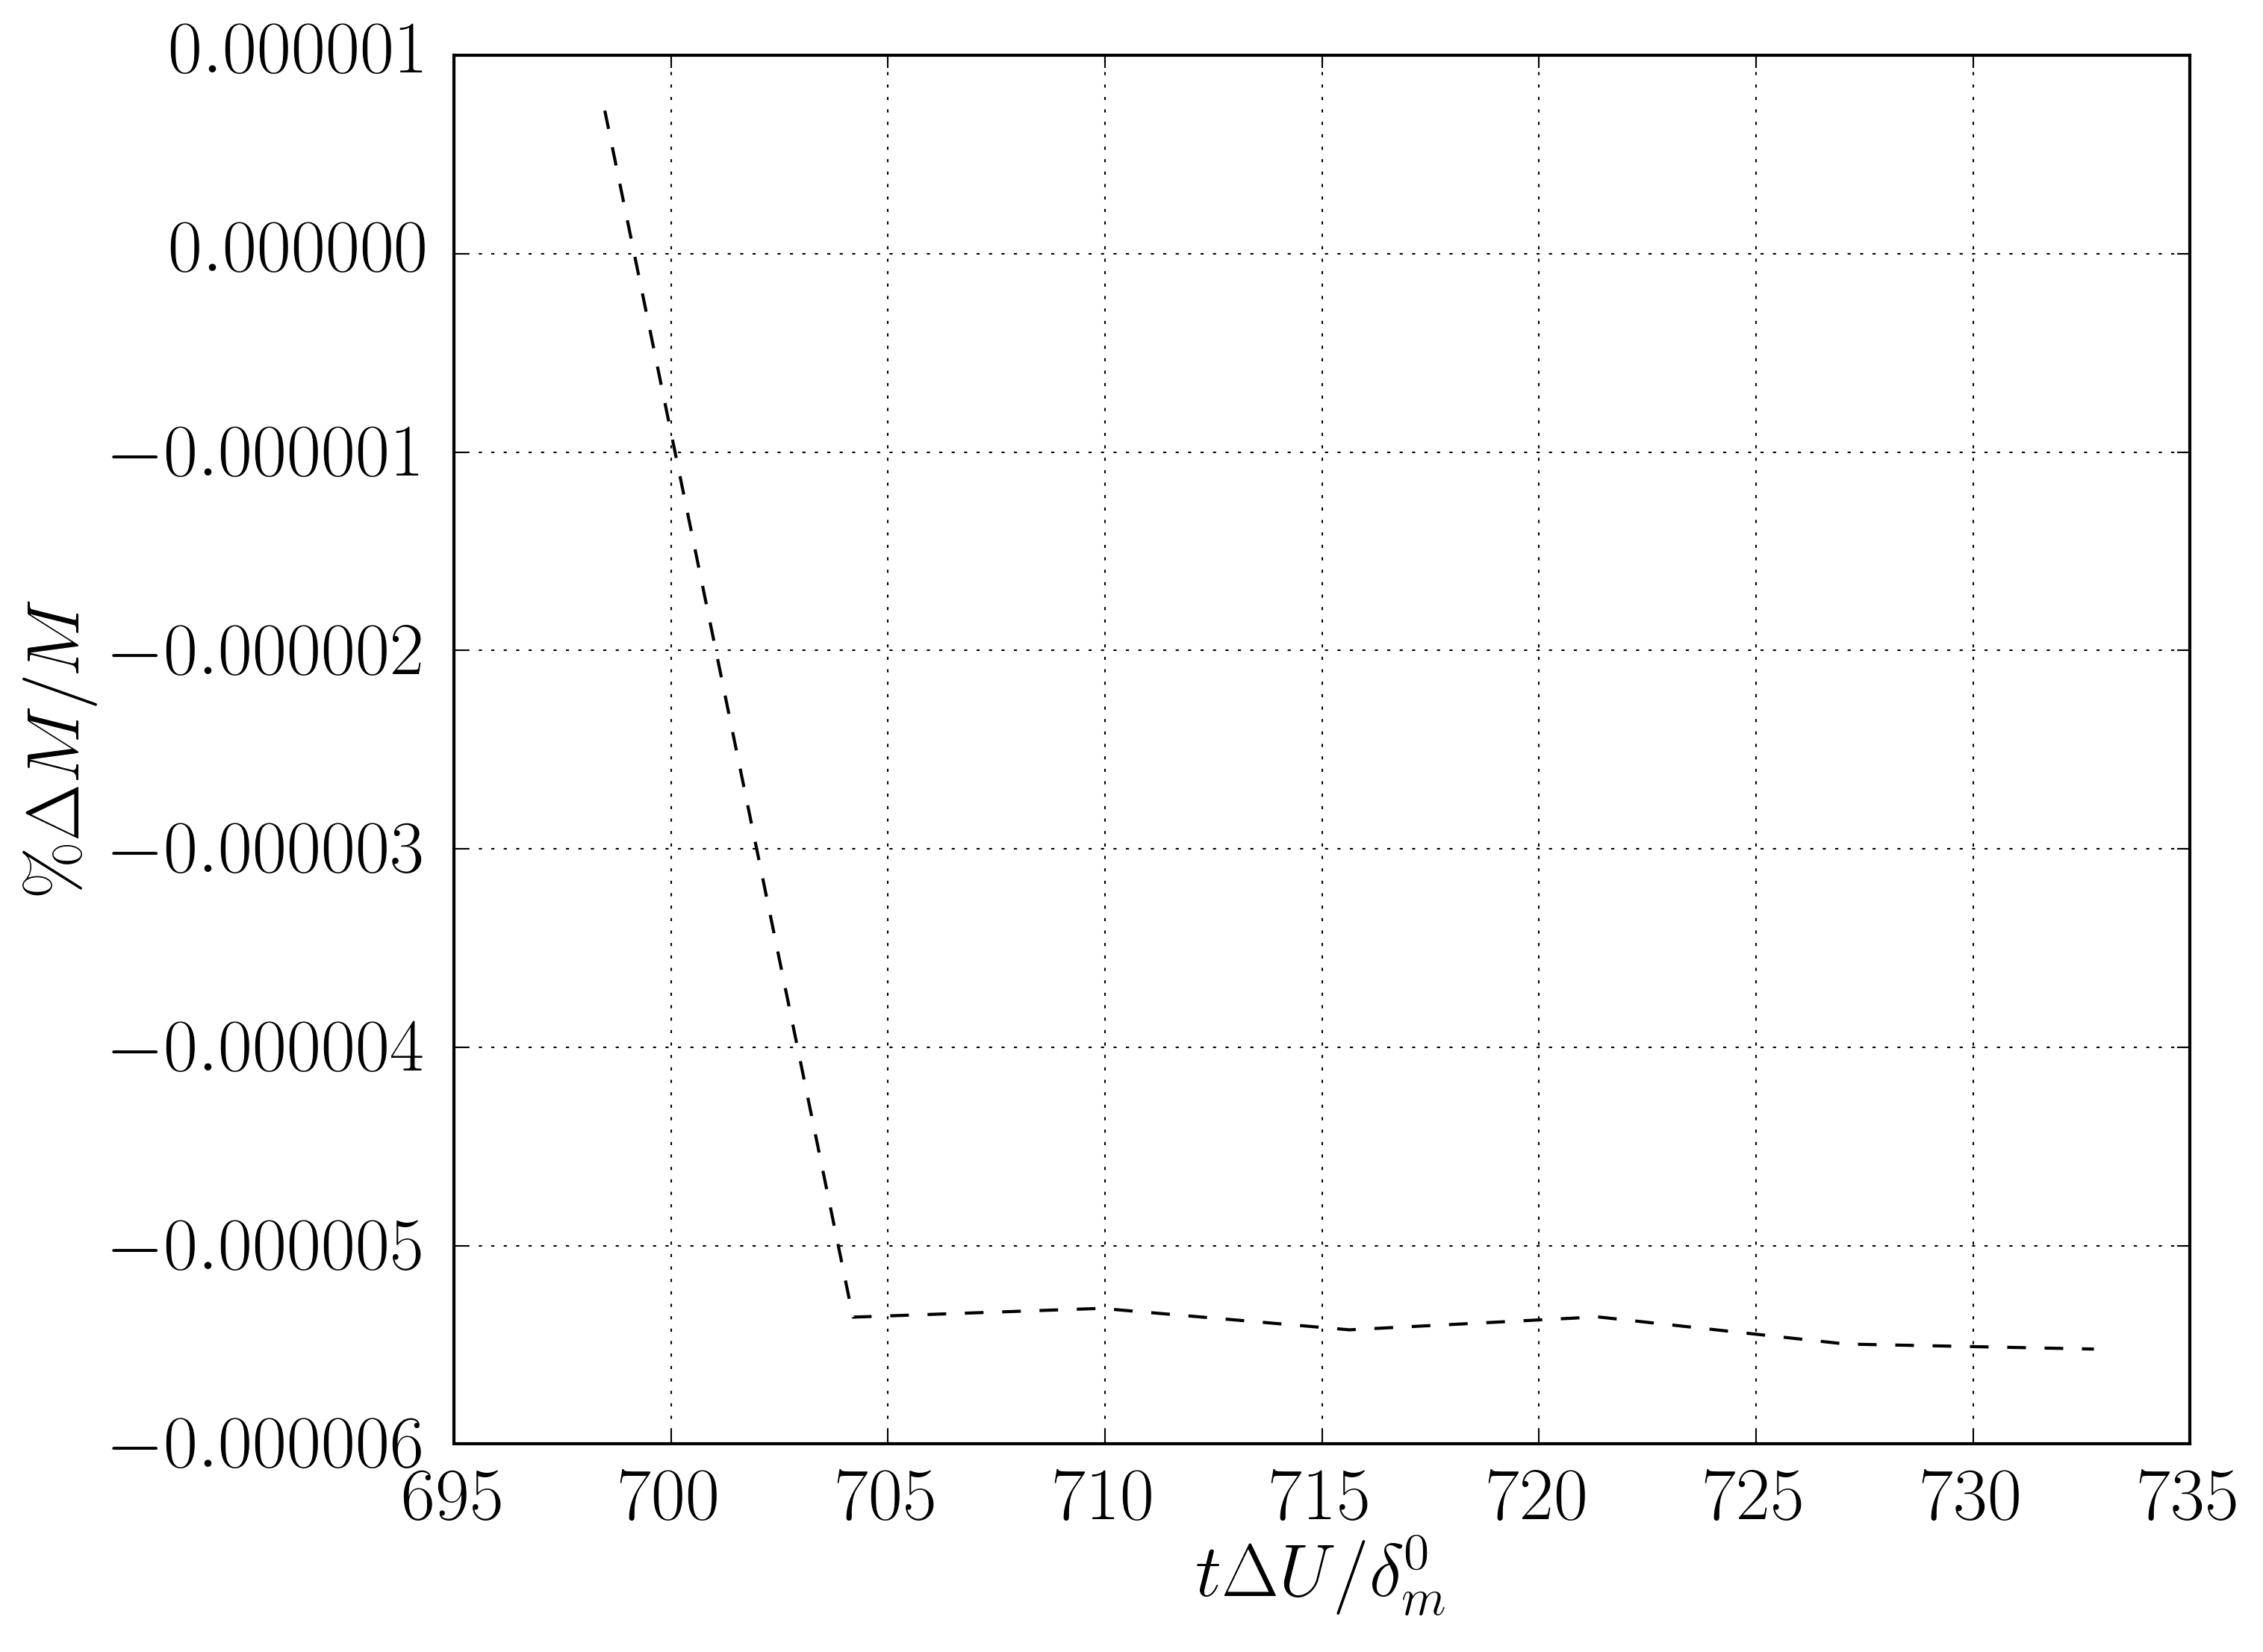

In [809]:
#plt.plot(time[:-1],massbalance)
plt.plot(time[:-1],massbalance/Ly,'k--')
#plt.plot(time[:-1],drhodt,'b--')
#plt.plot(time[:-1],vint2,'y--')
plt.grid('on')
#plt.ylim([-0.001,0.001])
#plt.plot(time[:-1],rvm[0,:-1]-rvm[-1,:-1],'r--')
#plt.plot(time[:-1],rvm[-1,:-1],'g.')
plt.xlabel(r'$t \Delta U/\delta_m^0$')
plt.ylabel(r'$\%\Delta M/M$')

## Box y2

/share/drive/toni/Re460s20/boxy2/h5.stats k--
/share/drive/toni/Re460s20/boxy2/CFL02/h5.stats b
/share/drive/toni/Re460s20/boxy2/CFL01/h5.stats g


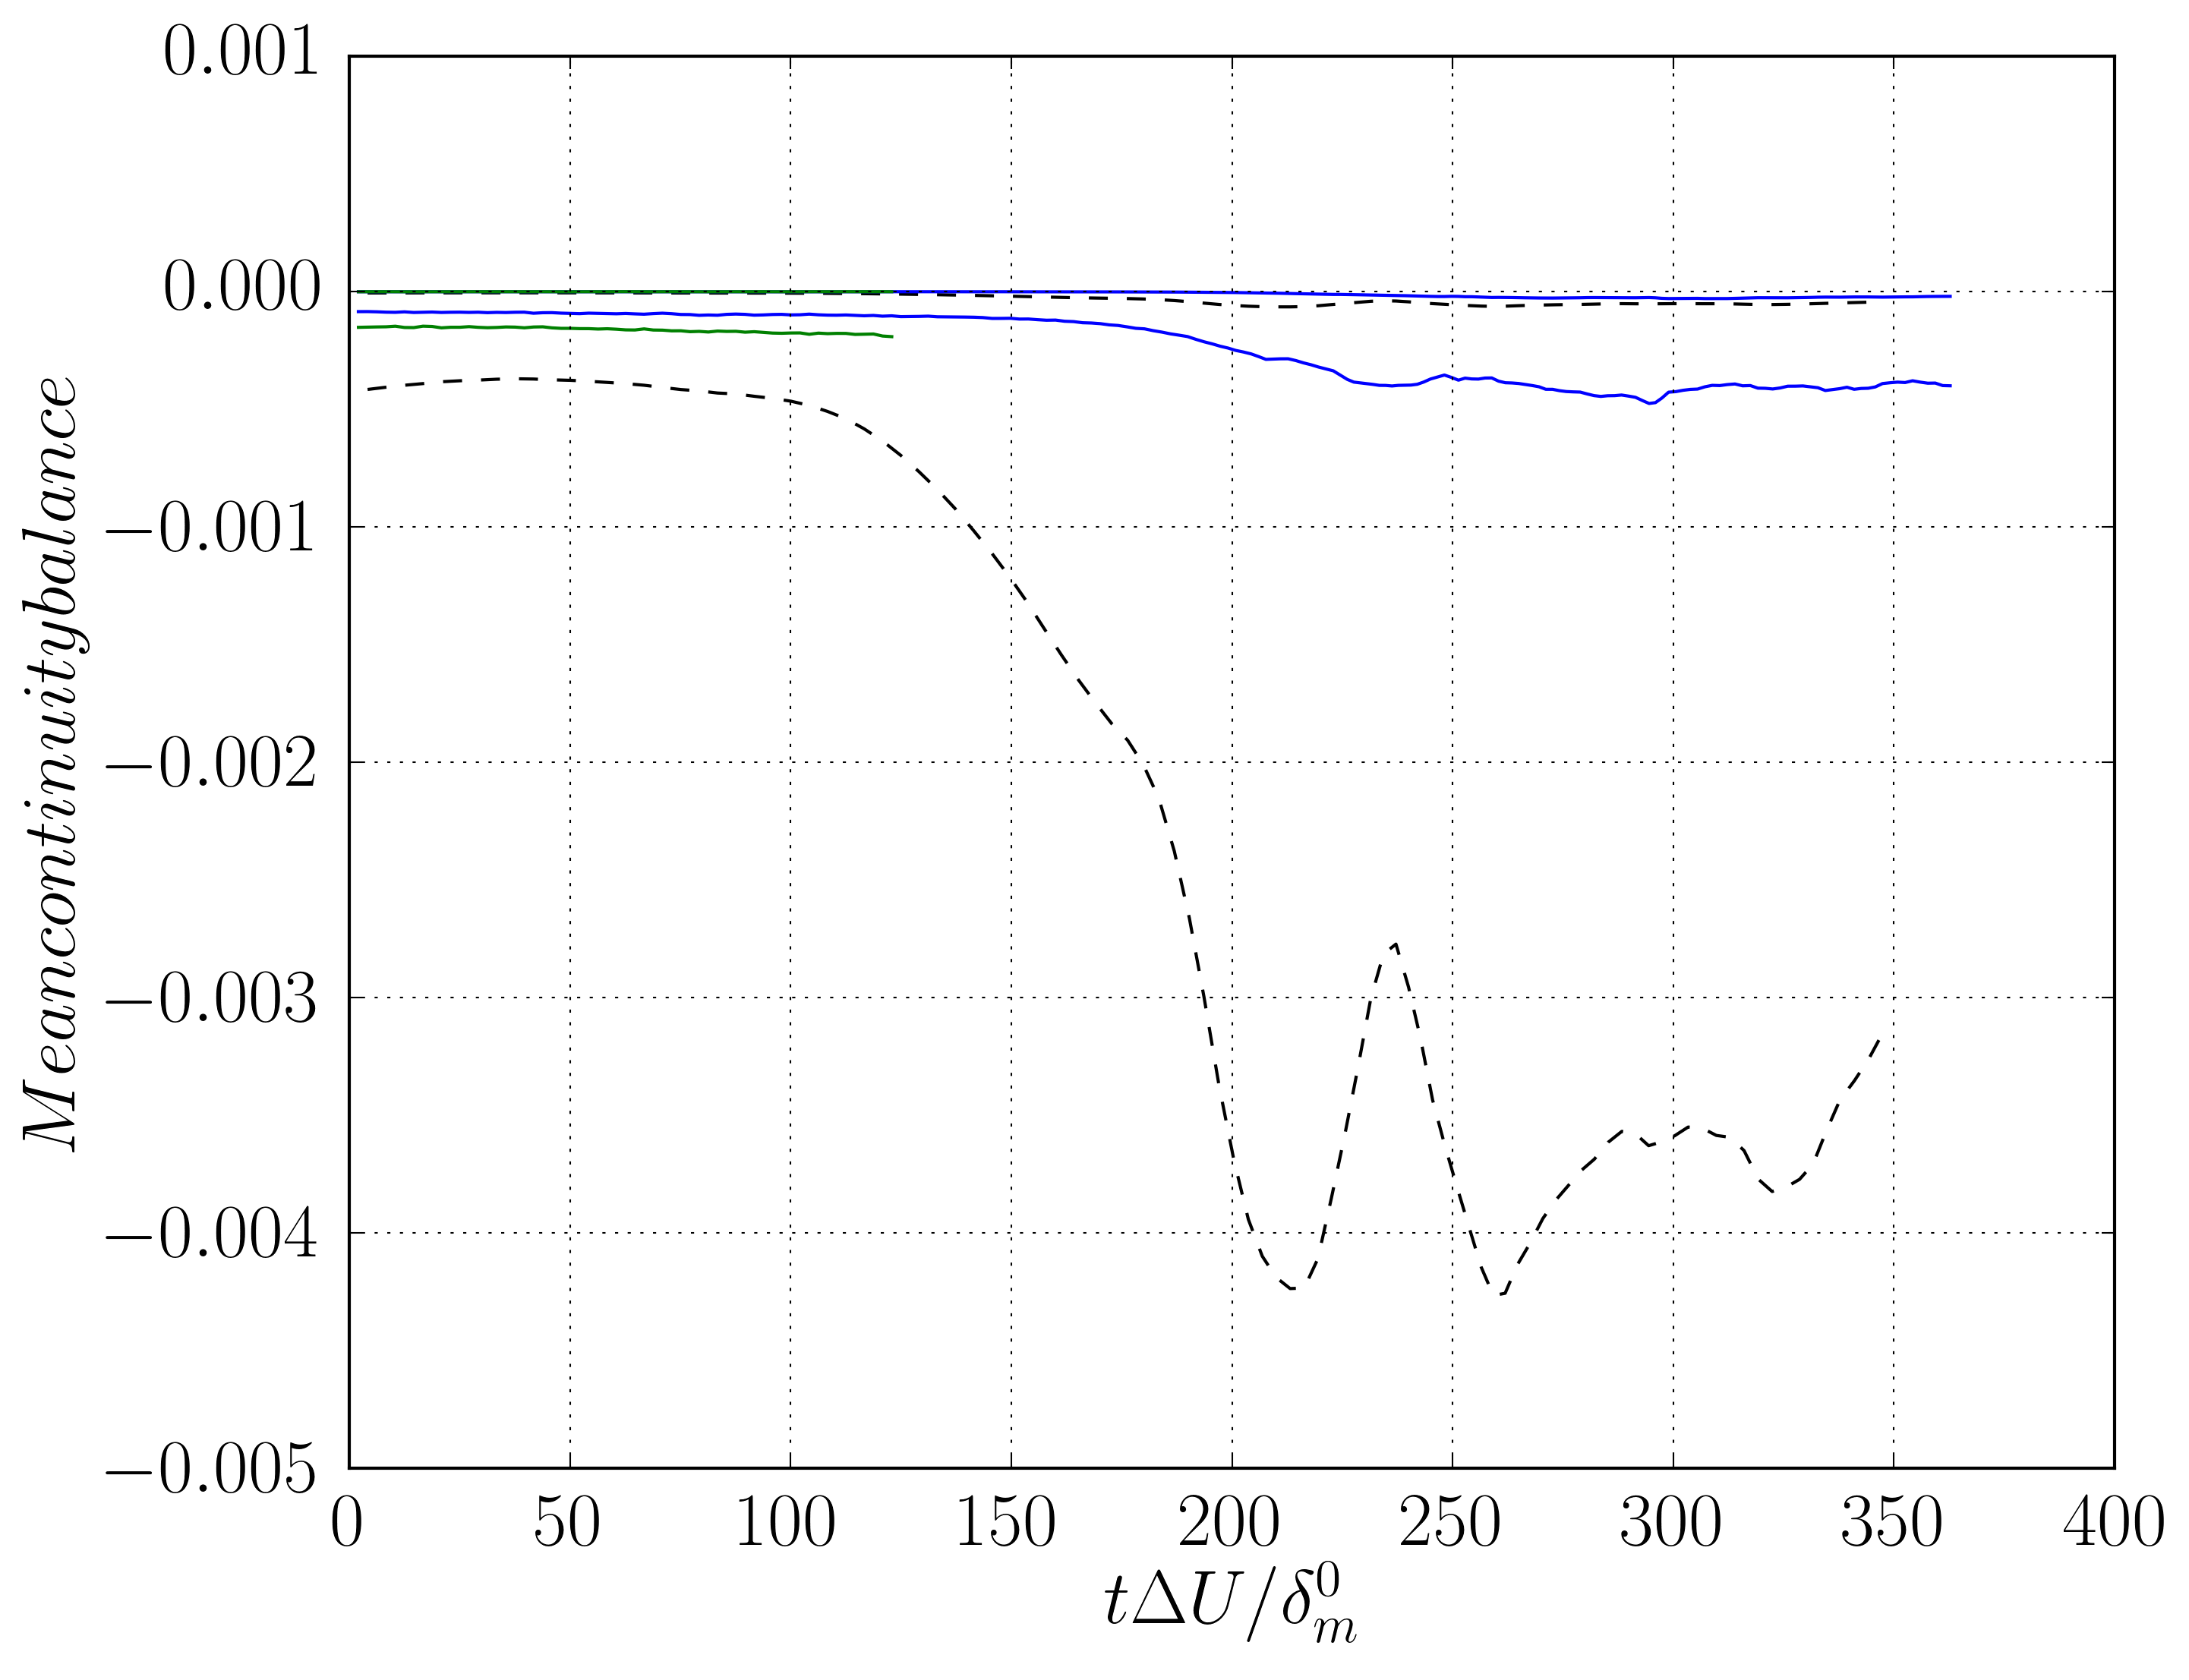

In [53]:
l_color=['k--','b','g','r']
ncases=len(l_path_cases)
for i in range(ncases):
    path = l_path_cases[i];
    print path,l_color[i]
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        dm= np.array(f['dm'])
        yf = np.array(f['y'])
        rvm = np.array(f['rvm'])
        vm = np.array(f['vm'])
        R12 = np.array(f['R12'])
        rhom= np.array(f['rhom'])
        um = np.array(f['um'])
        rum= np.array(f['rum'])
        Tm = np.array(f['Tm'])
        Trms = np.array(f['Trms'])
        R11 = np.array(f['R11'])
        R22 = np.array(f['R22'])
        R12 = np.array(f['R12'])
        R33 = np.array(f['R33'])
        urms = np.array(f['urms'])
        dmpoint = np.array(f['dmpoint'])
        EPS=np.array(f['EPS'])
        w3m = np.array(f['w3m'])
        w3rms = np.array(f['w3rms'])
        w2m = np.array(f['w2m'])
        w1m = np.array(f['w1m'])
        uv = np.array(f['uv'])
        TT = np.array(f['TT'])
        w1rms = np.array(f['w1rms'])
        
        
    vint=np.zeros(len(time)-1)
    vint2=np.zeros(len(time)-1)
    drhodtA=np.zeros(len(time))
    meanmass=np.zeros(len(time))
    for ii in range(0,len(time)-1):
        vint2[ii]=dm[ii]*(np.trapz(rhom[:,ii+1],yf/dm[ii+1])-np.trapz(rhom[:,ii],yf/dm[ii])/(time[ii+1]-time[ii]))
        vint[ii]=np.trapz(rhom[:,ii+1]-rhom[:,ii],yf)/(time[ii+1]-time[ii])
        meanmass[ii]=1/Ly*np.trapz(rhom[:,ii],yf)

    drhodt = vint
    massbalance=vint+(rvm[-1,1:]-rvm[0,1:])
    massratio=np.abs((vint+(rvm[-1,1:]-rvm[0,1:]))/Ly/meanmass[1:])*100   
    #plt.plot(time[:-1],massbalance/(yf[-1]-yf[0]),l_color[i])
    plt.plot(time[:-1],vint,l_color[i])
    plt.plot(time[:-1],-(rvm[-1,1:]-rvm[0,1:]),l_color[i])
    #plt.plot(time[:-1],vint2,l_color[i])
    plt.grid('on')
    plt.xlabel(r'$t \Delta U/\delta_m^0$')
    plt.ylabel(r'$\%\Delta M/M$')
    plt.ylabel(r'$Mean continuity balance $')
        

In [1023]:
np.trapz?

In [1089]:
path = '/share/drive/toni/Re460s20/boxy2/h5.stats' #Running with CFL=0.1 from beginning, 
#40 accum for stats every 200 steps, and BC por psi = d(psi)/dy=0 instead of Lapvdvhom
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w1m'])
    uv = np.array(f['uv'])
    TT = np.array(f['TT'])
    w1rms = np.array(f['w1rms'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

In [1132]:
path = '/share/drive/toni/Re460s20/boxy2/CFL01/h5.stats'
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w1m'])
    uv = np.array(f['uv'])
    TT = np.array(f['TT'])
    w1rms = np.array(f['w1rms'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

In [1195]:
path = '/share/drive/toni/Re460s20/boxy2/CFL02/h5.stats'
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    etamin=np.array(f['etamin'])
    Relmax=np.array(f['Relambda'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w1m'])
    uv = np.array(f['uv'])
    TT = np.array(f['TT'])
    w1rms = np.array(f['w1rms'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

0.0777709651456


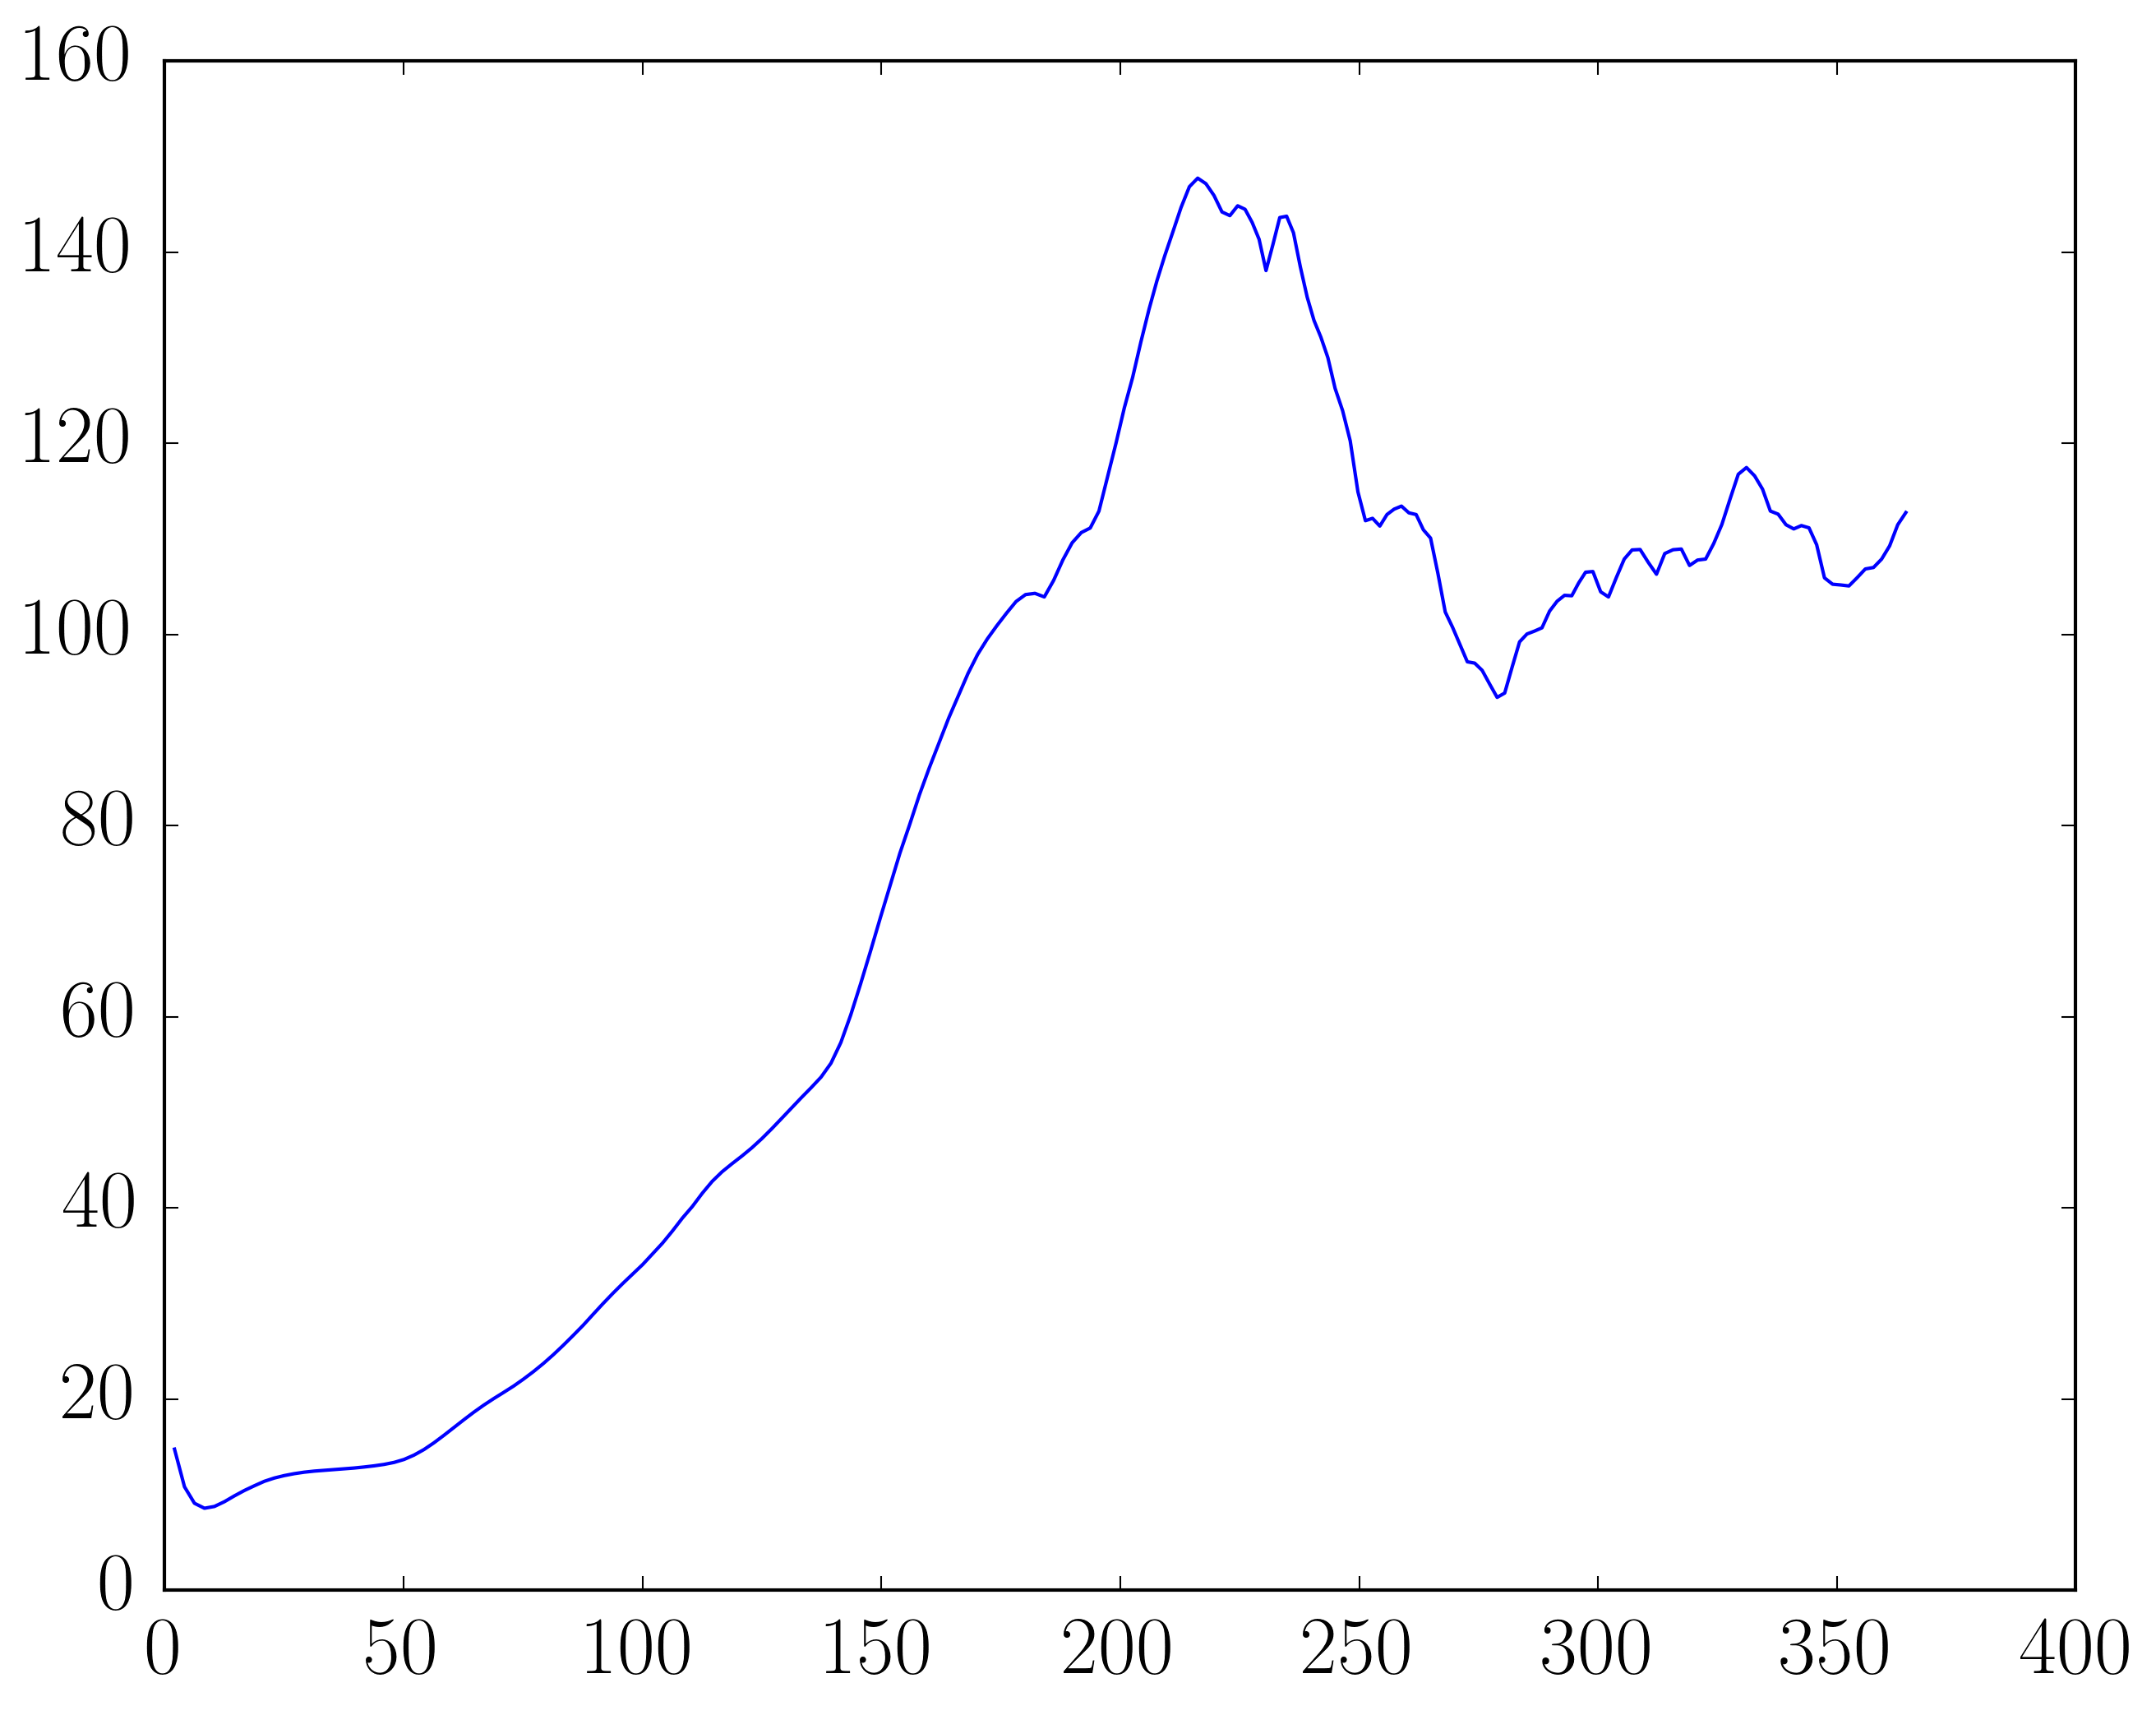

In [1196]:
plt.plot(time,Relmax);print diff(yf).min()

(200,)
2.04799747467
106.277351379
206.024078369
283.57901001
Mass balance=


(-10, 10)

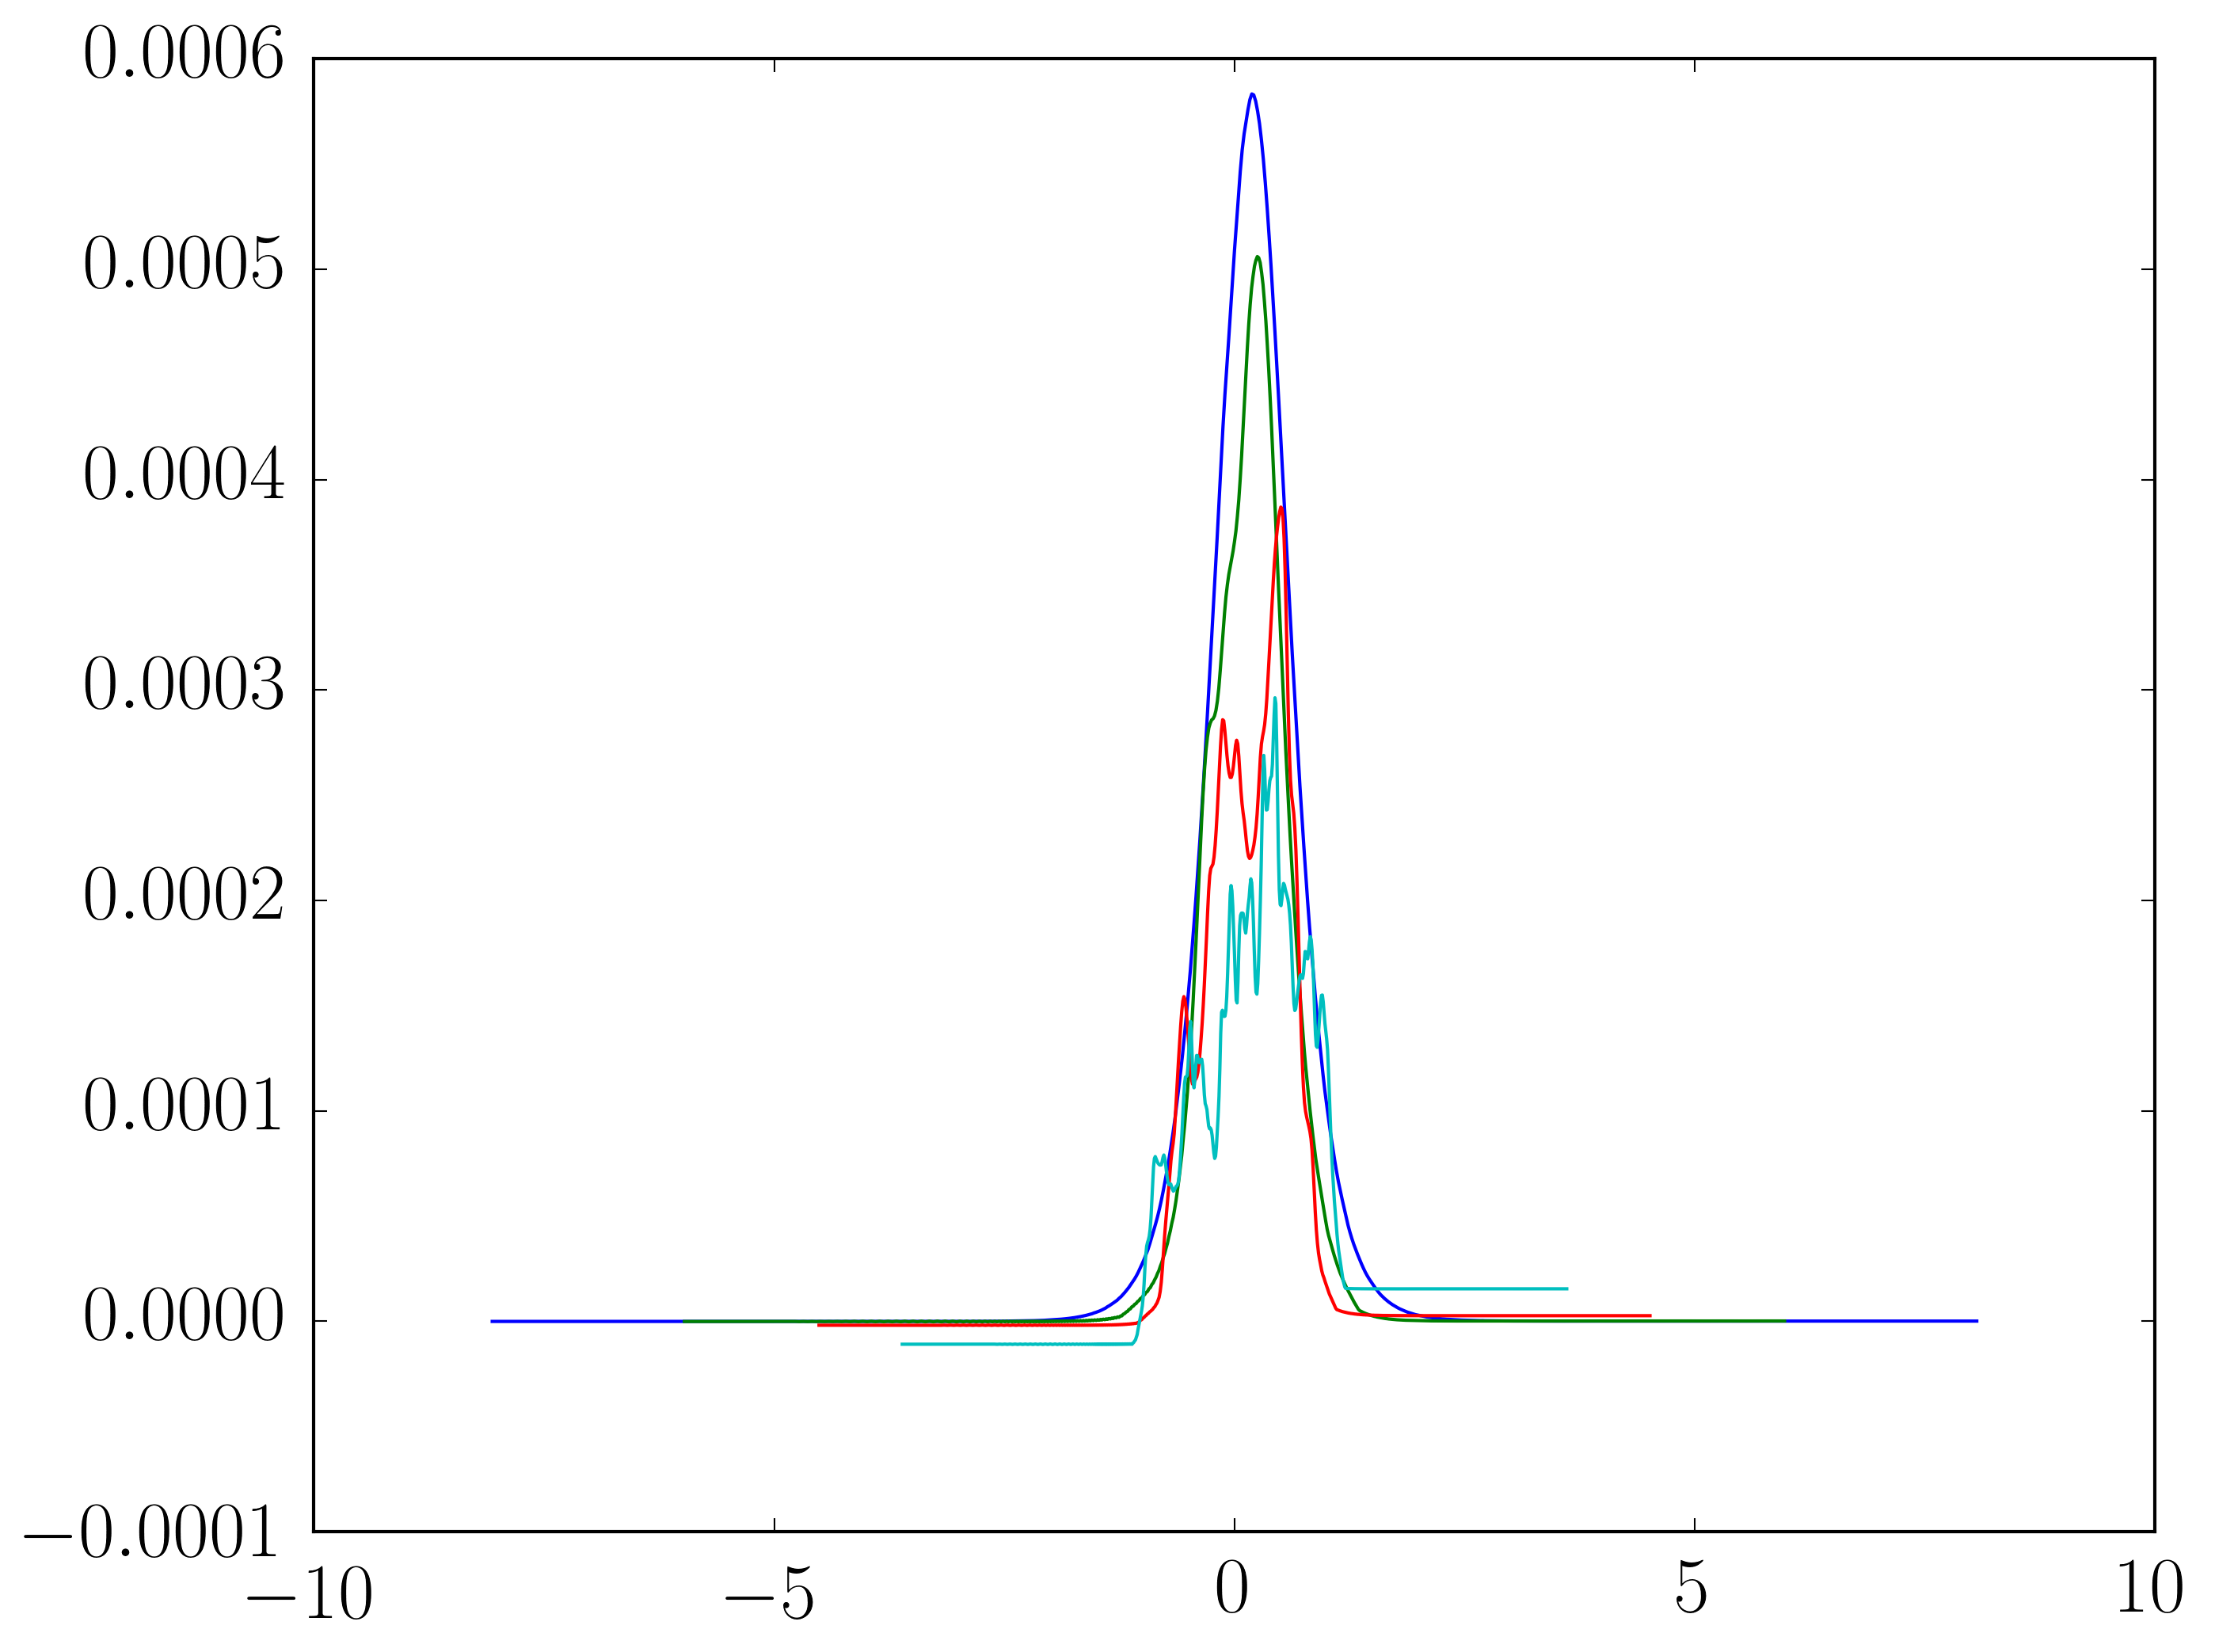

In [1201]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.xlim([-5,10])
vint=np.zeros(len(time)-1)
vint2=np.zeros(len(time)-1)
drhodtA=np.zeros(len(time))
meanmass=np.zeros(len(time))
for ii in range(0,len(time)-1):
    vint2[ii]=np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii],yf)/(time[ii+1]-time[ii])
    vint[ii]=np.trapz(rhom[:,ii+1]-rhom[:,ii],yf)/(time[ii+1]-time[ii])
    meanmass[ii]=1/Ly*np.trapz(rhom[:,ii],yf)
for ii in range(0,len(time),50):
    #print (time[ii]-time[ii-1])/20.0
    #plt.plot(yfa,rvma[:,ii])
    #plt.xlim([-5,10])
    #plt.plot(yf[1:]/dm[ii],np.diff(yf))
    plt.plot(yf/dw[ii],vm[:,ii],'-')
    print time[ii]
    #drhodtA[ii]=-np.trapz(compact.deryr(rvm[:,ii],dt12,prem1,fmap,my),y)
    
    #print "time=%s, phi=%s" %( timea[ii], rvma[0,ii]-rvma[-1,ii])
    #print "dm=%s"%(dma[ii])
print "Mass balance=" 
#drhodt = np.diff(vint)/np.diff(time)
drhodt = vint
massbalance=vint+(rvm[-1,1:]-rvm[0,1:])
massratio=massbalance/meanmass[1:]*100
plt.xlim([-10,10])
#print massbalance
#print massratio
#plt.plot(yf[1:]/dm[-1],np.diff(yf)*0.001)

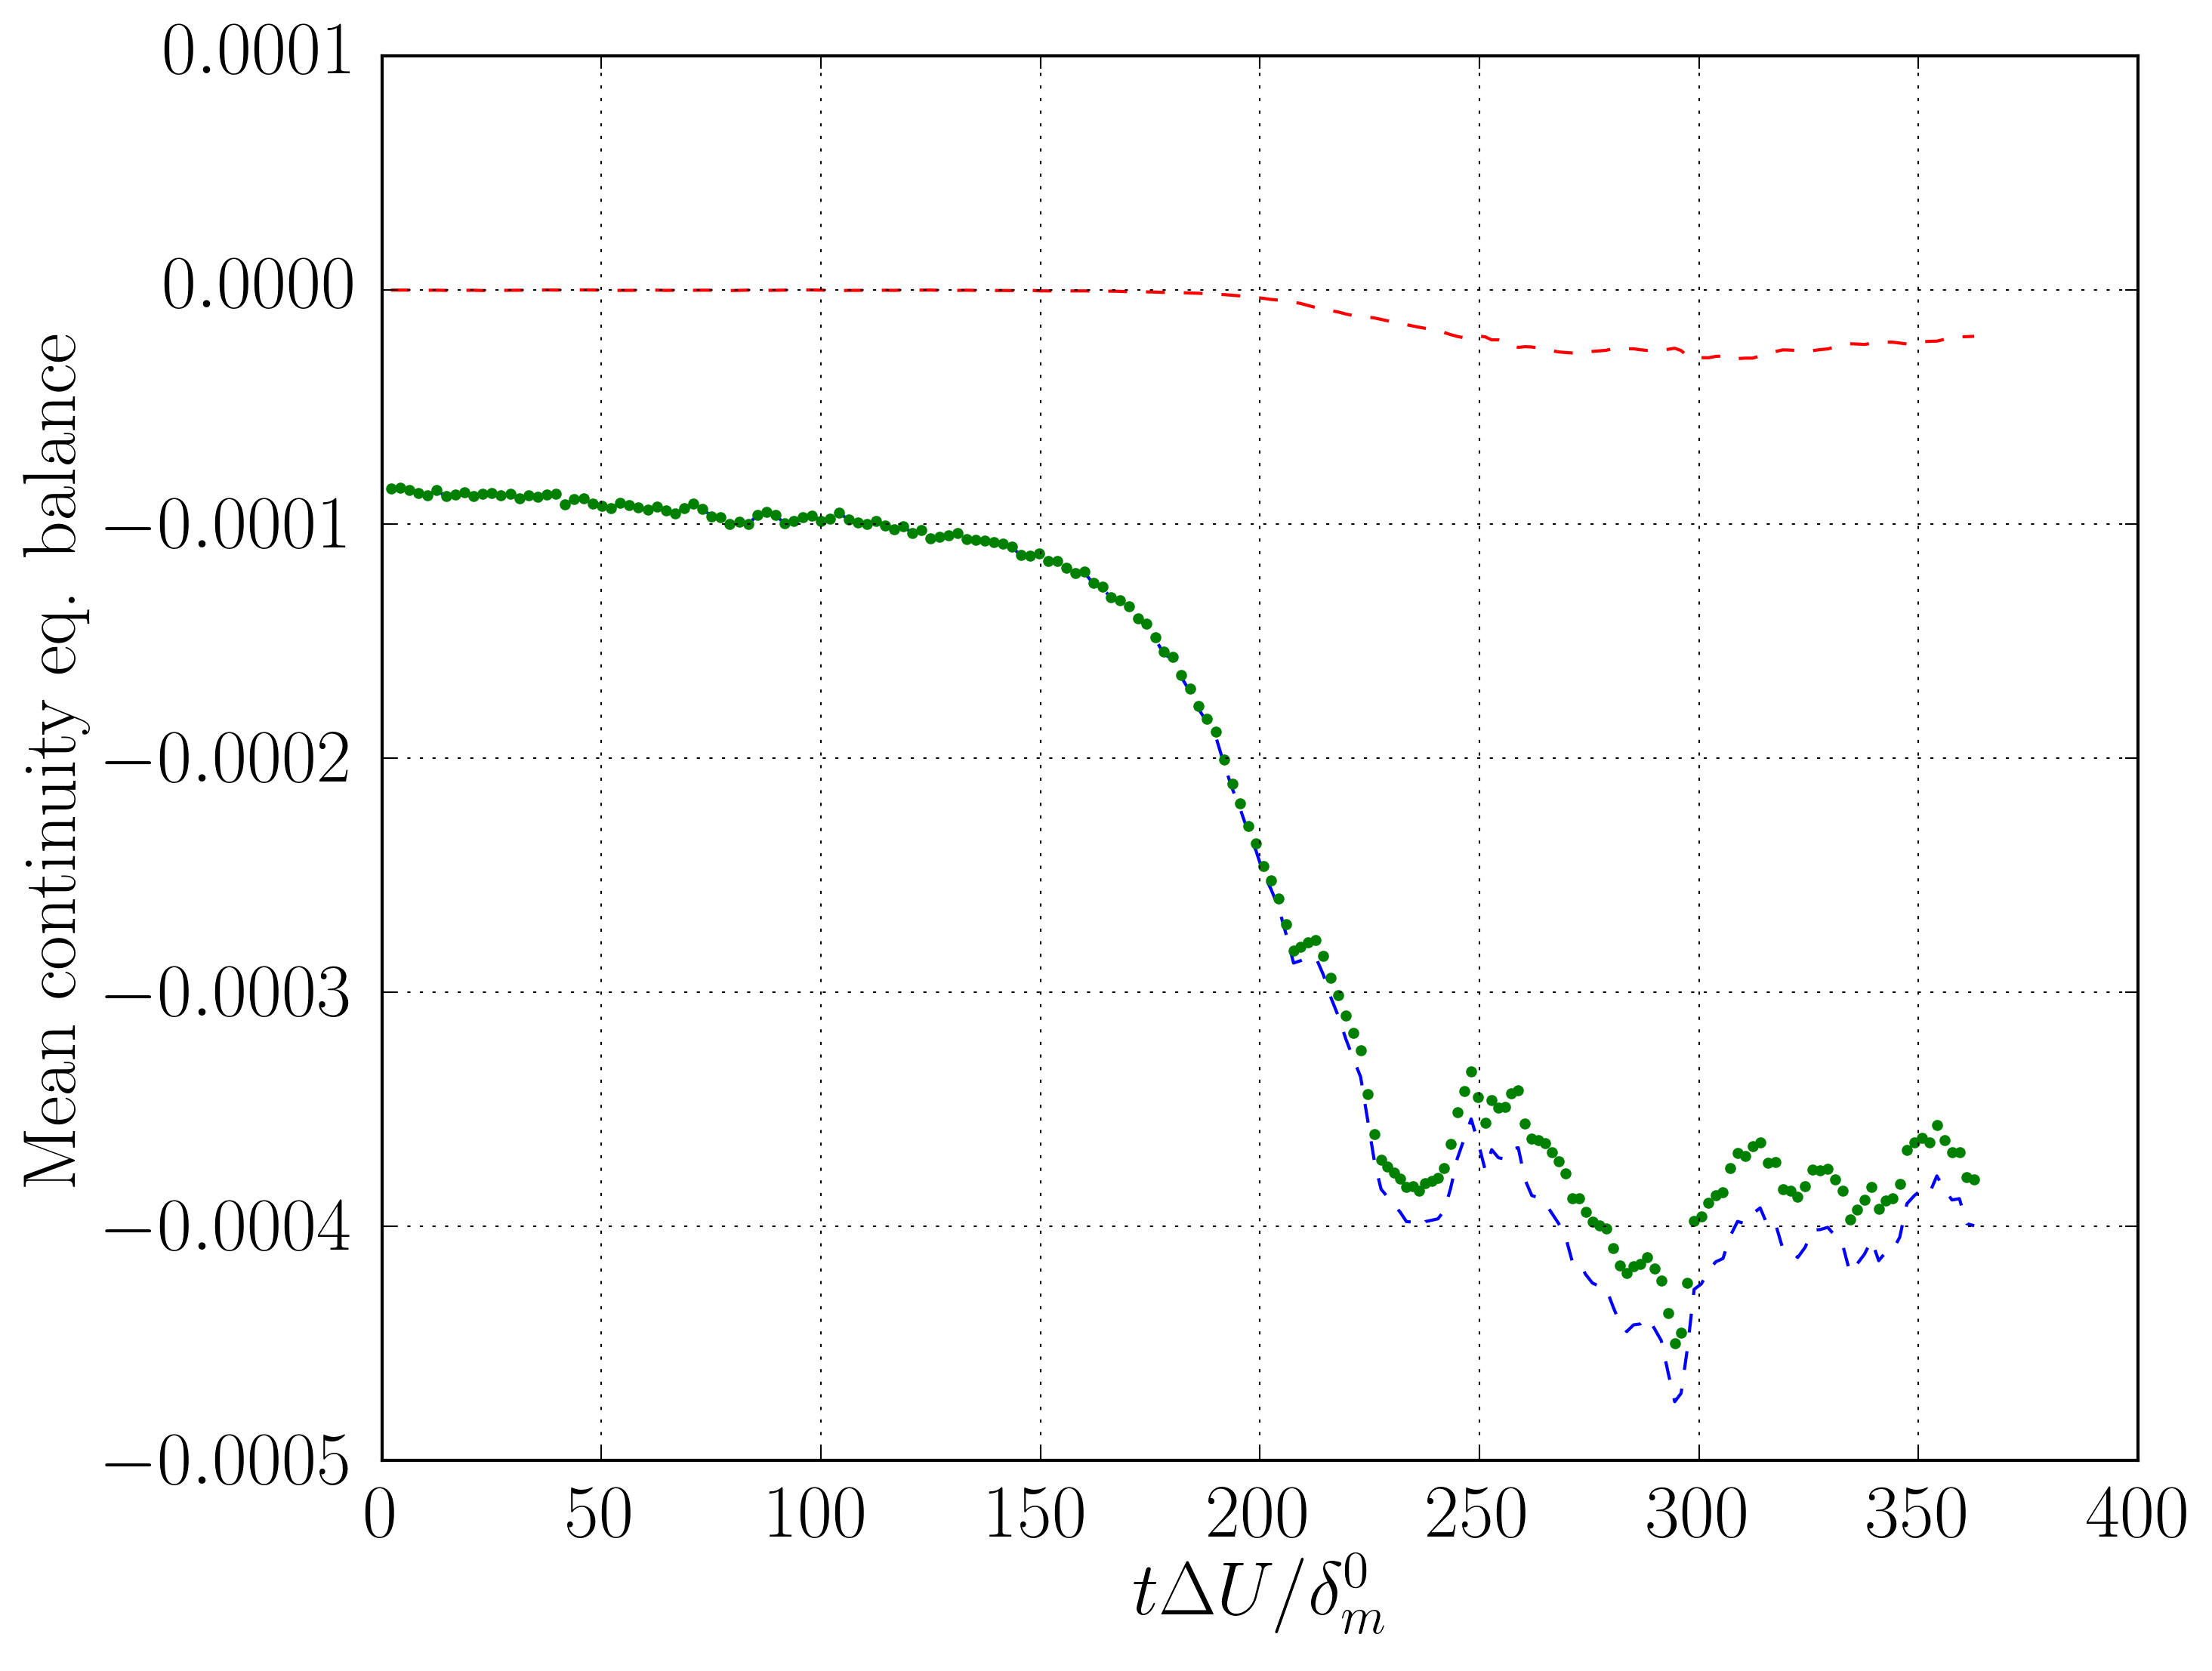

In [1202]:
#plt.plot(time[:-1],massbalance,'k-')
plt.grid('on')
plt.plot(time[:-1],drhodt,'b--')
plt.plot(time[:-1],(rvm[0,1:]-rvm[-1,1:]),'r--')
plt.plot(time[:-1],massbalance,'g.')
plt.xlabel(r'$t \Delta U/\delta_m^0$')
plt.ylabel(r'Mean continuity eq. balance')
#print massbalance[:]

1.69915771484


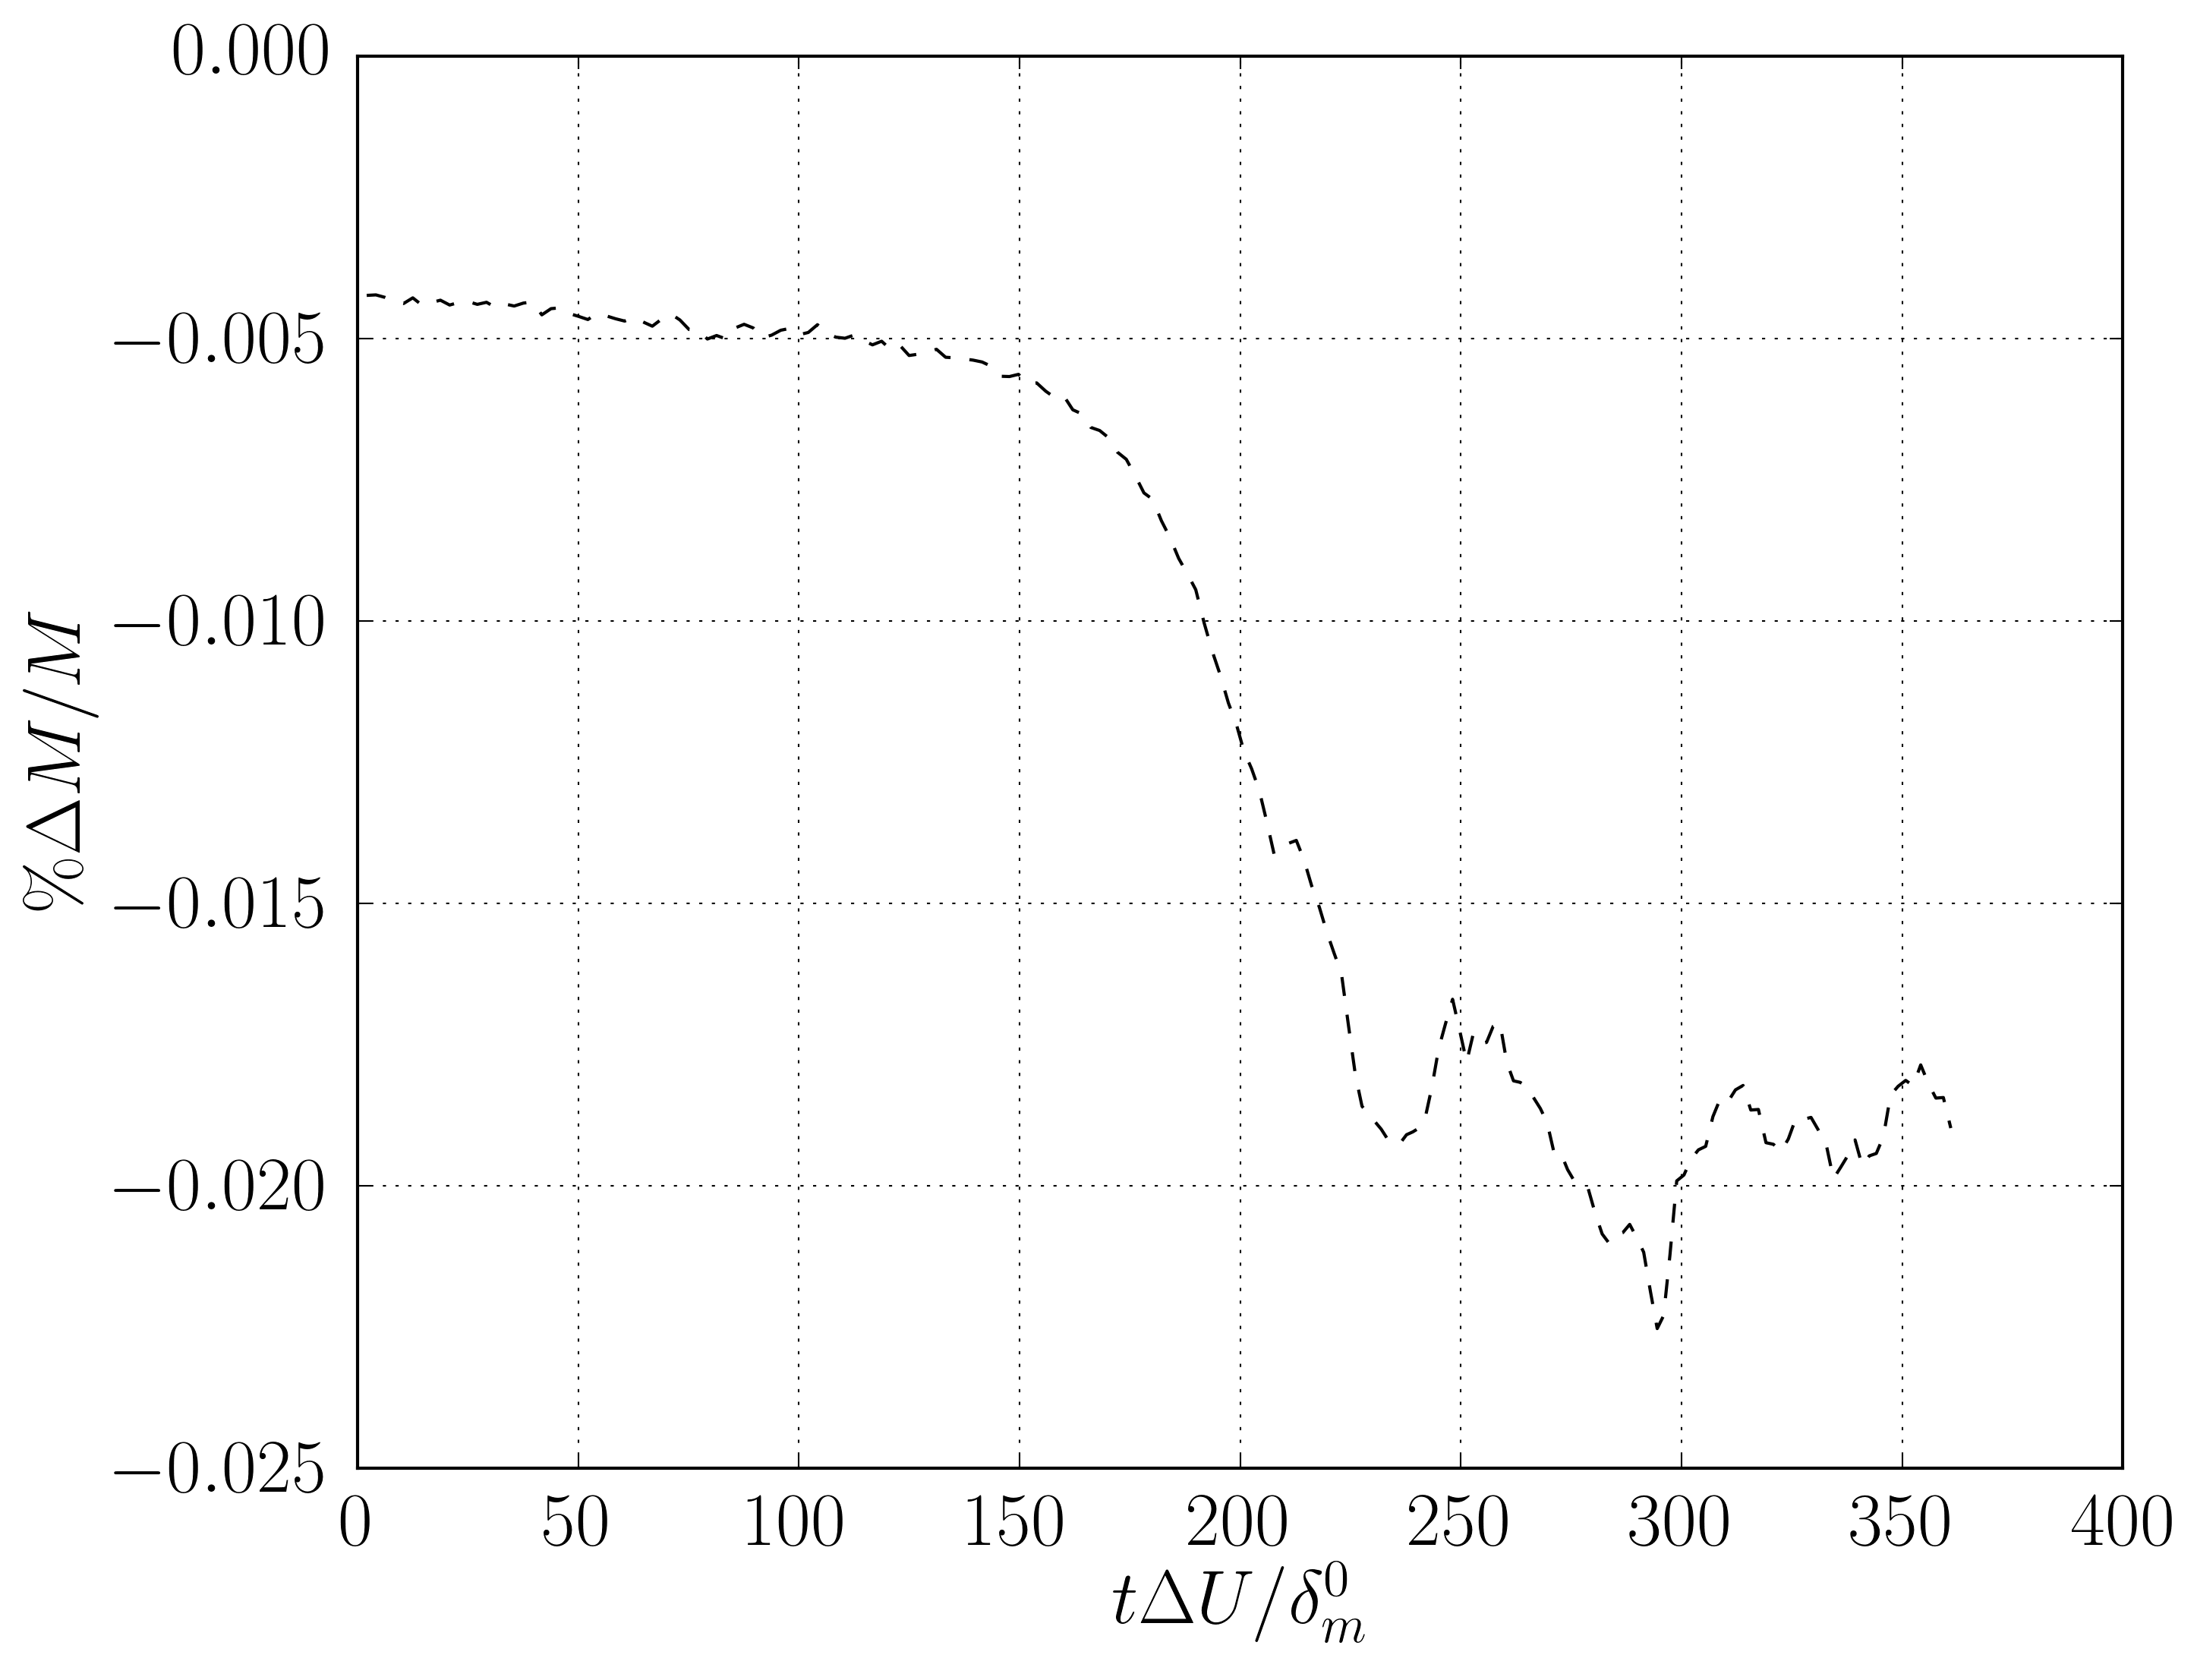

In [1203]:
#plt.plot(time[:-1],massbalance)
plt.plot(time[:-1],massratio,'k--')
#plt.plot(time[:-1],drhodt,'b--')
#plt.plot(time[:-1],vint2,'y--')
plt.grid('on')
#plt.ylim([-0.001,0.001])
#plt.plot(time[:-1],rvm[0,:-1]-rvm[-1,:-1],'r--')
#plt.plot(time[:-1],rvm[-1,:-1],'g.')
plt.xlabel(r'$t \Delta U/\delta_m^0$')
plt.ylabel(r'$\%\Delta M/M$')
print np.diff(time)[-1]

0.00770049453216 <module 'numpy' from '/usr/local/lib/python2.7/site-packages/numpy/__init__.pyc'> 0.00737592040491


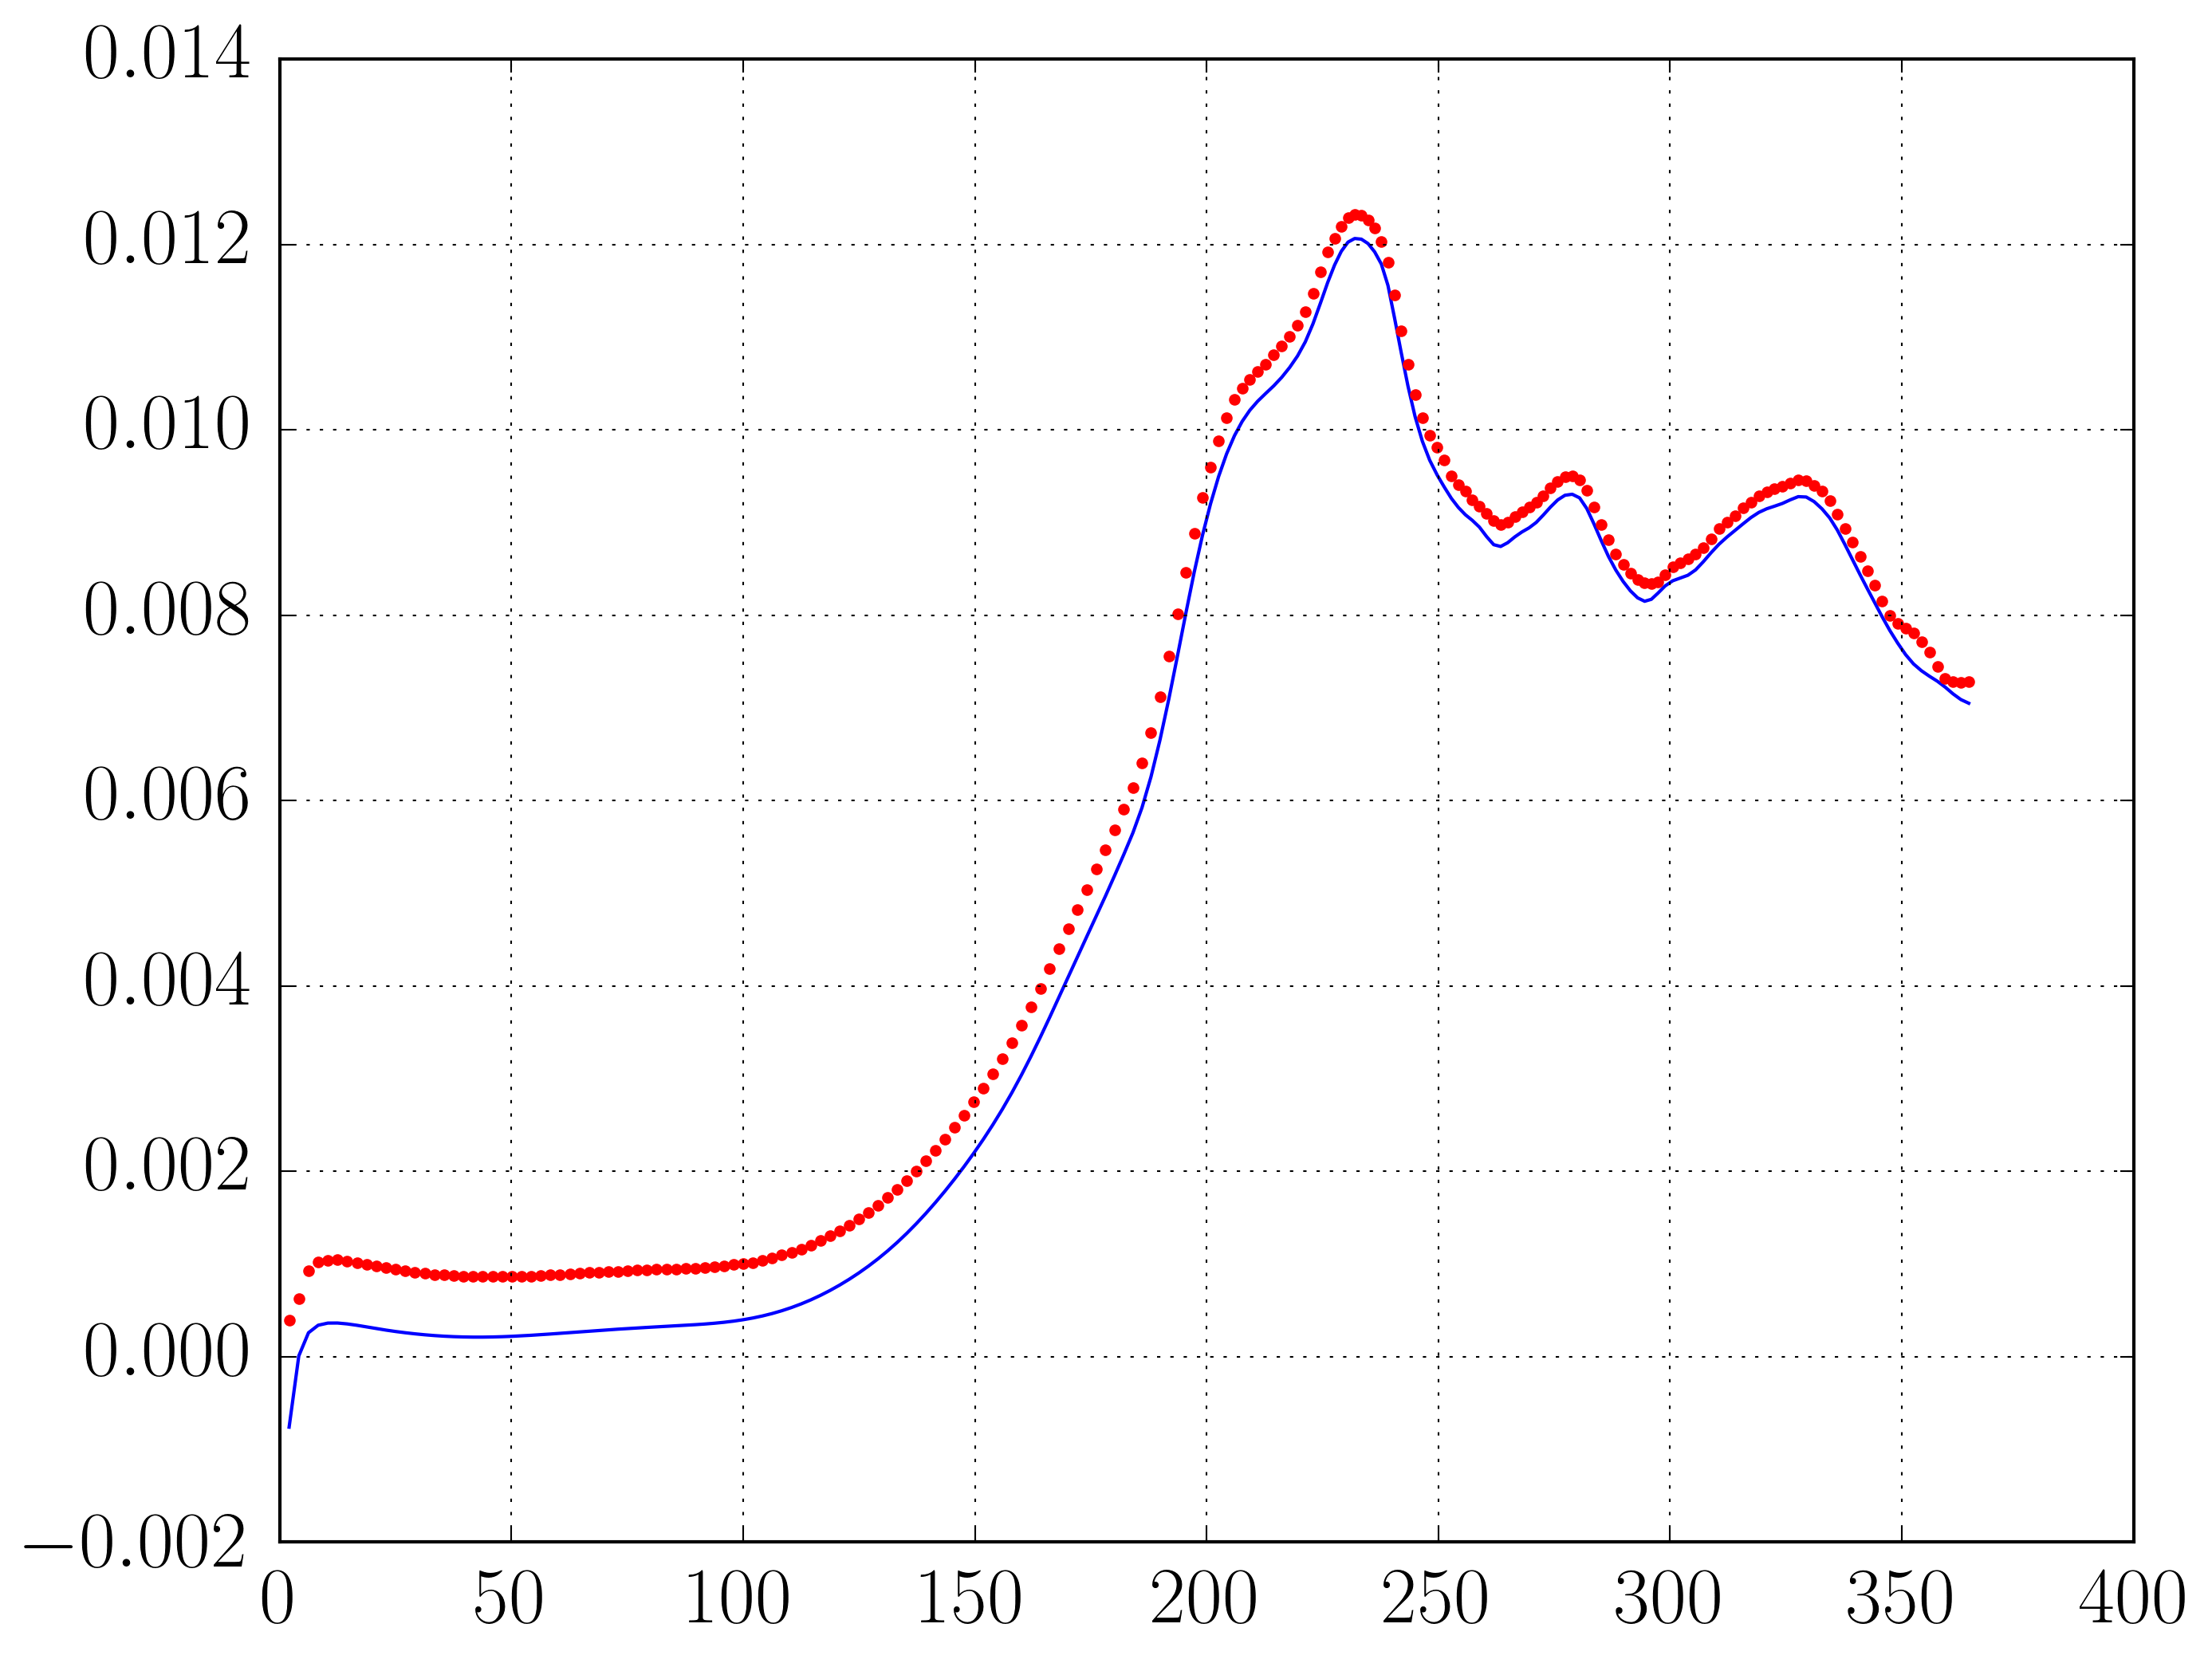

In [1204]:
plt.plot(time,dmpoint,'b')
plt.plot(time,der1(time,dm),'r.')
print np.mean(der1(time,dm)[50:]),np,mean(dmpoint[50:])
#plt.ylim([0.0,0.014])
plt.grid('on')

In [540]:
path = '/share/drive/toni/Re360s80/h5.stats'
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w1m'])
    TT = np.array(f['TT'])
    w1rms = np.array(f['w1rms'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

In [479]:
om = np.zeros(len(time))
for i in range(len(time)):
    #om[i] = np.trapz(w3m[:,i],y)
    om[i] = np.trapz(w3rms[:,i]**2/2.0,y)

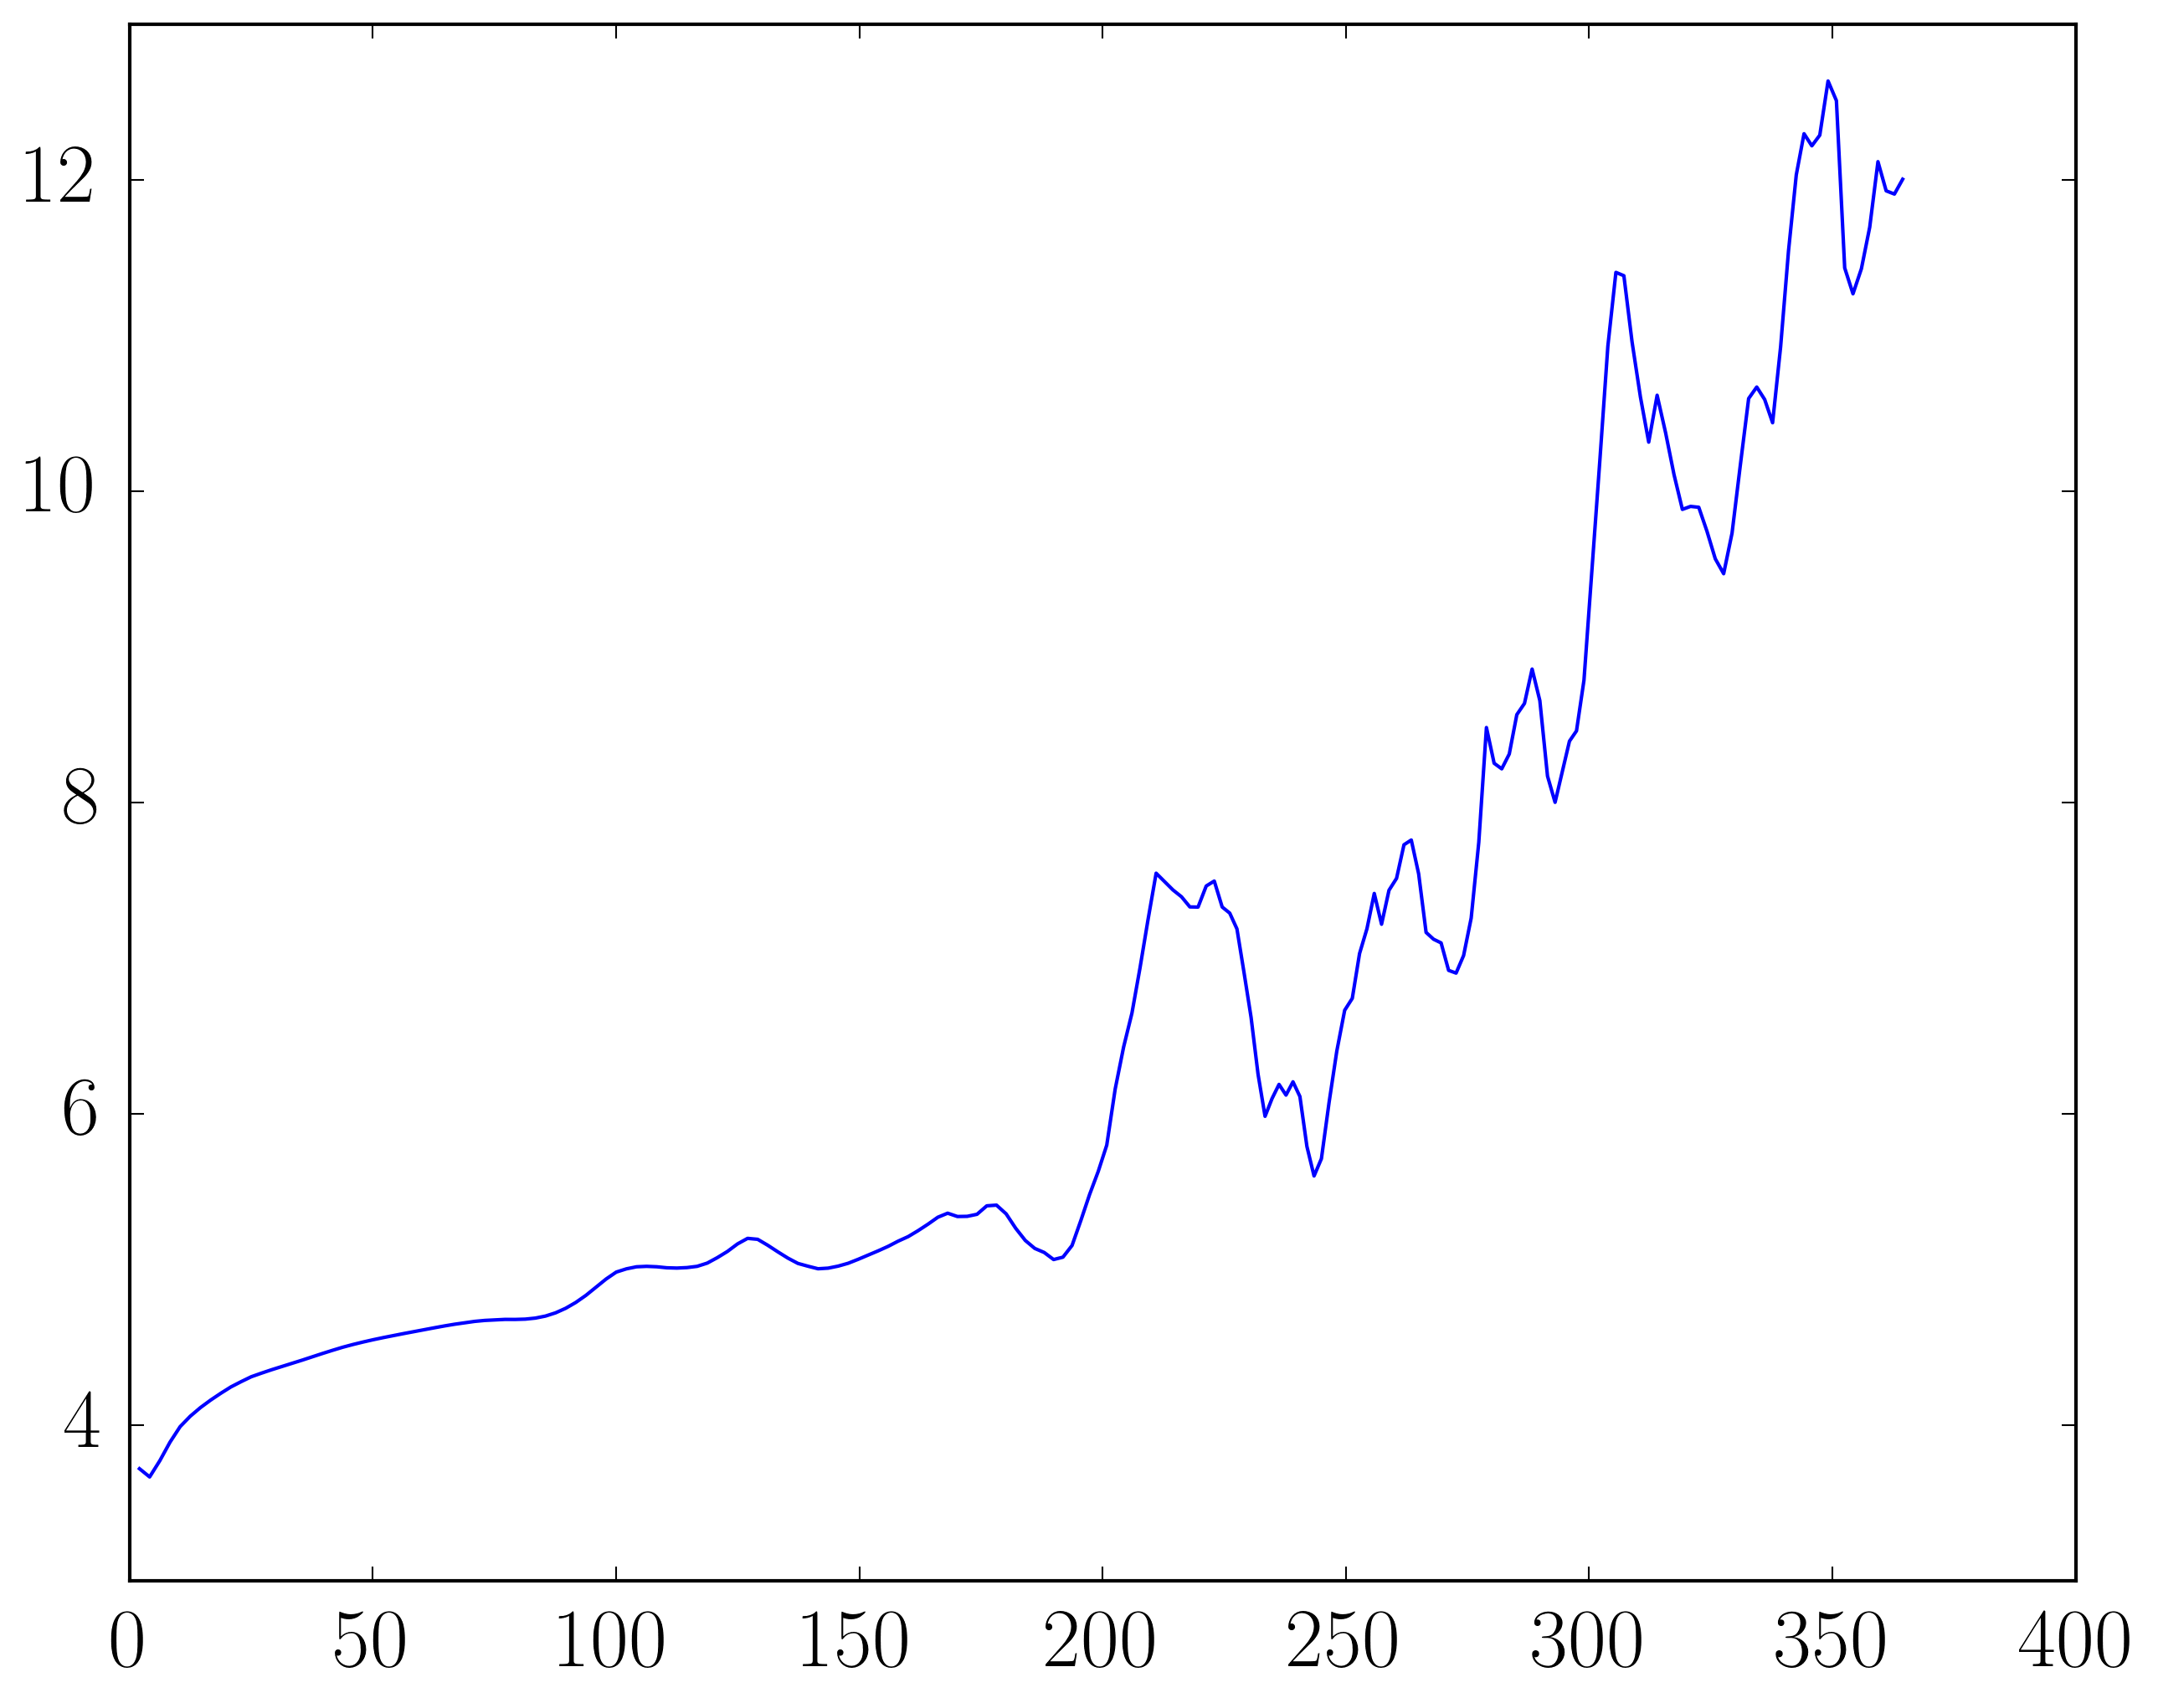

In [1100]:
plt.plot(time,dw)

(0, 15)

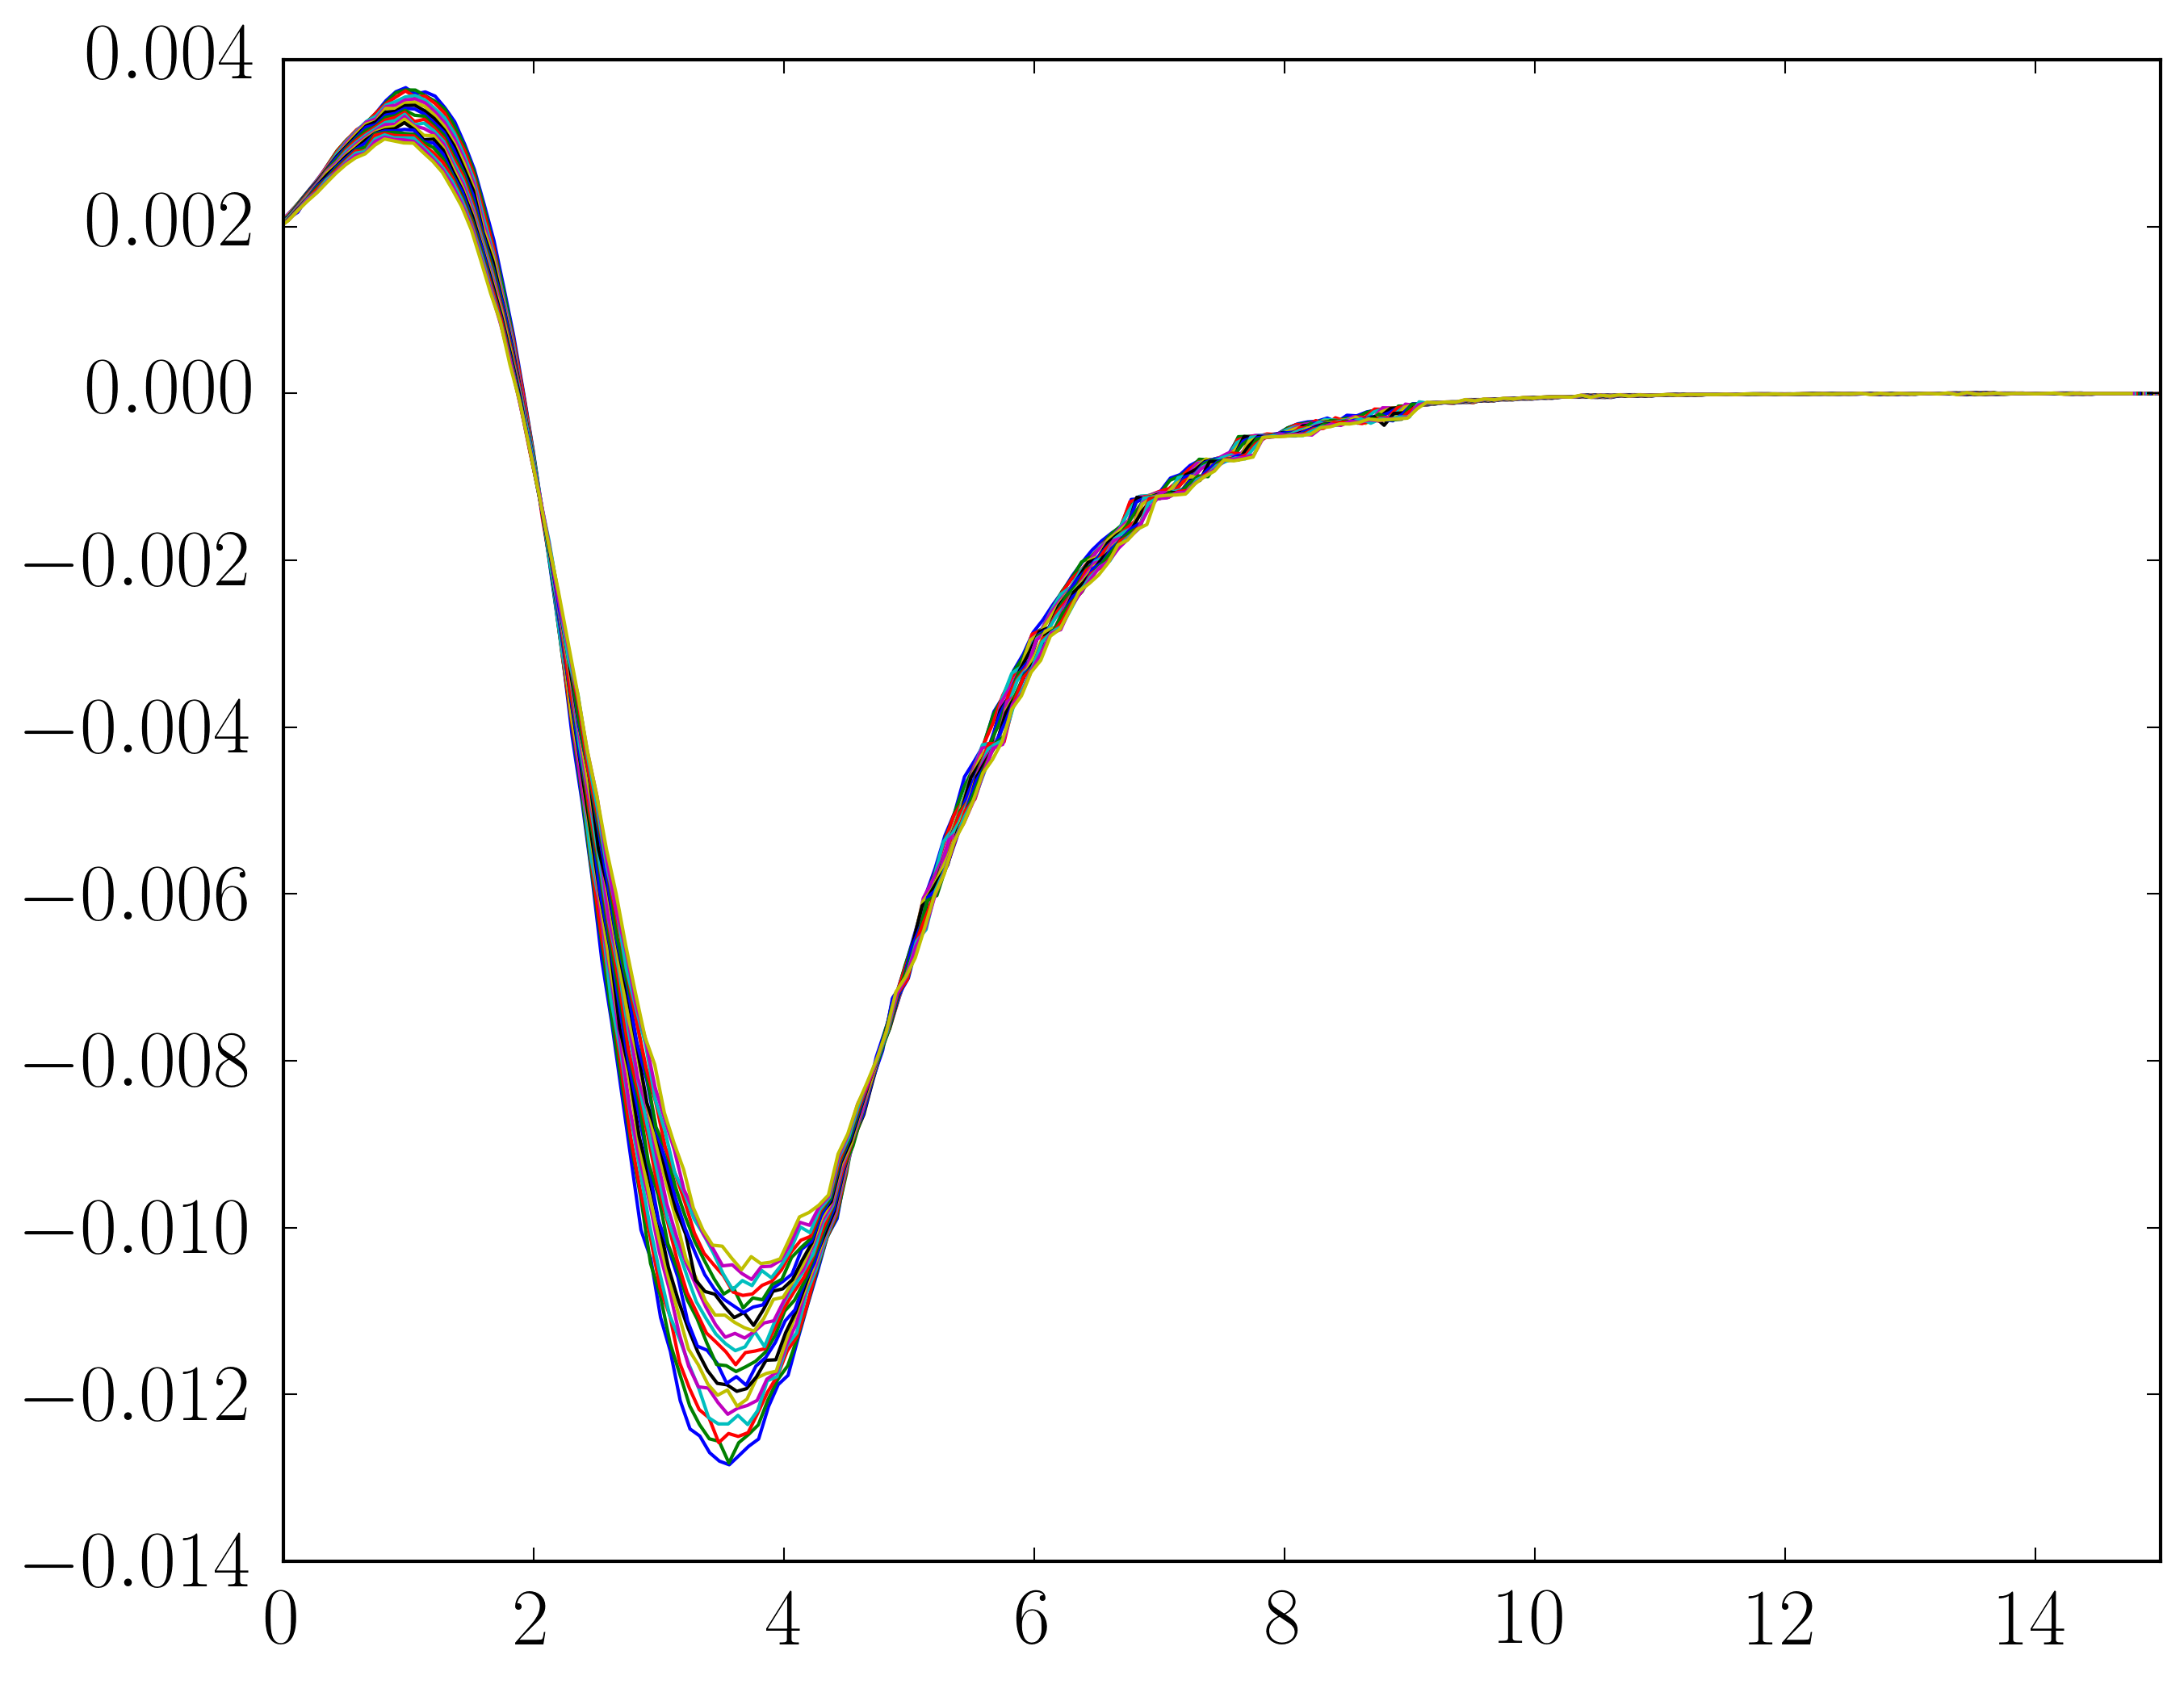

In [431]:
[prem1,prem3,dt11,dt12,dt21,dt22,fmap]= compact.derivadas(yf,len(yf))
my=len(yf)
dTdt=np.zeros([len(yf),len(time)])
drhodt=np.zeros([len(yf),len(time)])
for ii in range(len(time)):
    dTdt[:,ii]=-rvm[:,ii]*compact.deryr(Tm[:,ii],dt12,prem1,fmap,my) +Tm[:,ii]*(1/(0.7*160.0))*compact.deryyr(Tm[:,ii],dt22,prem3,my)
    drhodt[:,ii]=-compact.deryr(rvm[:,ii],dt12,prem1,fmap,my)
    plt.plot(yf/dm[ii],dTdt[:,ii])
    #plt.plot(yf/dm[ii],Tm[:,ii])
    #plt.plot(yf/dm[ii],Tm[:,ii])
    #plt.plot(yf/dm[ii],drhodt[:,ii],'-')
#plt.yscale('log')
plt.xlim([0,15])

(20,)
Mass balance=
[-0.00022244 -0.00022151 -0.00022136 -0.0002217  -0.00022702 -0.00021852
 -0.00021565 -0.00021773 -0.00022116 -0.00022029 -0.0002223  -0.00021663
 -0.00021586 -0.00021251 -0.00021305 -0.00021528 -0.00021768 -0.00021961
 -0.00021863]
[  14258.87485044   22139.29277945   36570.84661045   53789.24840335
   67857.65431268   95196.25731507  125226.29935525  188075.71312754
  212402.56952293  201779.59752961  242708.35852573  346414.77455692
  312187.42848177  199428.99454739  327127.09982501  203866.18239819
  148905.02840532  160709.85537431  264099.64187135]


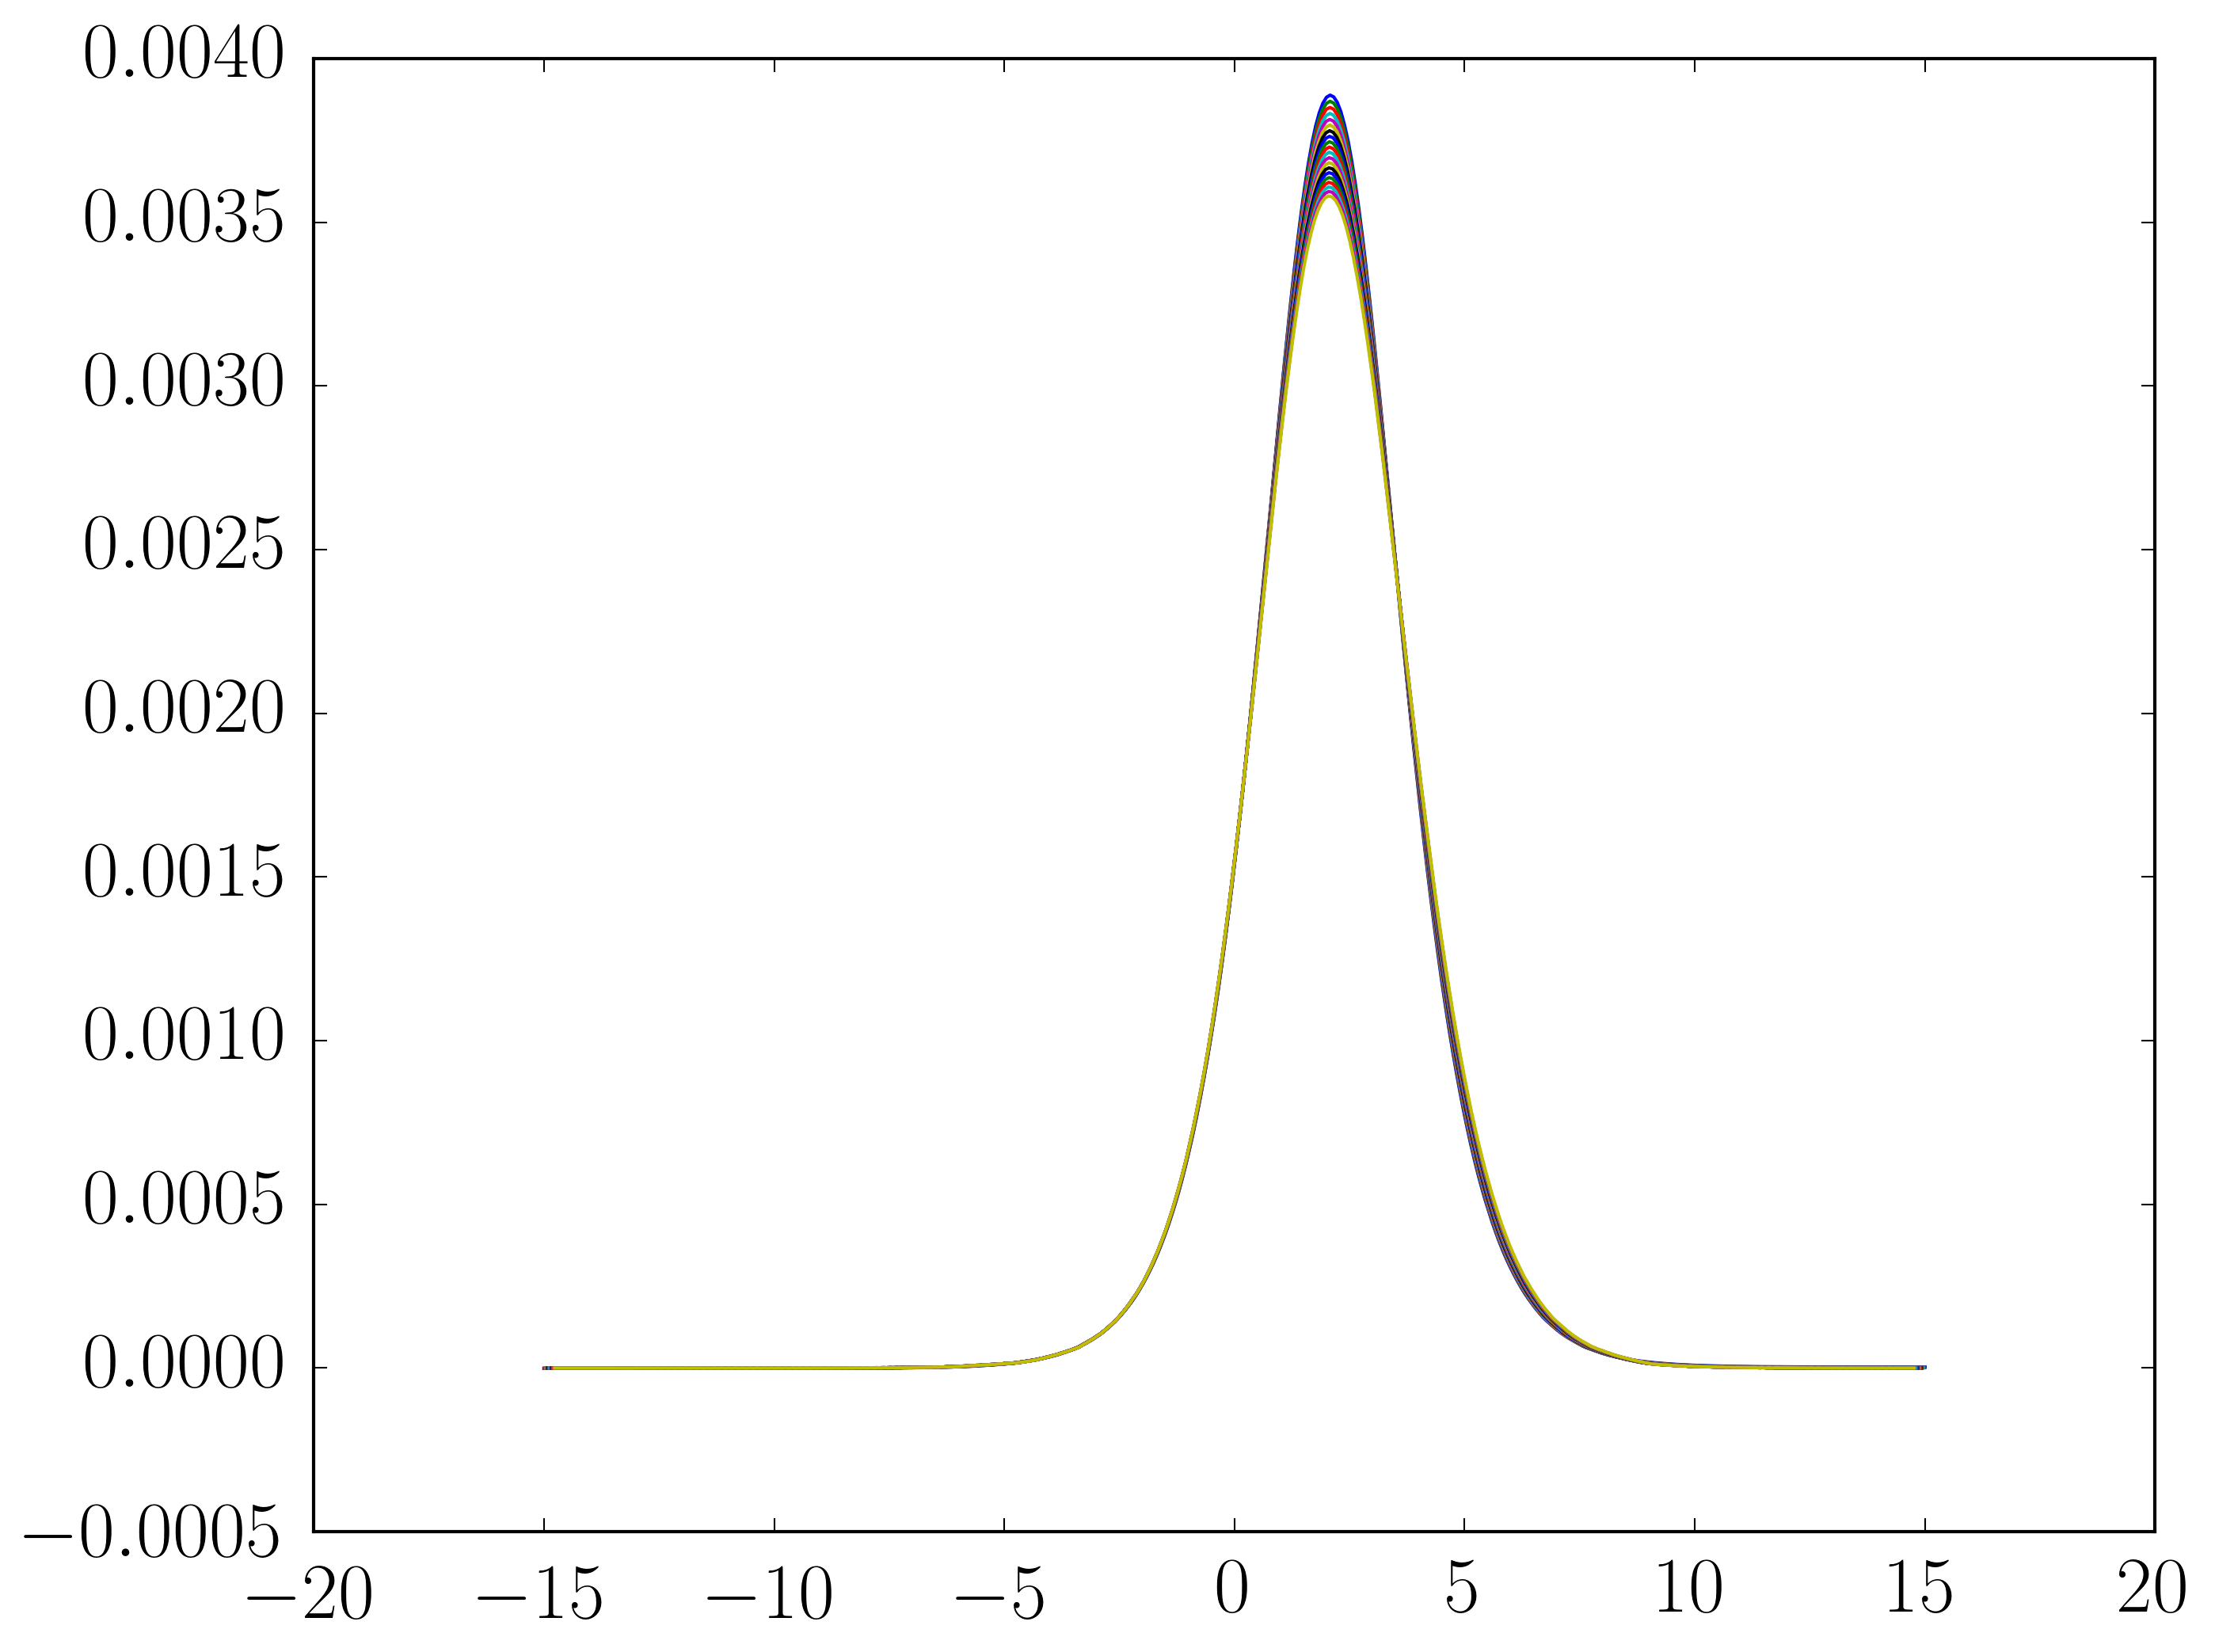

In [396]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.xlim([-5,10])
vint=np.zeros(len(time))
for ii in range(0,len(time)):
    #print (time[ii]-time[ii-1])/20.0
    #plt.plot(yfa,rvma[:,ii])
    #plt.xlim([-5,10])
    plt.plot(yf/dm[ii],vm[:,ii])
    vint[ii]=np.trapz(rhom[:,ii],yf)
    #print "time=%s, phi=%s" %( timea[ii], rvma[0,ii]-rvma[-1,ii])
    #print "dm=%s"%(dma[ii])
print "Mass balance=" 
massbalance=(np.diff(vint)/np.diff(time))+(rvm[0,1:]-rvm[-1,1:])
massratio=np.abs(((np.diff(vint)/np.diff(time))+(rvm[0,1:]-rvm[-1,1:]))/(rvm[0,1:]-rvm[-1,1:]))*100
print massbalance
print massratio
#plt.plot(yf[1:]/dm[-1],np.diff(yf)*0.001)

(20,)


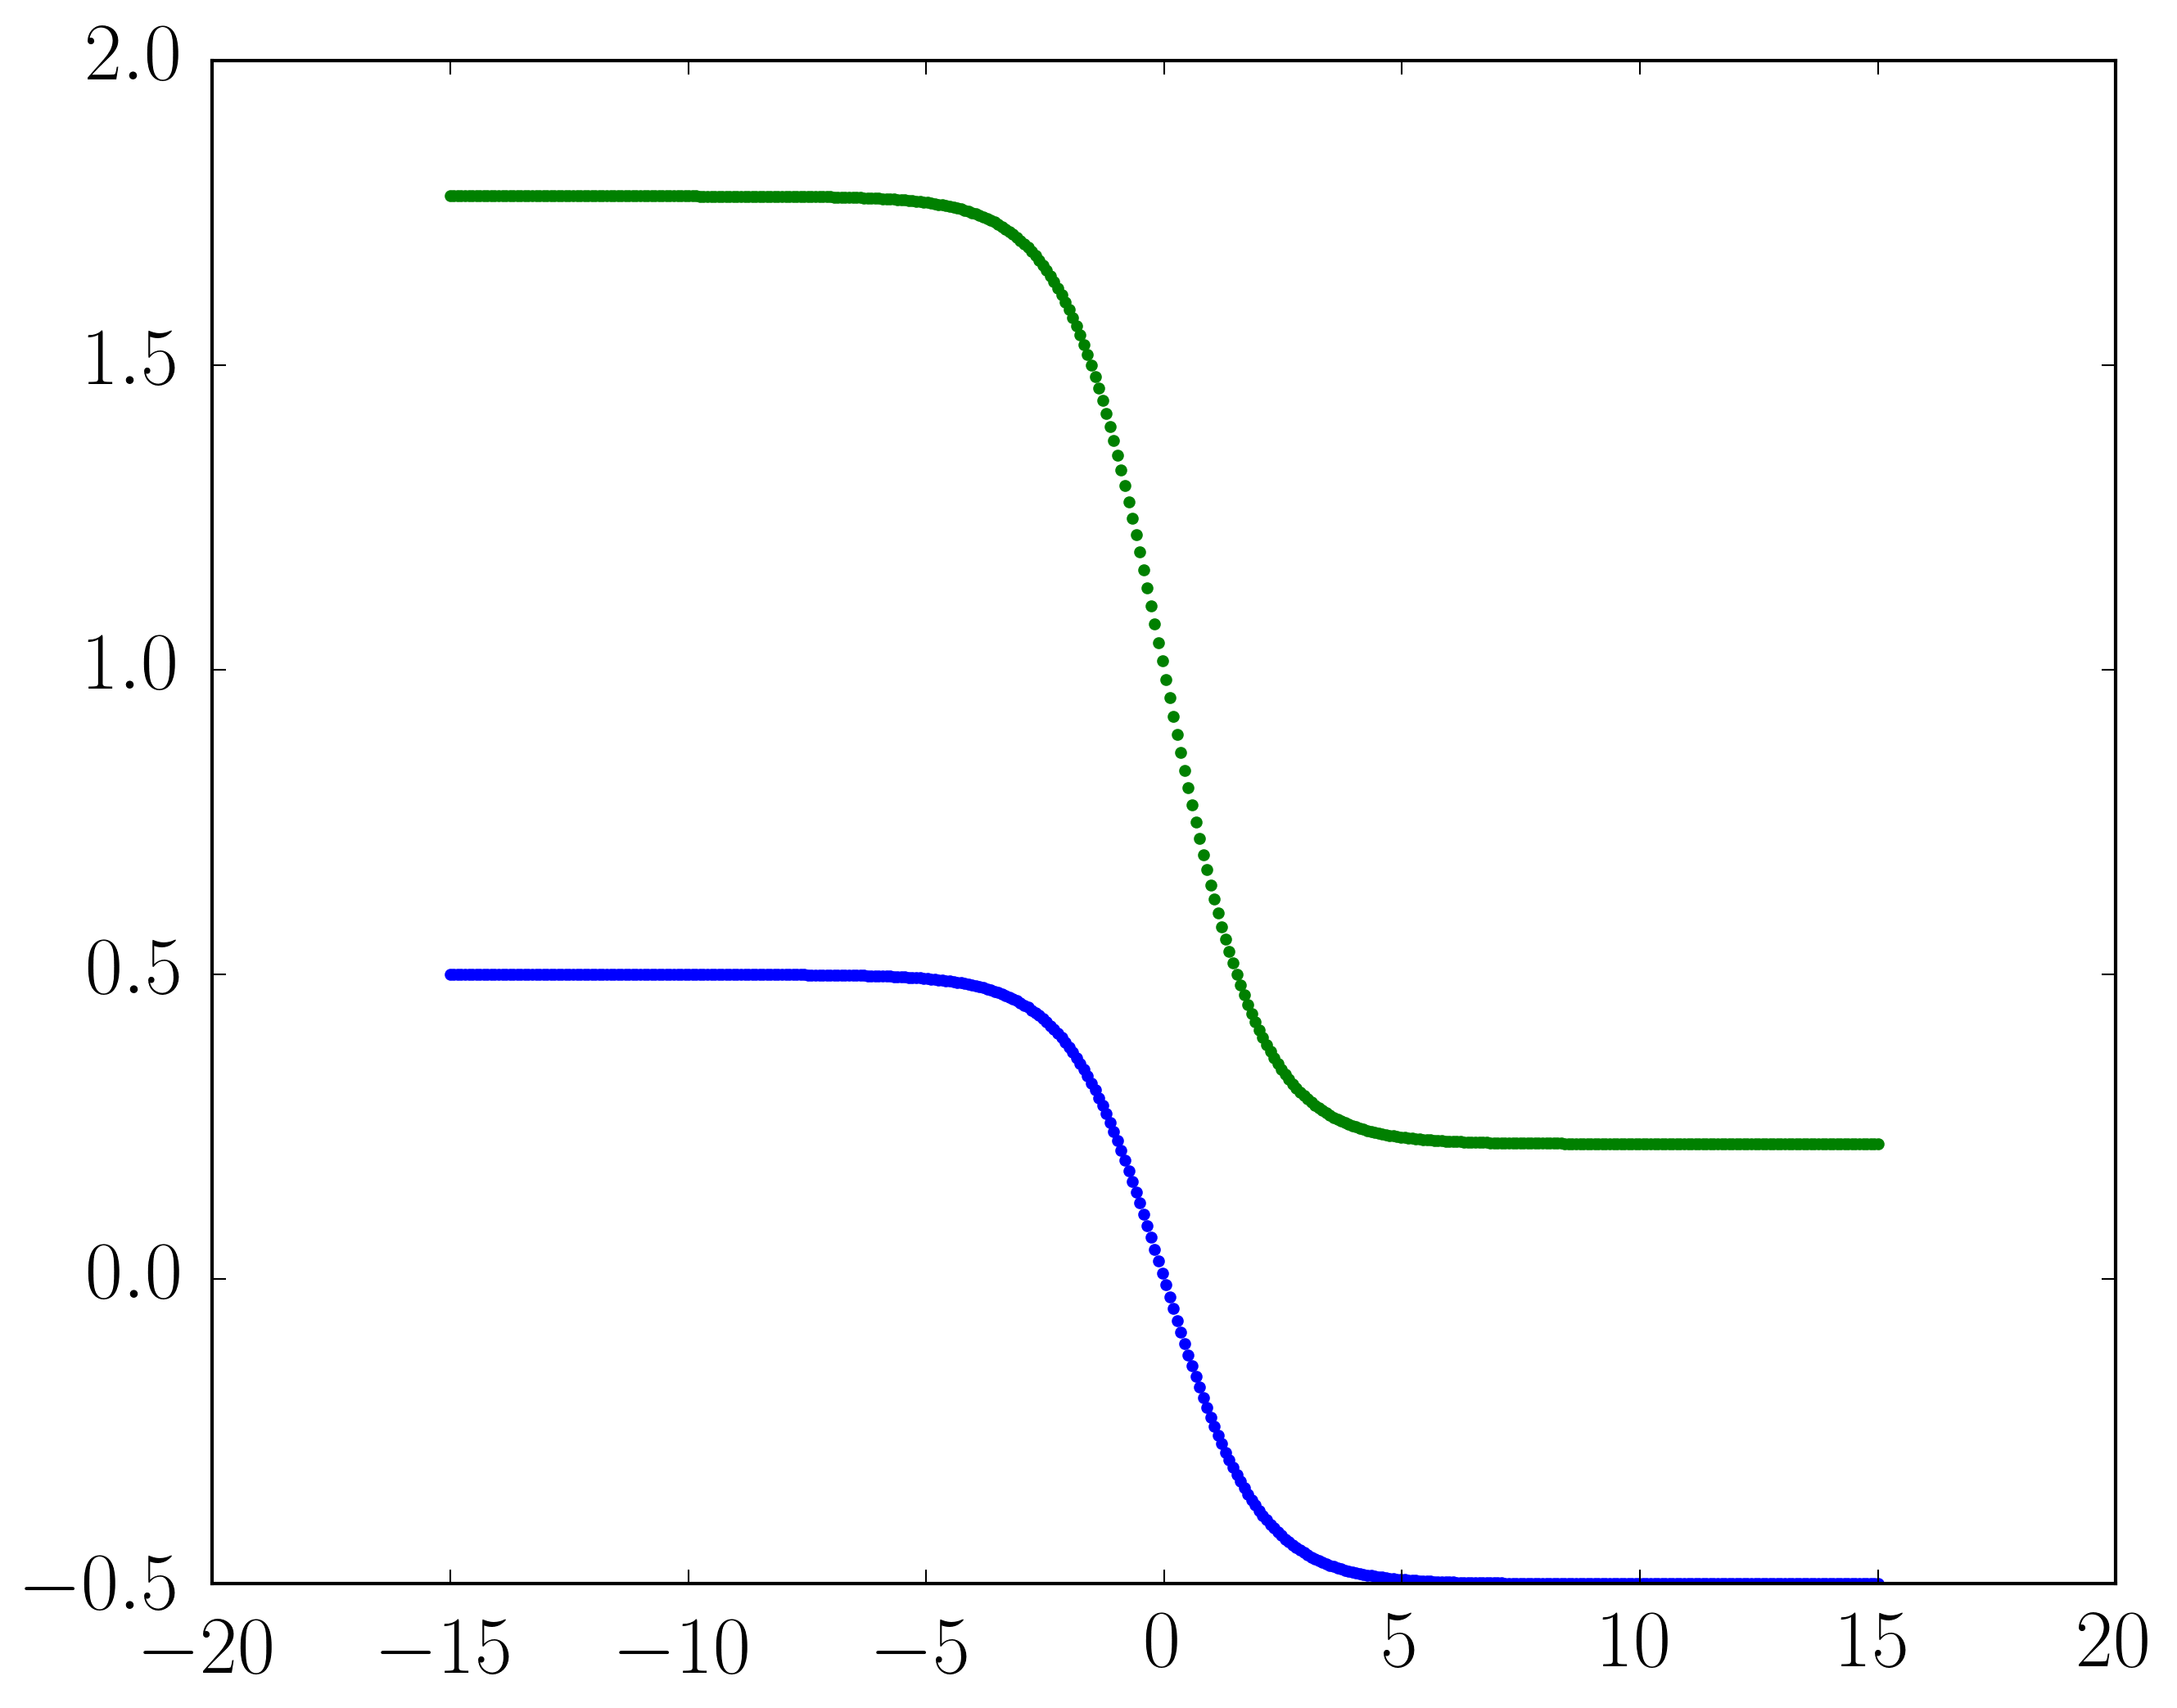

In [398]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.ylim([4.48,4.52])
vint=np.zeros(len(time))
for ii in range(0,1):
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    plt.plot(yf/dm[ii],rhom[:,ii],'g.')
    plt.plot(yf/dm[ii],um[:,ii],'b.')
    #plt.plot(yf/dm[ii],Trms[:,ii])
    #vint[ii]=np.trapz(rhom[:,ii],yf)


(20,)


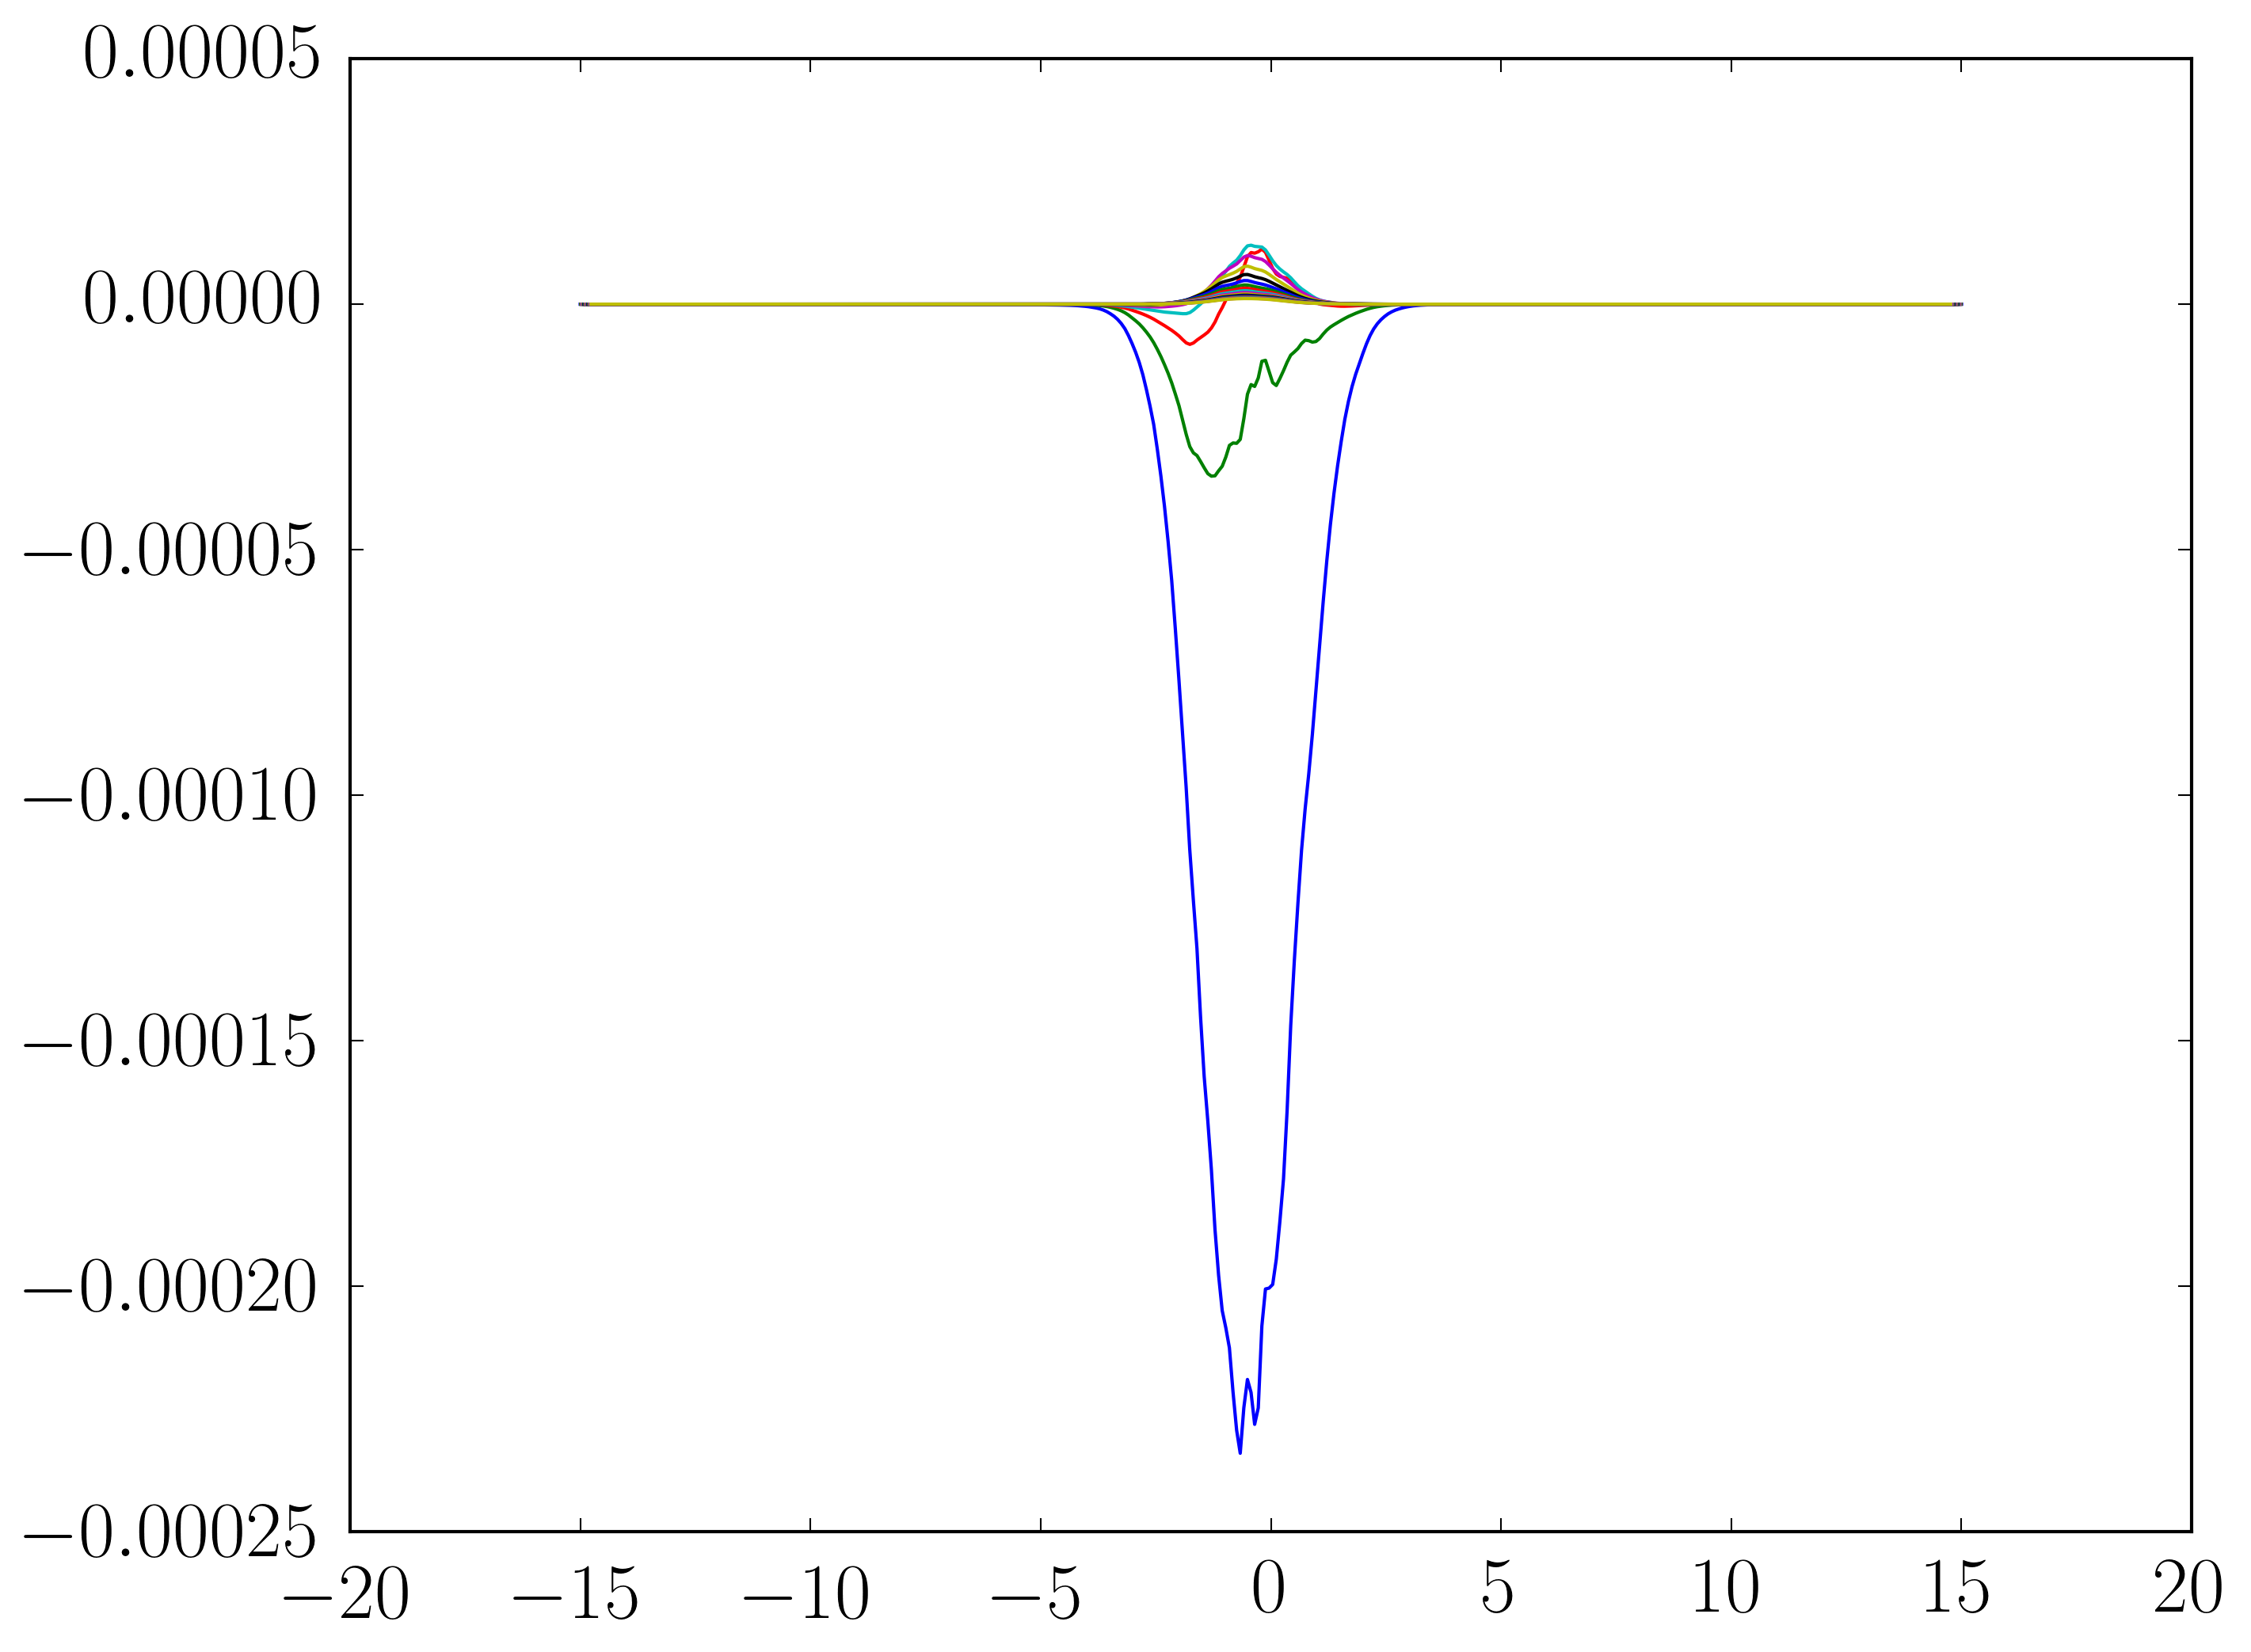

In [399]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.ylim([4.48,4.52])
vint=np.zeros(len(time))
for ii in range(len(time)):
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    #plt.plot(yf/dm[ii],urms[:,ii],'g')
    plt.plot(yf/dm[ii],R12[:,ii])
    #vint[ii]=np.trapz(rhom[:,ii],yf)


In [313]:
path = '/share/drive/toni/Re360s80/lomacte/h5.stats'
i=-1
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    vm = np.array(f['vm'])
    R12 = np.array(f['R12'])
    rhom= np.array(f['rhom'])
    um = np.array(f['um'])
    rum= np.array(f['rum'])
    Tm = np.array(f['Tm'])
    Trms = np.array(f['Trms'])
    R11 = np.array(f['R11'])
    R22 = np.array(f['R22'])
    R12 = np.array(f['R12'])
    R33 = np.array(f['R33'])
    urms = np.array(f['urms'])
    dmpoint = np.array(f['dmpoint'])
    EPS=np.array(f['EPS'])
    w3m = np.array(f['w3m'])
    w3rms = np.array(f['w3rms'])
    w2m = np.array(f['w2m'])
    w1m = np.array(f['w2m'])
    dmpvisc=np.zeros(len(time))
kk=der1(yf,um)*der1(yf,rum/rhom)
for i in range(len(time)):
    dmpvisc[i] = 2.0/160.0*np.trapz(kk[:,i],yf)

(8,)


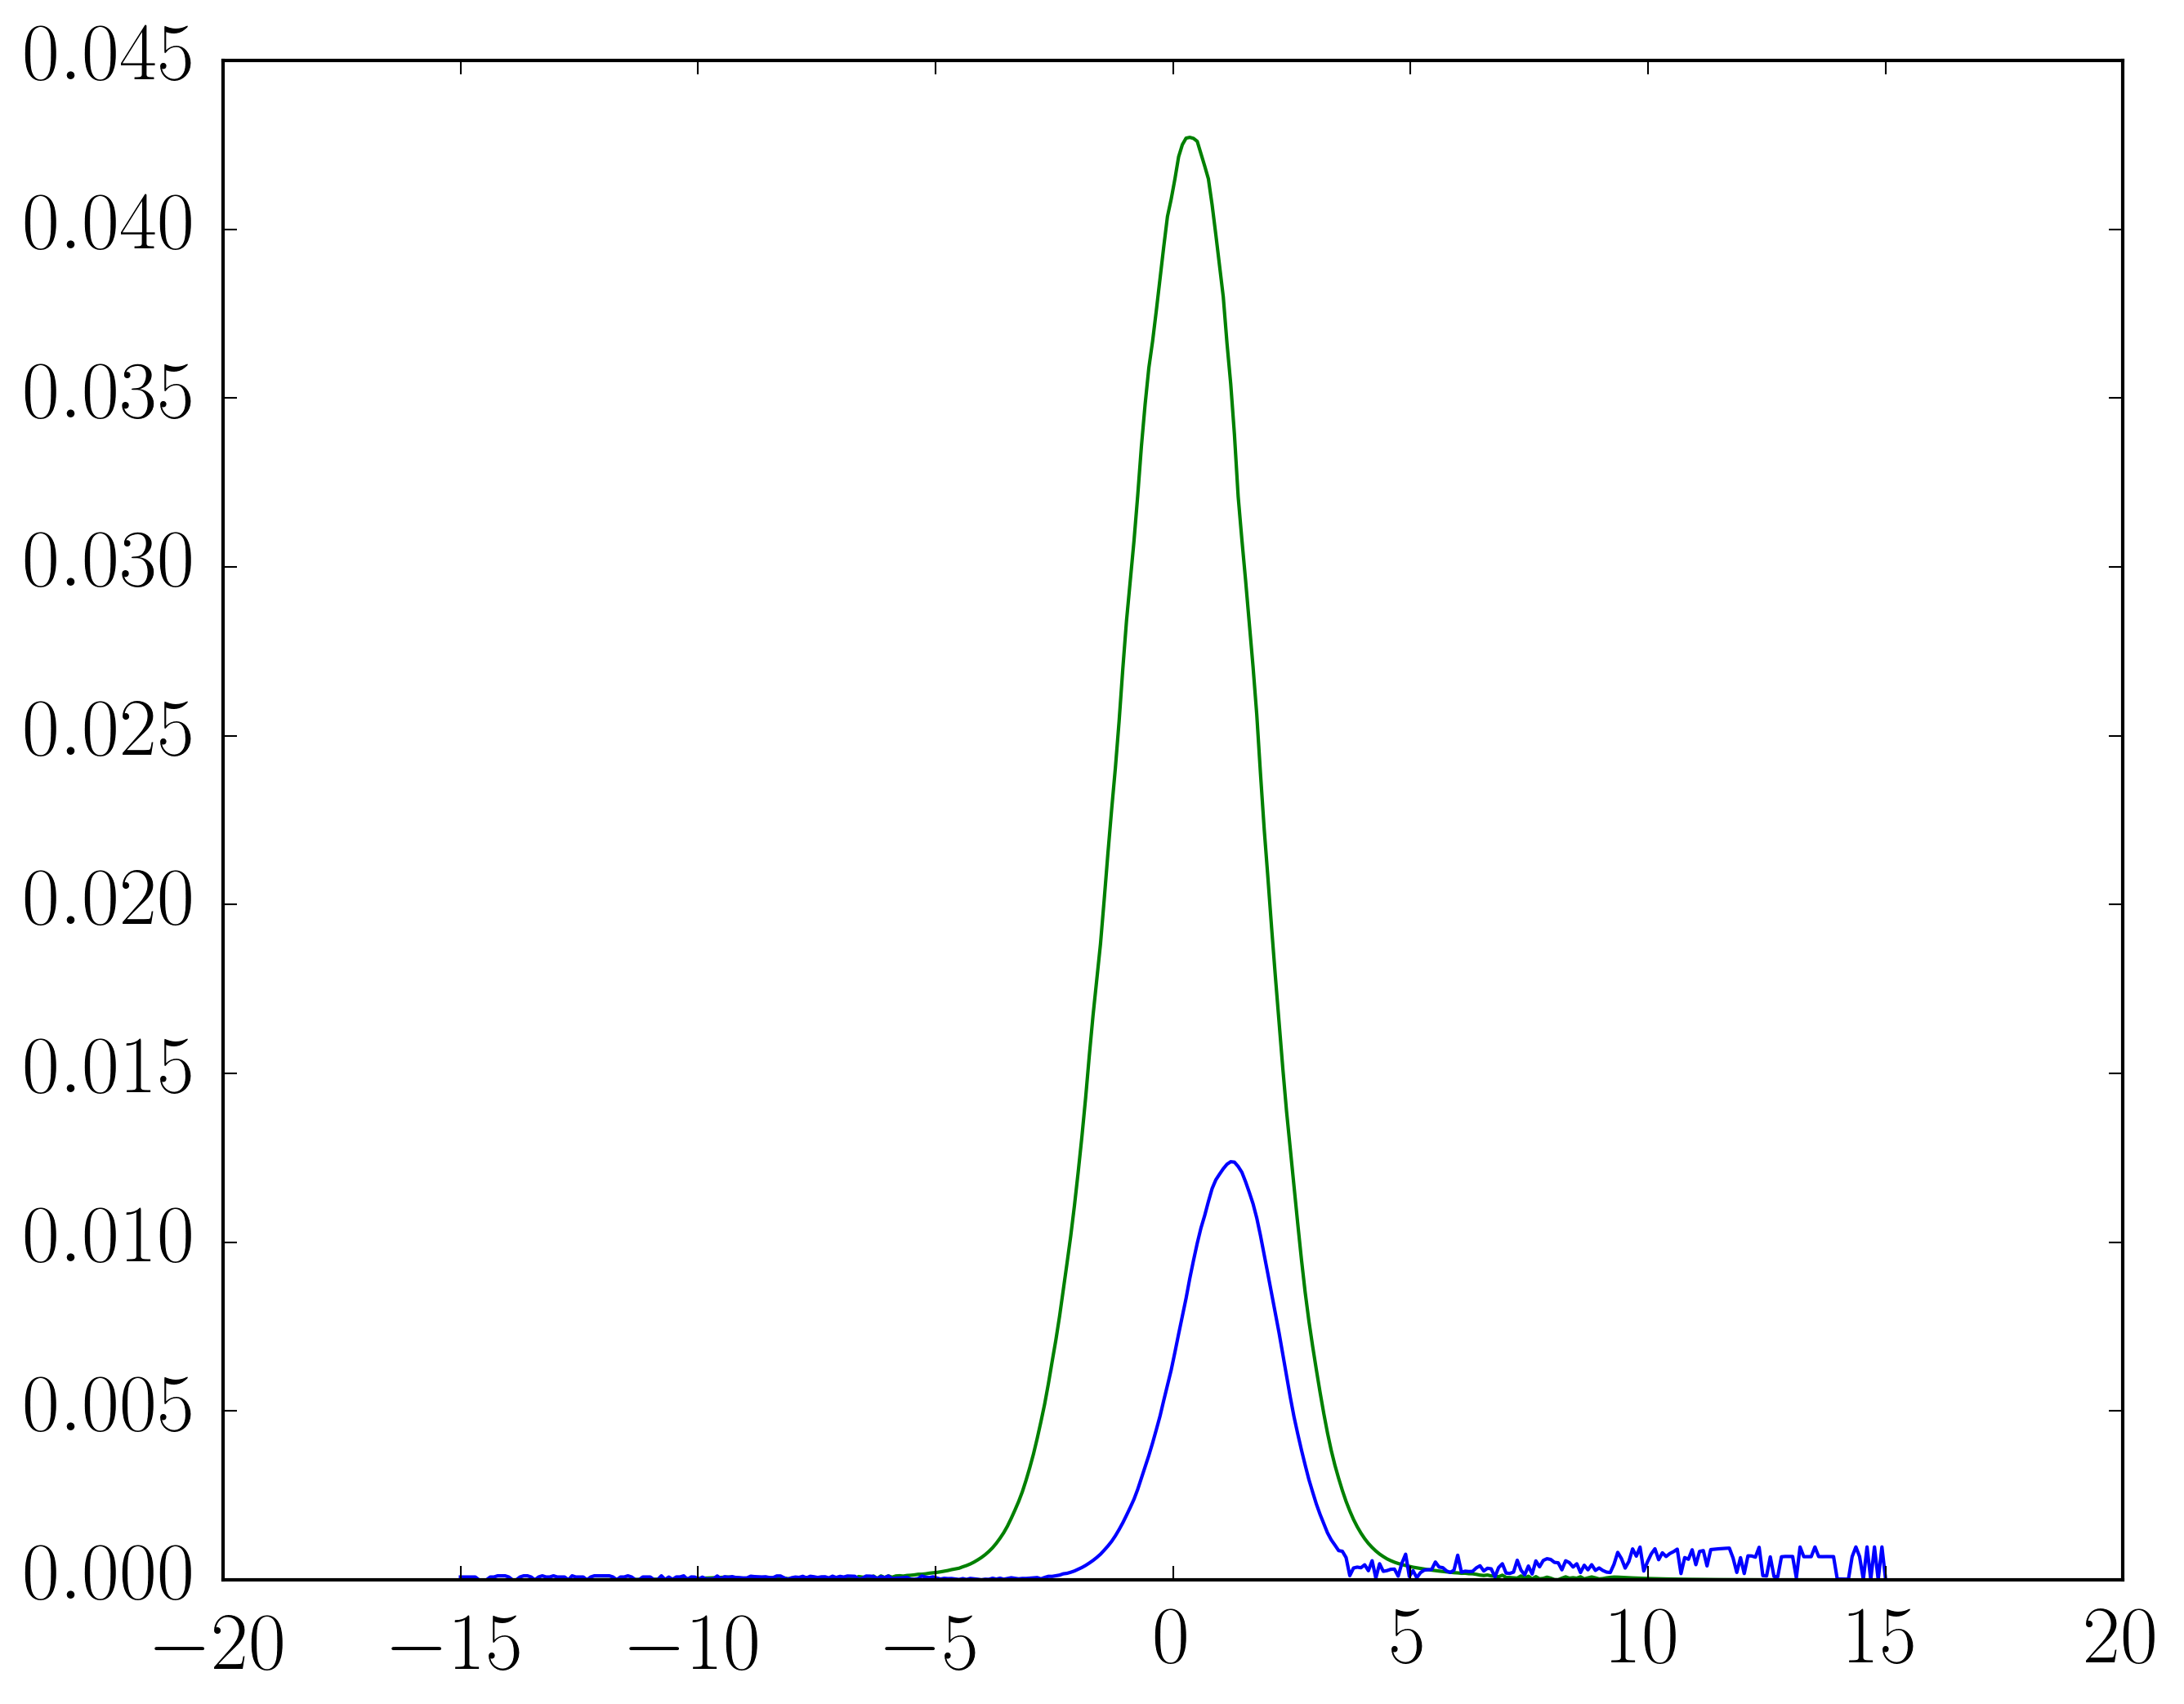

In [269]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.ylim([4.48,4.52])
vint=np.zeros(len(time))
for ii in range(0,1):
    #plt.plot(yf/dm[ii],np.sqrt(R11[:,ii]))
    plt.plot(yf/dm[ii],urms[:,ii],'g')
    plt.plot(yf/dm[ii],Trms[:,ii])
    #vint[ii]=np.trapz(rhom[:,ii],yf)


(4,)
Mass balance=
[  2.07065113e-06   4.47535914e-06   2.10863843e-05]
[  235.1563721    723.86537821  4657.27303792]


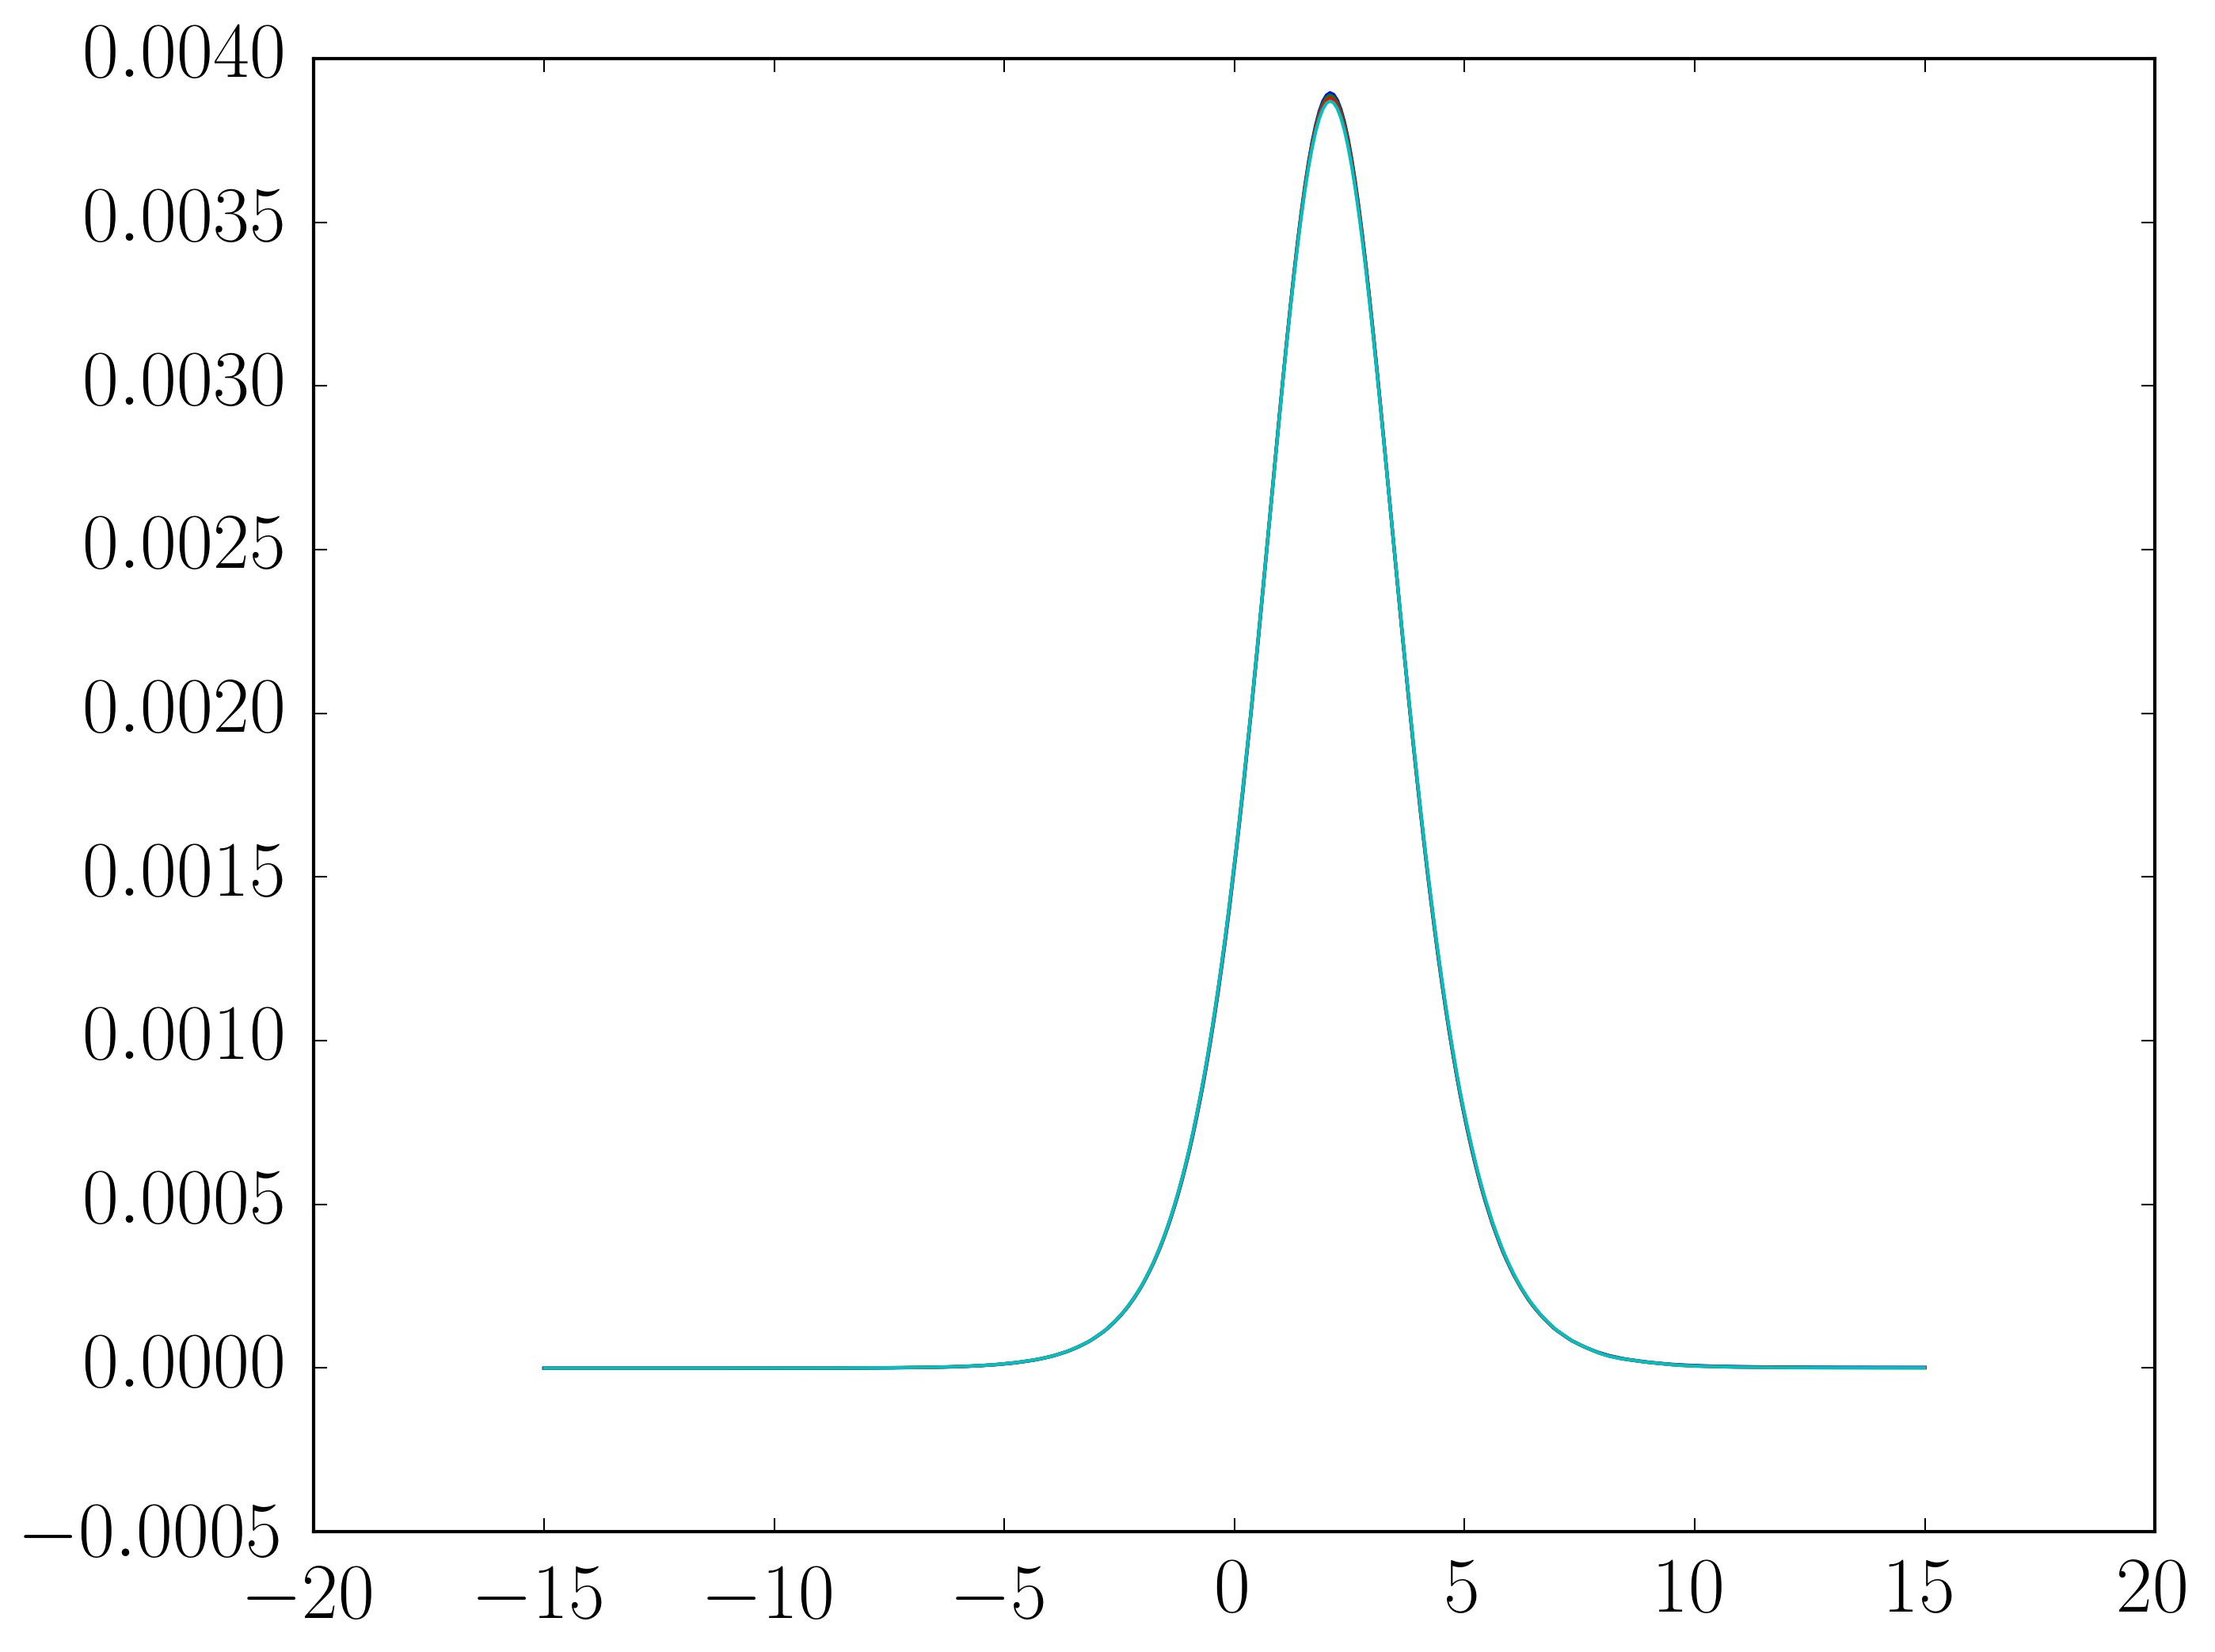

In [256]:
#phiprime = (np.trapz(rhoma[:,1],yfa)-np.trapz(rhoma[:,0],yfa))/(timea[1]-timea[0])
#print phiprime+rvma[-1,ii]-rvma[0,ii]
print np.shape(dm)
#phiprime = (np.trapz(rhom[:,1],yf)-np.trapz(rhom[:,0],yf))/(time[1]-time[0])
#print phiprime+rvm[-1,ii]-rvm[0,ii]
#plt.plot(yfa/dma[-1],vma[:,-1])
#plt.xlim([-5,10])
vint=np.zeros(len(time))
for ii in range(0,len(time)):
    #print (time[ii]-time[ii-1])/20.0
    #plt.plot(yfa,rvma[:,ii])
    #plt.xlim([-5,10])
    plt.plot(yf/dm[ii],vm[:,ii])
    vint[ii]=np.trapz(rhom[:,ii],yf)
    #print "time=%s, phi=%s" %( timea[ii], rvma[0,ii]-rvma[-1,ii])
    #print "dm=%s"%(dma[ii])
print "Mass balance=" 
massbalance=(np.diff(vint)/np.diff(time))+(rvm[0,1:]-rvm[-1,1:])
massratio=np.abs(((np.diff(vint)/np.diff(time))+(rvm[0,1:]-rvm[-1,1:]))/(rvm[0,1:]-rvm[-1,1:]))*100
print massbalance
print massratio
#plt.plot(yf[1:]/dm[-1],np.diff(yf)*0.001)